In [273]:
import numpy as np
from fancyimpute import BiScaler, SoftImpute, SimpleFill
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet, Lasso, Ridge, ElasticNetCV
from sklearn import utils
from sklearn.preprocessing import StandardScaler
import warnings
from copy import deepcopy
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import reduce
sns.set()
from yellowbrick.regressor import ResidualsPlot

In [2]:
np.set_printoptions(threshold=sys.maxsize)

In [3]:
np.set_printoptions()

In [4]:
data = np.load('august2020-exercise1.npz')

In [5]:
data.files

['X_lr_small_train',
 'y_lr_small_train',
 'X_lr_big_train',
 'y_lr_big_train',
 'X_hr_small_train',
 'y_hr_small_train',
 'X_hr_big_train',
 'y_hr_big_train',
 'X_lr_test',
 'y_lr_test',
 'X_hr_test',
 'y_hr_test']

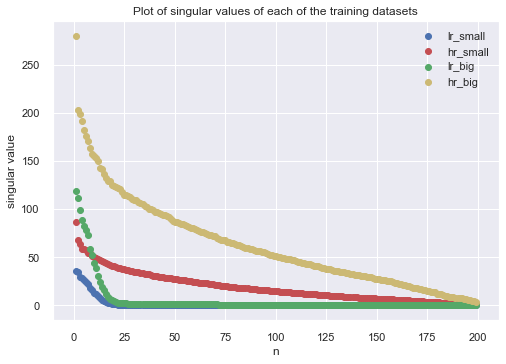

In [373]:
plt.scatter(np.arange(1,200), np.linalg.svd(data['X_lr_small_train'])[1][1:], label='lr_small')
plt.scatter(np.arange(1,200), np.linalg.svd(data['X_hr_small_train'])[1][1:], c='r', label='hr_small')
plt.scatter(np.arange(1,200), np.linalg.svd(data['X_lr_big_train'])[1][1:], c='g', label='lr_big')
plt.scatter(np.arange(1,200), np.linalg.svd(data['X_hr_big_train'])[1][1:], c='y', label='hr_big')
plt.legend()
plt.xlabel('n')
plt.ylabel('singular value')
plt.title('Plot of singular values of each of the training datasets')
plt.savefig('singular values')

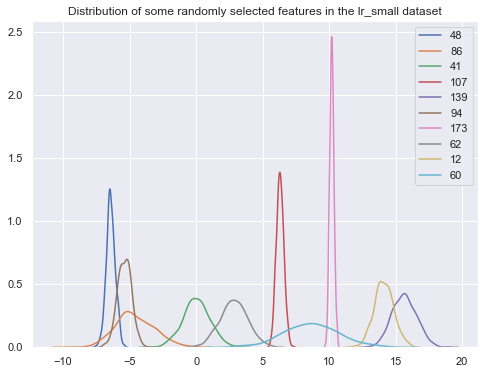

In [269]:
df_lr_small = pd.DataFrame(data=data['X_hr_small_train'])

plt.figure(figsize = [8, 6])
for i in np.random.randint(0, 200, 10):
    sns.kdeplot(df_lr_small[i])
plt.title('Distribution of some randomly selected features in the lr_small dataset')
plt.savefig('feature distribution hr')

In [271]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [272]:
X = df_lr_small.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,0,1128.135723
1,1,25327.261065
2,2,523.647992
3,3,127.262351
4,4,575.148277
...,...,...
194,194,126.422571
195,195,24.072201
196,196,51635.493629
197,197,716.391969


In [6]:
## first task
# 1- 

reg_lr_small = linear_model.LinearRegression()
reg_lr_small.fit(data['X_lr_small_train'] , data['y_lr_small_train'])
y_pred_lr_small = reg_lr_small.predict(data['X_lr_test'])
lr_small_score = r2_score(data['y_lr_test'], y_pred_lr_small)

reg_hr_small = linear_model.LinearRegression()
reg_hr_small.fit(data['X_hr_small_train'] , data['y_hr_small_train'])
y_pred_hr_small = reg_hr_small.predict(data['X_hr_test'])
hr_small_score = r2_score(data['y_hr_test'], y_pred_hr_small)

reg_lr_big = linear_model.LinearRegression()
reg_lr_big.fit(data['X_lr_big_train'] , data['y_lr_big_train'])
y_pred_lr_big = reg_lr_big.predict(data['X_lr_test'])
lr_big_score = r2_score(data['y_lr_test'], y_pred_lr_big)

reg_hr_big = linear_model.LinearRegression()
reg_hr_big.fit(data['X_hr_big_train'] , data['y_hr_big_train'])
y_pred_hr_big = reg_hr_big.predict(data['X_hr_test'])
hr_big_score = r2_score(data['y_hr_test'], y_pred_hr_big)

In [7]:
print(lr_small_score, hr_small_score, lr_big_score, hr_big_score)

-0.04286808887481741 -0.23182933203474976 0.29080465492373775 0.3120151398910328


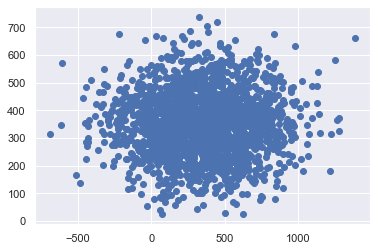

In [253]:
plt.scatter(y_pred_hr_big, data['y_lr_test'])

In [8]:
standardscaler = StandardScaler()
X_lr_small_norm = standardscaler.fit_transform(data['X_lr_small_train'])
X_hr_small_norm = standardscaler.fit_transform(data['X_hr_small_train'])
X_lr_big_norm = standardscaler.fit_transform(data['X_lr_big_train'])
X_hr_big_norm = standardscaler.fit_transform(data['X_hr_big_train'])


X_lr_test_norm = standardscaler.fit_transform(data['X_lr_test'])
X_hr_test_norm = standardscaler.fit_transform(data['X_hr_test'])

In [278]:
y_lr_small_norm = standardscaler.fit_transform(data['y_lr_small_train'].reshape([-1,1]))
y_hr_small_norm = standardscaler.fit_transform(data['y_hr_small_train'].reshape([-1,1]))
y_lr_big_norm = standardscaler.fit_transform(data['y_lr_big_train'].reshape([-1,1]))
y_hr_big_norm = standardscaler.fit_transform(data['y_hr_big_train'].reshape([-1,1]))


y_lr_test_norm = standardscaler.fit_transform(data['y_lr_test'].reshape([-1,1]))
y_hr_test_norm = standardscaler.fit_transform(data['y_hr_test'].reshape([-1,1]))

In [9]:
reg_lr_small_norm = linear_model.LinearRegression()
reg_lr_small_norm.fit(X_lr_small_norm, data['y_lr_small_train'])
y_pred_lr_small_norm = reg_lr_small_norm.predict(X_lr_test_norm)
lr_small_score_norm = r2_score(data['y_lr_test'], y_pred_lr_small_norm)

reg_hr_small_norm = linear_model.LinearRegression()
reg_hr_small_norm.fit(X_hr_small_norm, data['y_hr_small_train'])
y_pred_hr_small_norm = reg_hr_small_norm.predict(X_lr_test_norm)
hr_small_score_norm = r2_score(data['y_hr_test'], y_pred_hr_small_norm)

reg_lr_big_norm = linear_model.LinearRegression()
reg_lr_big_norm.fit(X_lr_big_norm, data['y_lr_big_train'])
y_pred_lr_big_norm = reg_lr_big_norm.predict(X_lr_test_norm)
lr_big_score_norm = r2_score(data['y_lr_test'], y_pred_lr_big_norm)

reg_hr_big_norm = linear_model.LinearRegression()
reg_hr_big_norm.fit(X_hr_big_norm, data['y_hr_big_train'])
y_pred_hr_big_norm = reg_hr_big_norm.predict(X_hr_test_norm)
hr_big_score_norm = r2_score(data['y_hr_test'], y_pred_hr_big_norm)

print(lr_small_score_norm, hr_small_score_norm, lr_big_score_norm, hr_big_score_norm)

-0.8319803429217882 -1.7009391363512014 0.27869435978063284 0.3116554107985262


In [10]:
# Regularization with Gridsearch elastic net

warnings.filterwarnings('ignore')
enet_lr_small = GridSearchCV(ElasticNet(max_iter=1000),
                    param_grid={
                       'alpha': np.logspace(-2, 0, 20),
                       'l1_ratio': np.logspace(-2, 1, 30)}, 
                    scoring='r2', cv=6)
enet_lr_small.fit(data['X_lr_small_train'] , data['y_lr_small_train'])
print(enet_lr_small.best_params_)
print(enet_lr_small.best_score_)

enet_hr_small = GridSearchCV(ElasticNet(max_iter=1000),
                    param_grid={
                       'alpha': np.logspace(-2, 0, 20),
                       'l1_ratio': np.logspace(-2, 1, 30)}, 
                    scoring='r2', cv=6)
enet_hr_small.fit(data['X_hr_small_train'] , data['y_hr_small_train'])
print(enet_hr_small.best_params_)
print(enet_hr_small.best_score_)

enet_lr_big = GridSearchCV(ElasticNet(max_iter=1000),
                    param_grid={
                       'alpha': np.logspace(-2, 0, 20),
                       'l1_ratio': np.logspace(-2, 1, 20)}, 
                    scoring='r2', cv=6)
enet_lr_big.fit(data['X_lr_big_train'] , data['y_lr_big_train'])
print(enet_lr_big.best_params_)
print(enet_lr_big.best_score_)

enet_hr_big = GridSearchCV(ElasticNet(max_iter=1000),
                    param_grid={
                       'alpha': np.logspace(-2, 0, 20),
                       'l1_ratio': np.logspace(-2, 1, 20)}, 
                    scoring='r2', cv=6)
enet_hr_big.fit(data['X_hr_big_train'] , data['y_hr_big_train'])
print(enet_hr_big.best_params_)
print(enet_hr_big.best_score_)

{'alpha': 0.11288378916846889, 'l1_ratio': 0.01}
0.19827561675190628
{'alpha': 1.0, 'l1_ratio': 0.1373823795883263}
0.16469425098570947
{'alpha': 0.01, 'l1_ratio': 0.5455594781168517}
0.3416163831428903
{'alpha': 0.4832930238571752, 'l1_ratio': 0.7847599703514611}
0.29868115964126596


In [11]:
# Test the enet on the test data (r^2)
y_pred_enet_lr_small = enet_lr_small.best_estimator_.predict(data['X_lr_test'])
y_pred_enet_hr_small = enet_hr_small.best_estimator_.predict(data['X_hr_test'])
y_pred_enet_lr_big = enet_lr_big.best_estimator_.predict(data['X_lr_test'])
y_pred_enet_hr_big = enet_hr_big.best_estimator_.predict(data['X_hr_test'])

enet_lr_small_score = r2_score(data['y_lr_test'], y_pred_enet_lr_small)
enet_hr_small_score = r2_score(data['y_hr_test'], y_pred_enet_hr_small)
enet_lr_big_score = r2_score(data['y_lr_test'], y_pred_enet_lr_big)
enet_hr_big_score = r2_score(data['y_hr_test'], y_pred_enet_hr_big)

print(enet_lr_small_score, enet_hr_small_score, enet_lr_big_score, enet_hr_big_score)

0.3000833670473453 0.18612417888620558 0.31658216470589085 0.3195547549292267


In [12]:
# Regularization with Lasso

lasso_lr_small = GridSearchCV(Lasso(max_iter=1000),
                    param_grid={
                       'alpha': np.logspace(-2, 2, 40)}, 
                    scoring='r2', cv=6)
lasso_lr_small.fit(data['X_lr_small_train'] , data['y_lr_small_train'])
print(lasso_lr_small.best_params_)
print(lasso_lr_small.best_score_)

lasso_hr_small = GridSearchCV(Lasso(max_iter=1000),
                    param_grid={
                       'alpha': np.logspace(-2, 2, 40)}, 
                    scoring='r2', cv=6)
lasso_hr_small.fit(data['X_hr_small_train'] , data['y_hr_small_train'])
print(lasso_hr_small.best_params_)
print(lasso_hr_small.best_score_)

lasso_lr_big = GridSearchCV(Lasso(max_iter=1000),
                    param_grid={
                       'alpha': np.logspace(-2, 2, 40)}, 
                    scoring='r2', cv=6)
lasso_lr_big.fit(data['X_lr_big_train'] , data['y_lr_big_train'])
print(lasso_lr_big.best_params_)
print(lasso_lr_big.best_score_)

lasso_hr_big = GridSearchCV(Lasso(max_iter=1000),
                    param_grid={
                       'alpha': np.logspace(-2, 2, 40)}, 
                    scoring='r2', cv=6)
lasso_hr_big.fit(data['X_hr_big_train'] , data['y_hr_big_train'])
print(lasso_hr_big.best_params_)
print(lasso_hr_big.best_score_)

{'alpha': 0.5541020330009492}
0.18761720196617426
{'alpha': 19.144819761699576}
0.18458025721581992
{'alpha': 0.10608183551394483}
0.34086655205188504
{'alpha': 4.6415888336127775}
0.3067237919884462


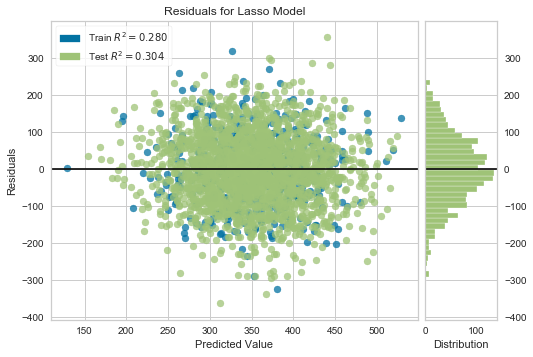

In [275]:
visualizer = ResidualsPlot(Lasso(alpha=0.55))

visualizer.fit(data['X_lr_small_train'] , data['y_lr_small_train'])  # Fit the training data to the visualizer
visualizer.score(data['X_lr_test'], data['y_lr_test'])  # Evaluate the model on the test data
visualizer.show()               

In [13]:
y_pred_lasso_lr_small = lasso_lr_small.best_estimator_.predict(data['X_lr_test'])
y_pred_lasso_hr_small = lasso_hr_small.best_estimator_.predict(data['X_hr_test'])
y_pred_lasso_lr_big = lasso_lr_big.best_estimator_.predict(data['X_lr_test'])
y_pred_lasso_hr_big = lasso_hr_big.best_estimator_.predict(data['X_hr_test'])

lasso_lr_small_score = r2_score(data['X_lr_test'], y_pred_lasso_lr_small)
lasso_hr_small_score = r2_score(data['y_hr_test'], y_pred_lasso_hr_small)
lasso_lr_big_score = r2_score(data['y_lr_test'], y_pred_lasso_lr_big)
lasso_hr_big_score = r2_score(data['y_hr_test'], y_pred_lasso_hr_big)

print(lasso_lr_small_score, lasso_hr_small_score, lasso_lr_big_score, lasso_hr_big_score)

0.30367127515660997 0.2386453038035945 0.3176263337512002 0.3237913488063645


In [266]:
# Regularization with Lasso and standardized inputs

lasso_lr_small_norm = GridSearchCV(Lasso(max_iter=1000),
                    param_grid={
                       'alpha': np.logspace(-2, 4, 50)}, 
                    scoring='r2', cv=6)
lasso_lr_small_norm.fit(X_lr_small_norm , data['y_lr_small_train'])
print(lasso_lr_small_norm.best_params_)
print(lasso_lr_small_norm.best_score_)

lasso_hr_small_norm = GridSearchCV(Lasso(max_iter=1000),
                    param_grid={
                       'alpha': np.logspace(-2, 4, 40)}, 
                    scoring='r2', cv=6)
lasso_hr_small_norm.fit(X_hr_small_norm , data['y_hr_small_train'])
print(lasso_hr_small_norm.best_params_)
print(lasso_hr_small_norm.best_score_)

lasso_lr_big_norm = GridSearchCV(Lasso(max_iter=1000),
                    param_grid={
                       'alpha': np.logspace(-2, 4, 40)}, 
                    scoring='r2', cv=6)
lasso_lr_big_norm.fit(X_lr_big_norm , data['y_lr_big_train'])
print(lasso_lr_big_norm.best_params_)
print(lasso_lr_big_norm.best_score_)

lasso_hr_big_norm = GridSearchCV(Lasso(max_iter=1000),
                    param_grid={
                       'alpha': np.logspace(-2, 4, 40)}, 
                    scoring='r2', cv=6)
lasso_hr_big_norm.fit(X_hr_big_norm , data['y_hr_big_train'])
print(lasso_hr_big_norm.best_params_)
print(lasso_hr_big_norm.best_score_)

{'alpha': 3.727593720314938}
0.1951625762860382
{'alpha': 34.551072945922215}
0.16863775884148527
{'alpha': 0.49238826317067413}
0.34127565240037244
{'alpha': 8.376776400682925}
0.30843793934203884


In [279]:
# Regularization with Lasso and standardized inputs

lasso_lr_small_norm = GridSearchCV(Lasso(max_iter=1000),
                    param_grid={
                       'alpha': np.logspace(-2, 4, 50)}, 
                    scoring='r2', cv=6)
lasso_lr_small_norm.fit(X_lr_small_norm , y_lr_small_norm)
print(lasso_lr_small_norm.best_params_)
print(lasso_lr_small_norm.best_score_)

lasso_hr_small_norm = GridSearchCV(Lasso(max_iter=1000),
                    param_grid={
                       'alpha': np.logspace(-2, 4, 50)}, 
                    scoring='r2', cv=6)
lasso_hr_small_norm.fit(X_hr_small_norm , y_hr_small_norm)
print(lasso_hr_small_norm.best_params_)
print(lasso_hr_small_norm.best_score_)

lasso_lr_big_norm = GridSearchCV(Lasso(max_iter=1000),
                    param_grid={
                       'alpha': np.logspace(-2, 4, 50)}, 
                    scoring='r2', cv=6)
lasso_lr_big_norm.fit(X_lr_big_norm , y_lr_big_norm)
print(lasso_lr_big_norm.best_params_)
print(lasso_lr_big_norm.best_score_)

lasso_hr_big_norm = GridSearchCV(Lasso(max_iter=1000),
                    param_grid={
                       'alpha': np.logspace(-2, 4, 50)}, 
                    scoring='r2', cv=6)
lasso_hr_big_norm.fit(X_hr_big_norm , y_lr_big_norm)
print(lasso_hr_big_norm.best_params_)
print(lasso_hr_big_norm.best_score_)

{'alpha': 0.040949150623804255}
0.19521610662164202
{'alpha': 0.07196856730011521}
0.16842307720227825
{'alpha': 0.01}
0.3403900668227778
{'alpha': 0.030888435964774818}
-0.0016120587476591286


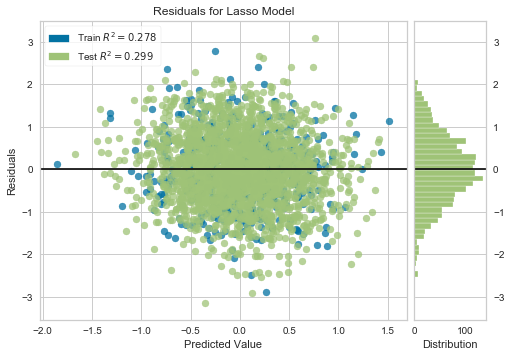

In [284]:
visualizer = ResidualsPlot(Lasso(alpha=0.04))

visualizer.fit(X_lr_small_norm , y_lr_small_norm.reshape([500]))  # Fit the training data to the visualizer
visualizer.score(X_lr_test_norm, y_lr_test_norm.reshape([2000]))  # Evaluate the model on the test data
visualizer.show()  

In [274]:
y_pred_lasso_lr_small_norm = lasso_lr_small_norm.best_estimator_.predict(X_lr_test_norm)
y_pred_lasso_hr_small_norm = lasso_hr_small_norm.best_estimator_.predict(X_hr_test_norm)
y_pred_lasso_lr_big_norm = lasso_lr_big_norm.best_estimator_.predict(X_lr_test_norm)
y_pred_lasso_hr_big_norm = lasso_hr_big_norm.best_estimator_.predict(X_hr_test_norm)

lasso_lr_small_score_norm = r2_score(data['y_lr_test'], y_pred_lasso_lr_small_norm)
lasso_hr_small_score_norm = r2_score(data['y_hr_test'], y_pred_lasso_hr_small_norm)
lasso_lr_big_score_norm = r2_score(data['y_lr_test'], y_pred_lasso_lr_big_norm)
lasso_hr_big_score_norm = r2_score(data['y_hr_test'], y_pred_lasso_hr_big_norm)

print(lasso_lr_small_score_norm, lasso_hr_small_score_norm, lasso_lr_big_score_norm, lasso_hr_big_score_norm)

0.29836610384806683 0.22874751949566807 0.31610908810446603 0.32556951586339244


In [16]:
# Regularization with Ridge

ridge_lr_small = GridSearchCV(Ridge(max_iter=1000),
                    param_grid={
                       'alpha': np.logspace(-3, 3, 50),
                        }, 
                    scoring='r2', cv=6)
ridge_lr_small.fit(data['X_lr_small_train'] , data['y_lr_small_train'])
print(ridge_lr_small.best_params_)
print(ridge_lr_small.best_score_)

ridge_hr_small = GridSearchCV(Ridge(max_iter=1000),
                    param_grid={
                       'alpha': np.logspace(-3, 3, 50),
                        }, 
                    scoring='r2', cv=6)
ridge_hr_small.fit(data['X_hr_small_train'] , data['y_hr_small_train'])
print(ridge_hr_small.best_params_)
print(ridge_hr_small.best_score_)


ridge_lr_big = GridSearchCV(Ridge(max_iter=1000),
                    param_grid={
                       'alpha': np.logspace(-3, 3, 50),
                        }, 
                    scoring='r2', cv=6)
ridge_lr_big.fit(data['X_lr_big_train'] , data['y_lr_big_train'])
print(ridge_lr_big.best_params_)
print(ridge_lr_big.best_score_)

ridge_hr_big = GridSearchCV(Ridge(max_iter=1000),
                    param_grid={
                       'alpha': np.logspace(-3, 2, 50),
                        }, 
                    scoring='r2', cv=6)
ridge_hr_big.fit(data['X_hr_big_train'] , data['y_hr_big_train'])
print(ridge_hr_big.best_params_)
print(ridge_hr_big.best_score_)

{'alpha': 44.98432668969444}
0.19829406445457895
{'alpha': 429.1934260128778}
0.1641130777146895
{'alpha': 14.563484775012444}
0.34169755210315694
{'alpha': 100.0}
0.29437795396670063


In [228]:
ridge_hr_big.param_grid['alpha']

array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128557e-03, 8.28642773e-03, 1.04811313e-02, 1.32571137e-02,
       1.67683294e-02, 2.12095089e-02, 2.68269580e-02, 3.39322177e-02,
       4.29193426e-02, 5.42867544e-02, 6.86648845e-02, 8.68511374e-02,
       1.09854114e-01, 1.38949549e-01, 1.75751062e-01, 2.22299648e-01,
       2.81176870e-01, 3.55648031e-01, 4.49843267e-01, 5.68986603e-01,
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])

In [17]:
y_pred_ridge_lr_small = ridge_lr_small.best_estimator_.predict(data['X_lr_test'])
y_pred_ridge_hr_small = ridge_hr_small.best_estimator_.predict(data['X_hr_test'])
y_pred_ridge_lr_big = ridge_lr_big.best_estimator_.predict(data['X_lr_test'])
y_pred_ridge_hr_big = ridge_hr_big.best_estimator_.predict(data['X_hr_test'])

ridge_lr_small_score = r2_score(data['y_lr_test'], y_pred_ridge_lr_small)
ridge_hr_small_score = r2_score(data['y_hr_test'], y_pred_ridge_hr_small)
ridge_lr_big_score = r2_score(data['y_lr_test'], y_pred_ridge_lr_big)
ridge_hr_big_score = r2_score(data['y_hr_test'], y_pred_ridge_hr_big)

print(ridge_lr_small_score, ridge_hr_small_score, ridge_lr_big_score, ridge_hr_big_score)

0.30156741027614853 0.18552776021005557 0.31656723611790494 0.31643452277079775


In [80]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


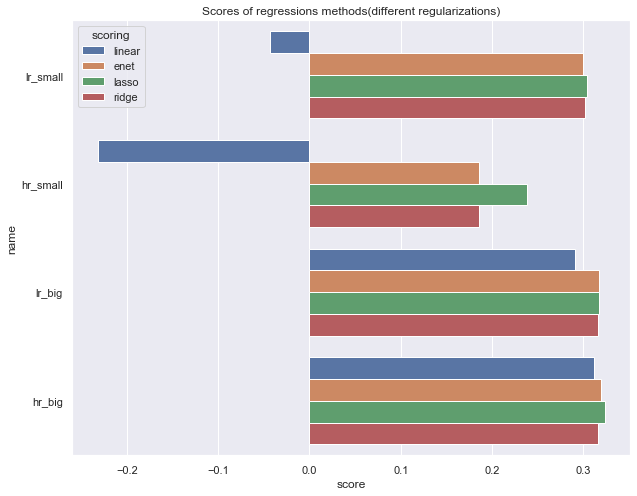

In [111]:
data_scores = [[lr_small_score, 'linear', 'lr_small'], 
               [hr_small_score, 'linear', 'hr_small'],
               [lr_big_score, 'linear', 'lr_big'],
               [hr_big_score, 'linear', 'hr_big'],
               [enet_lr_small_score, 'enet', 'lr_small'],
               [enet_hr_small_score, 'enet', 'hr_small'],
               [enet_lr_big_score, 'enet', 'lr_big'],
               [enet_hr_big_score, 'enet', 'hr_big'],
               [lasso_lr_small_score, 'lasso', 'lr_small'],
               [lasso_hr_small_score, 'lasso', 'hr_small'],
               [lasso_lr_big_score, 'lasso', 'lr_big'],
               [lasso_hr_big_score, 'lasso', 'hr_big'],
               [ridge_lr_small_score, 'ridge', 'lr_small'],
               [ridge_hr_small_score, 'ridge', 'hr_small'],
               [ridge_lr_big_score, 'ridge', 'lr_big'],
               [ridge_hr_big_score, 'ridge', 'hr_big']]

columns_score_df = ['score', 'scoring', 'name']
scores_df = pd.DataFrame(data=data_scores, columns=columns_score_df)

plt.figure(figsize=[10,8])
sns.barplot(x='score', y='name', hue='scoring', data=scores_df)
plt.title("Scores of regressions methods(different regularizations)")
plt.savefig('Regression scores ordinary')

In [174]:
# Feature selection on actual data

ntimes_nonzero_lr_small = np.zeros(200).astype(int)
sample_enet = []

for i in range(200):
    resampled_X , resampled_y = utils.resample(data['X_lr_small_train'], data['y_lr_small_train'])
    sample_enet.append(ElasticNet(alpha=enet_lr_small.best_params_['alpha'] , 
                                       l1_ratio=0.9).fit(resampled_X, resampled_y))
    nonzero_ind = np.where(sample_enet[i].coef_ != 0)[0]
    ntimes_nonzero_lr_small[nonzero_ind] += 1
        

ntimes_nonzero_hr_small = np.zeros(200).astype(int)
sample_enet = []


for i in range(200):
    resampled_X , resampled_y = utils.resample(data['X_hr_small_train'], data['y_hr_small_train'])
    sample_enet.append(ElasticNet(alpha=enet_hr_small.best_params_['alpha'] , 
                                       l1_ratio=0.9).fit(resampled_X, resampled_y))
    nonzero_ind = np.where(sample_enet[i].coef_ != 0)[0]
    ntimes_nonzero_hr_small[nonzero_ind] += 1   


ntimes_nonzero_lr_big = np.zeros(200).astype(int)
sample_enet = []

for i in range(200):
    resampled_X , resampled_y = utils.resample(data['X_lr_big_train'], data['y_lr_big_train'])
    sample_enet.append(ElasticNet(alpha=enet_lr_big.best_params_['alpha'] , 
                                       l1_ratio=0.9).fit(resampled_X, resampled_y))
    nonzero_ind = np.where(sample_enet[i].coef_ != 0)[0]
    ntimes_nonzero_lr_big[nonzero_ind] += 1

    
ntimes_nonzero_hr_big = np.zeros(200).astype(int)
sample_enet = []

for i in range(200):
    resampled_X , resampled_y = utils.resample(data['X_hr_big_train'], data['y_hr_big_train'])
    sample_enet.append(ElasticNet(alpha=enet_hr_big.best_params_['alpha'] , 
                                       l1_ratio=0.9).fit(resampled_X, resampled_y))
    nonzero_ind = np.where(sample_enet[i].coef_ != 0)[0]
    ntimes_nonzero_hr_big[nonzero_ind] += 1

In [221]:
a1 = np.argsort(ntimes_nonzero_lr_small)[::-1]
chosen_predictors_lr_small = a1[ntimes_nonzero_lr_small[a1] >= 180]
a2 = np.argsort(ntimes_nonzero_hr_small)[::-1]
chosen_predictors_hr_small = a2[ntimes_nonzero_hr_small[a2] >= 180]
a3 = np.argsort(ntimes_nonzero_lr_big)[::-1]
chosen_predictors_lr_big = a3[ntimes_nonzero_lr_big[a3] >= 180]
a4 = np.argsort(ntimes_nonzero_hr_big)[::-1]
chosen_predictors_hr_big = a4[ntimes_nonzero_hr_big[a4] >= 180]

In [393]:
chosen_predictors_lr_small

array([199, 139,  65,  97, 160,  84,  91,  35, 172, 113,  41,  87, 167,
       178, 184,  40,  12,  21, 189, 149, 144,  37, 171, 142, 110, 111,
       112,  95, 195], dtype=int64)

In [394]:
chosen_predictors_hr_small

array([ 97, 185,  55, 148,  40,  39,  34, 172, 176, 114,  26, 110, 137,
        95,  92, 190, 189,  49, 150, 101, 186, 127,  73, 140, 122,  63,
       133, 135, 100,  56,  44,  87, 163,  68,  35, 188,  60,  77,  50,
       142, 181, 112,   3,  89, 120, 119,  79, 126,  45,  32,  42, 161,
        31,  91,  75, 146,  33,  21,  57, 136,  70, 111,  86,  53, 184,
       151, 167, 157, 191, 187,  23,  30,  61, 162,  16,  54, 197, 144,
       113, 131,  22, 125, 132, 147,  29,  47,  98,  80,   9, 174, 155,
        82,  94, 195, 175, 105,  78,  51, 199,  15,  41,   0, 153, 179,
        66,  59, 193,  43, 198, 145, 178, 160, 109, 124, 164,  62, 169,
       165, 121, 152, 143, 166, 177, 108, 104,   4,  27,  18,  52,  12,
        99, 115,  36,  85, 130, 159, 118,  19, 139,  17, 180, 168],
      dtype=int64)

In [395]:
chosen_predictors_lr_big

array([137,  98, 193, 133,  55, 171, 113, 199, 140,  33,  39,  82,  87,
       146, 163,  54, 148, 106, 110, 144, 166, 147,  21, 112, 172, 160],
      dtype=int64)

In [396]:
chosen_predictors_hr_big

array([176, 137, 148,  54,  87,  49,  43,  39, 172, 174,  97,  60,  34,
        32, 139, 154,  22,   9,  19, 110, 171,  17, 114, 140, 181,  21,
        90,  36, 186,  40,  91, 122, 161, 146,  42,  44, 131, 178, 124,
       185, 191, 190,  53, 135, 125, 151, 162,  47, 167,  35, 193,  33,
        27,  81, 188, 126,  82,   3, 100,  23, 195, 130, 133,  99, 155,
       142, 163, 150, 108,  20, 111,  52, 119,  55, 101, 199, 134, 147,
       118,  77, 180,  50, 112,  94,  78,  98, 189, 106, 136,  13, 165,
        24,  28, 184, 166,  18, 198,  29, 132,  79, 145, 121, 187, 144,
         0,  95, 127, 179, 177,  65,  89, 103,  45,  68,  62,  31, 159,
        51,  59, 183,  86,  80, 175,  48,  57, 102, 152,  92, 153,  41,
        85, 143, 169, 113,  30, 170,  64,  63,  76,  73,  11, 138,  16,
       182, 157], dtype=int64)

In [20]:
# 2nd task

def miss_at_random(data, probability=0.7):
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            r = np.random.rand()
            if r <= probability:
                data[i ,j] = np.NaN
    return data

In [21]:
def miss_by_feature(data):
    for j in range(data.shape[1]):
        if np.random.rand() > 0.5:
            for i in range(data.shape[0]):
                if np.random.rand() <= 0.8:
                    data[i, j] = np.NaN
    return data
        

In [36]:
def flatten_predictors(predictors):
    length_subarrays = [0]
    for i in range(20):
        length_subarrays.append(len(predictors[i][0]))
    flatted_predictors = np.zeros(sum(length_subarrays))
    for i1 in range(1, 21):
        for j in range(length_subarrays[i1]):
            flatted_predictors[j + sum(length_subarrays[:i1])] = predictors[i1 - 1][0][j]
    return flatted_predictors

In [24]:
miss_r_lr_small = [miss_at_random(deepcopy(data['X_lr_small_train'])) for _ in range(20)]
miss_f_lr_small = [miss_by_feature(deepcopy(data['X_lr_small_train'])) for _ in range(20)]

miss_r_hr_small = [miss_at_random(deepcopy(data['X_hr_small_train'])) for _ in range(20)]
miss_f_hr_small = [miss_by_feature(deepcopy(data['X_hr_small_train'])) for _ in range(20)]

miss_r_lr_big = [miss_at_random(deepcopy(data['X_lr_big_train'])) for _ in range(20)]
miss_f_lr_big = [miss_by_feature(deepcopy(data['X_lr_big_train'])) for _ in range(20)]

miss_r_hr_big = [miss_at_random(deepcopy(data['X_hr_big_train'])) for _ in range(20)]
miss_f_hr_big = [miss_by_feature(deepcopy(data['X_hr_big_train'])) for _ in range(20)]


In [25]:
meanimp = SimpleFill()
meanI_r_lr_small = [meanimp.fit_transform(miss_r_lr_small[i]) for i in range(20)]
meanI_f_lr_small = [meanimp.fit_transform(miss_f_lr_small[i]) for i in range(20)]

meanI_r_hr_small = [meanimp.fit_transform(miss_r_hr_small[i]) for i in range(20)]
meanI_f_hr_small = [meanimp.fit_transform(miss_f_hr_small[i]) for i in range(20)]

meanI_r_lr_big = [meanimp.fit_transform(miss_r_lr_big[i]) for i in range(20)]
meanI_f_lr_big = [meanimp.fit_transform(miss_f_lr_big[i]) for i in range(20)]

meanI_r_hr_big = [meanimp.fit_transform(miss_r_hr_big[i]) for i in range(20)]
meanI_f_hr_big = [meanimp.fit_transform(miss_f_hr_big[i]) for i in range(20)]


In [26]:
# mean imputation regression

reg = linear_model.LinearRegression()

y_pred_mi_r_lr_small = []
mi_r_lr_small_score = []
for i in range(20):
    reg.fit(meanI_r_lr_small[i], data['y_lr_small_train'])
    y_pred_mi_r_lr_small.append(reg.predict(data['X_lr_test']))
    mi_r_lr_small_score.append(r2_score(data['y_lr_test'], y_pred_mi_r_lr_small[i]))

    
y_pred_mi_f_lr_small = []
mi_f_lr_small_score = []
for i in range(20):
    reg.fit(meanI_f_lr_small[i], data['y_lr_small_train'])
    y_pred_mi_f_lr_small.append(reg.predict(data['X_lr_test']))
    mi_f_lr_small_score.append(r2_score(data['y_lr_test'], y_pred_mi_f_lr_small[i]))

    
y_pred_mi_r_hr_small = []
mi_r_hr_small_score = []
for i in range(20):
    reg.fit(meanI_r_hr_small[i], data['y_hr_small_train'])
    y_pred_mi_r_hr_small.append(reg.predict(data['X_hr_test']))
    mi_r_hr_small_score.append(r2_score(data['y_hr_test'], y_pred_mi_r_hr_small[i]))

    
y_pred_mi_f_hr_small = []
mi_f_hr_small_score = []
for i in range(20):
    reg.fit(meanI_f_hr_small[i], data['y_hr_small_train'])
    y_pred_mi_f_hr_small.append(reg.predict(data['X_hr_test']))
    mi_f_hr_small_score.append(r2_score(data['y_hr_test'], y_pred_mi_f_hr_small[i]))

    
y_pred_mi_r_lr_big = []
mi_r_lr_big_score = []
for i in range(20):
    reg.fit(meanI_r_lr_big[i], data['y_lr_big_train'])
    y_pred_mi_r_lr_big.append(reg.predict(data['X_lr_test']))
    mi_r_lr_big_score.append(r2_score(data['y_lr_test'], y_pred_mi_r_lr_big[i]))

    
y_pred_mi_f_lr_big = []
mi_f_lr_big_score = []
for i in range(20):
    reg.fit(meanI_f_lr_big[i], data['y_lr_big_train'])
    y_pred_mi_f_lr_big.append(reg.predict(data['X_lr_test']))
    mi_f_lr_big_score.append(r2_score(data['y_lr_test'], y_pred_mi_f_lr_big[i]))

    
y_pred_mi_r_hr_big = []
mi_r_hr_big_score = []
for i in range(20):
    reg.fit(meanI_r_hr_big[i], data['y_hr_big_train'])
    y_pred_mi_r_hr_big.append(reg.predict(data['X_hr_test']))
    mi_r_hr_big_score.append(r2_score(data['y_hr_test'], y_pred_mi_r_hr_big[i]))

    
y_pred_mi_f_hr_big = []
mi_f_hr_big_score = []
for i in range(20):
    reg.fit(meanI_f_hr_big[i], data['y_hr_big_train'])
    y_pred_mi_f_hr_big.append(reg.predict(data['X_hr_test']))
    mi_f_hr_big_score.append(r2_score(data['y_hr_test'], y_pred_mi_f_hr_big[i]))
    

In [123]:
mi_f_lr_small_score

[-0.34979797724035655,
 -0.47663846333568105,
 -1.2394811971163904,
 -1.5391735357299985,
 -0.9925492024423239,
 -1.037235496064047,
 -1.7842053759111831,
 -0.63571419866897,
 -0.6982549408877226,
 -0.7824007537579931,
 -0.8233302600772279,
 -0.49393536918993597,
 -0.9420751352128072,
 -0.7655351805811805,
 -0.3772187862392493,
 -1.1266899381363595,
 -0.6027241256015401,
 -0.8344329223077829,
 -0.35211253983258683,
 -0.7886885184385188]

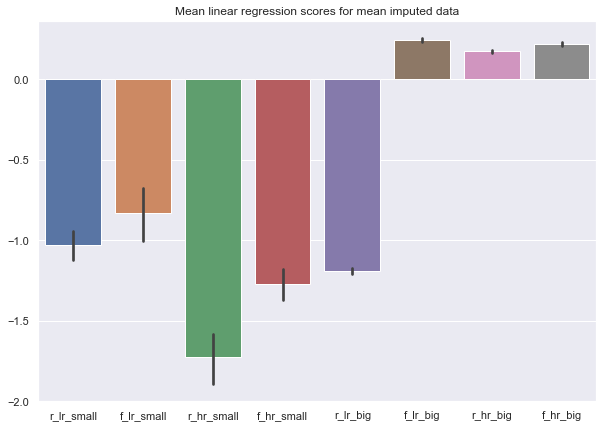

In [139]:
meanImp_data = {'r_lr_small': mi_r_lr_small_score, 
                'f_lr_small': mi_f_lr_small_score, 
                'r_hr_small': mi_r_hr_small_score,
                'f_hr_small': mi_f_hr_small_score,
                'r_lr_big': mi_r_lr_big_score,
                'f_lr_big': mi_f_lr_big_score,
                'r_hr_big': mi_r_hr_big_score,
                'f_hr_big': mi_f_hr_big_score}

meanimp_df = pd.DataFrame(data=meanImp_data)
plt.figure(figsize=[10, 7])
sns.barplot(data=meanimp_df)
plt.title("Mean linear regression scores for mean imputed data")
plt.savefig('mean impute regression')

In [289]:
miss_r_lr_big1 = [miss_at_random(deepcopy(X_lr_big_norm)) for _ in range(20)]
meanI_r_lr_big1 = [meanimp.fit_transform(miss_r_lr_big1[i]) for i in range(20)]

y_pred_mi_r_lr_big_lasso1 = []
mi_r_lr_big_score_lasso1 = []
for i in range(20):
    linear_model.LassoCV().fit(meanI_r_lr_big1[i], data['y_lr_big_train'])
    y_pred_mi_r_lr_big_lasso1.append(reg.predict(X_lr_test_norm))
    mi_r_lr_big_score_lasso1.append(r2_score(data['y_lr_test'], y_pred_mi_r_lr_big_lasso1[i]))
    
np.mean(mi_r_lr_big_score_lasso1)

-293.61557419176904

In [334]:
# Mean impute lasso

alphas_mi_r_lr_small = []
alphas_mi_f_lr_small = []
alphas_mi_r_hr_small = []
alphas_mi_f_hr_small = []
alphas_mi_r_lr_big = []
alphas_mi_f_lr_big = []
alphas_mi_r_hr_big = []
alphas_mi_f_hr_big = []

reg = linear_model.LassoCV()

y_pred_mi_r_lr_small_lasso = []
mi_r_lr_small_score_lasso = []
for i in range(20):
    reg.fit(meanI_r_lr_small[i], data['y_lr_small_train'])
    y_pred_mi_r_lr_small_lasso.append(reg.predict(data['X_lr_test']))
    alphas_mi_r_lr_small.append(reg.alpha_)
    mi_r_lr_small_score_lasso.append(r2_score(data['y_lr_test'], y_pred_mi_r_lr_small_lasso[i]))

    
y_pred_mi_f_lr_small_lasso = []
mi_f_lr_small_score_lasso = []
for i in range(20):
    reg.fit(meanI_f_lr_small[i], data['y_lr_small_train'])
    y_pred_mi_f_lr_small_lasso.append(reg.predict(data['X_lr_test']))
    alphas_mi_f_lr_small.append(reg.alpha_)
    mi_f_lr_small_score_lasso.append(r2_score(data['y_lr_test'], y_pred_mi_f_lr_small_lasso[i]))

    
y_pred_mi_r_hr_small_lasso = []
mi_r_hr_small_score_lasso = []
for i in range(20):
    reg.fit(meanI_r_hr_small[i], data['y_hr_small_train'])
    y_pred_mi_r_hr_small_lasso.append(reg.predict(data['X_hr_test']))
    alphas_mi_r_hr_small.append(reg.alpha_)
    mi_r_hr_small_score_lasso.append(r2_score(data['y_hr_test'], y_pred_mi_r_hr_small_lasso[i]))

    
y_pred_mi_f_hr_small_lasso = []
mi_f_hr_small_score_lasso = []
for i in range(20):
    reg.fit(meanI_f_hr_small[i], data['y_hr_small_train'])
    y_pred_mi_f_hr_small_lasso.append(reg.predict(data['X_hr_test']))
    alphas_mi_f_hr_small.append(reg.alpha_)
    mi_f_hr_small_score_lasso.append(r2_score(data['y_hr_test'], y_pred_mi_f_hr_small_lasso[i]))

    
y_pred_mi_r_lr_big_lasso = []
mi_r_lr_big_score_lasso = []
for i in range(20):
    reg.fit(meanI_r_lr_big[i], data['y_lr_big_train'])
    y_pred_mi_r_lr_big_lasso.append(reg.predict(data['X_lr_test']))
    alphas_mi_r_lr_big.append(reg.alpha_)
    mi_r_lr_big_score_lasso.append(r2_score(data['y_lr_test'], y_pred_mi_r_lr_big_lasso[i]))

    
y_pred_mi_f_lr_big_lasso = []
mi_f_lr_big_score_lasso = []
for i in range(20):
    reg.fit(meanI_f_lr_big[i], data['y_lr_big_train'])
    y_pred_mi_f_lr_big_lasso.append(reg.predict(data['X_lr_test']))
    alphas_mi_f_lr_big.append(reg.alpha_)
    mi_f_lr_big_score_lasso.append(r2_score(data['y_lr_test'], y_pred_mi_f_lr_big_lasso[i]))

    
y_pred_mi_r_hr_big_lasso = []
mi_r_hr_big_score_lasso = []
for i in range(20):
    reg.fit(meanI_r_hr_big[i], data['y_hr_big_train'])
    y_pred_mi_r_hr_big_lasso.append(reg.predict(data['X_hr_test']))
    alphas_mi_r_hr_big.append(reg.alpha_)
    mi_r_hr_big_score_lasso.append(r2_score(data['y_hr_test'], y_pred_mi_r_hr_big_lasso[i]))

    
y_pred_mi_f_hr_big_lasso = []
mi_f_hr_big_score_lasso = []
for i in range(20):
    reg.fit(meanI_f_hr_big[i], data['y_hr_big_train'])
    y_pred_mi_f_hr_big_lasso.append(reg.predict(data['X_hr_test']))
    alphas_mi_f_hr_big.append(reg.alpha_)
    mi_f_hr_big_score_lasso.append(r2_score(data['y_hr_test'], y_pred_mi_f_hr_big_lasso[i]))

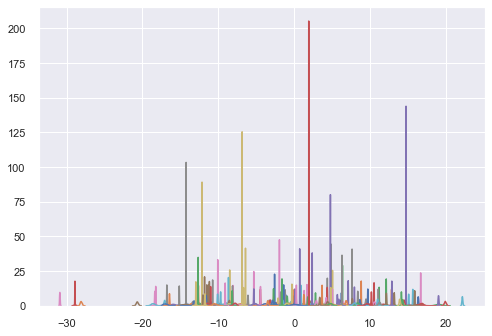

In [357]:
rand_df_f_lr = pd.DataFrame(data=meanI_f_lr_small[14])
for i in range(200):
    sns.kdeplot(rand_df_f_lr[i], legend=False)

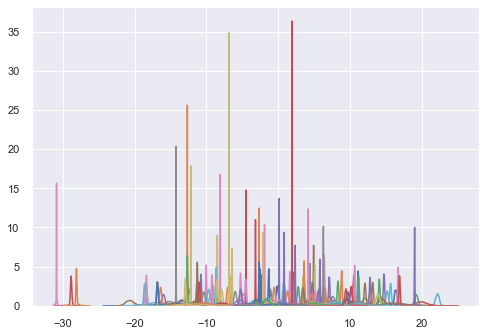

In [356]:
rand_df_f_hr = pd.DataFrame(data=meanI_f_hr_small[18])
for i in range(200):
    sns.kdeplot(rand_df_f_hr[i], legend=False)

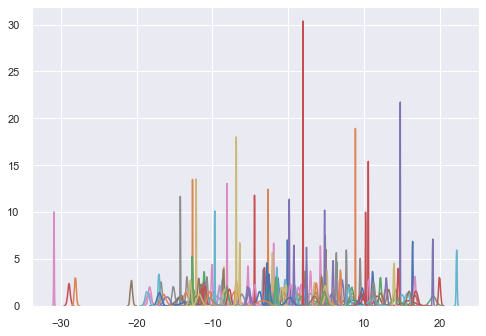

In [360]:
test_df_lr = pd.DataFrame(data=data['X_lr_test'])
for i in range(200):
    sns.kdeplot(test_df_lr[i], legend=False)

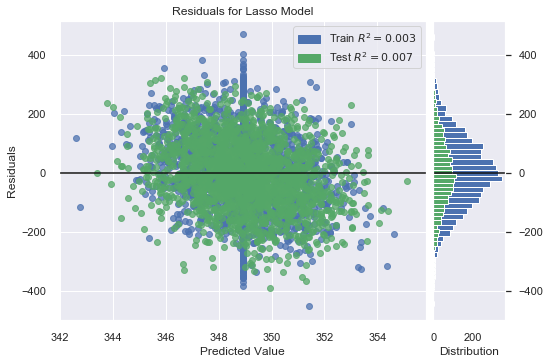

In [569]:
visualizer = ResidualsPlot(Lasso(alpha=10))

visualizer.fit(meanI_r_lr_big[6] , data['y_lr_big_train'])  # Fit the training data to the visualizer
visualizer.score(data['X_lr_test'], data['y_lr_test'])  # Evaluate the model on the test data
visualizer.show() 

In [568]:
alphas_mi_r_lr_big[6]

0.09787278933651056

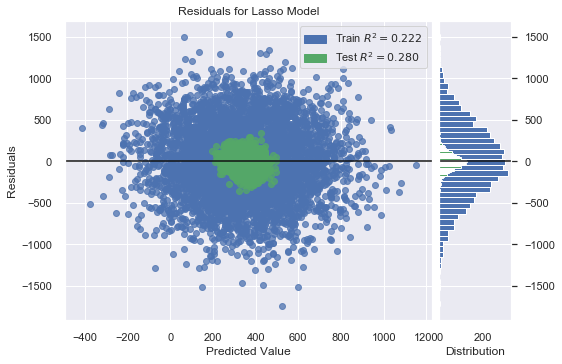

In [344]:
visualizer = ResidualsPlot(Lasso(alpha=alphas_mi_f_hr_big[17]))

visualizer.fit(meanI_f_hr_big[17] , data['y_hr_big_train'])  # Fit the training data to the visualizer
visualizer.score(data['X_lr_test'], data['y_lr_test'])  # Evaluate the model on the test data
visualizer.show() 

In [339]:
print(np.mean(mi_r_lr_small_score_lasso),
      np.mean(mi_f_lr_small_score_lasso),
      np.mean(mi_r_hr_small_score_lasso),
      np.mean(mi_f_hr_small_score_lasso),
      np.mean(mi_r_lr_big_score_lasso),
      np.mean(mi_f_lr_big_score_lasso),
      np.mean(mi_r_hr_big_score_lasso),
      np.mean(mi_f_hr_big_score_lasso))

0.059098806864614405 0.27521198254921203 0.09718421902478122 0.1565967522439617 -0.95356198406333 0.3114209278659338 0.28661641358504353 0.2920185676967052


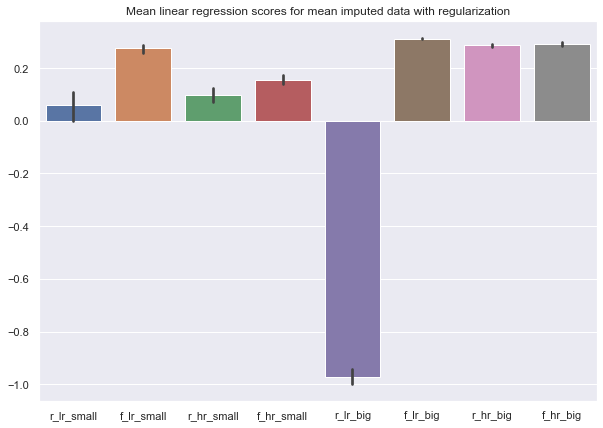

In [162]:
meanImp_data_lasso = {'r_lr_small': mi_r_lr_small_score_lasso, 
                'f_lr_small': mi_f_lr_small_score_lasso, 
                'r_hr_small': mi_r_hr_small_score_lasso,
                'f_hr_small': mi_f_hr_small_score_lasso,
                'r_lr_big': mi_r_lr_big_score_lasso,
                'f_lr_big': mi_f_lr_big_score_lasso,
                'r_hr_big': mi_r_hr_big_score_lasso,
                'f_hr_big': mi_f_hr_big_score_lasso}

meanimp_df_lasso = pd.DataFrame(data=meanImp_data_lasso)
plt.figure(figsize=[10, 7])
sns.barplot(data=meanimp_df_lasso)
plt.title("Mean linear regression scores for mean imputed data with regularization")
plt.savefig('mean impute lasso regression')

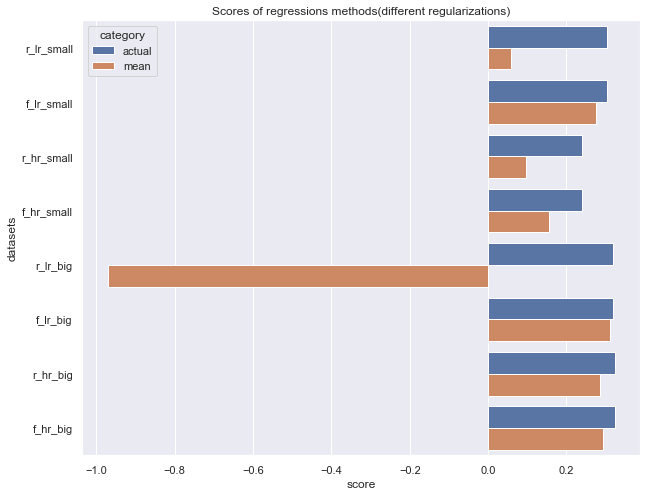

In [166]:
data_scores_mean = [[lasso_lr_small_score, 'actual', 'r_lr_small'], 
               [lasso_lr_small_score, 'actual', 'f_lr_small'],
               [lasso_hr_small_score, 'actual', 'r_hr_small'],
               [lasso_hr_small_score, 'actual', 'f_hr_small'],
               [lasso_lr_big_score, 'actual', 'r_lr_big'],
               [lasso_lr_big_score, 'actual', 'f_lr_big'],
               [lasso_hr_big_score, 'actual', 'r_hr_big'],
               [lasso_hr_big_score, 'actual', 'f_hr_big'],
               [np.mean(mi_r_lr_small_score_lasso), 'mean', 'r_lr_small'],
               [np.mean(mi_f_lr_small_score_lasso), 'mean', 'f_lr_small'],
               [np.mean(mi_r_hr_small_score_lasso), 'mean', 'r_hr_small'],
               [np.mean(mi_f_hr_small_score_lasso), 'mean', 'f_hr_small'],
               [np.mean(mi_r_lr_big_score_lasso), 'mean', 'r_lr_big'],
               [np.mean(mi_f_lr_big_score_lasso), 'mean', 'f_lr_big'],
               [np.mean(mi_r_hr_big_score_lasso), 'mean', 'r_hr_big'],
               [np.mean(mi_f_hr_big_score_lasso),'mean', 'f_hr_big']]

columns_score_df_mean = ['score', 'category', 'datasets']
scores_df_mean = pd.DataFrame(data=data_scores_mean, columns=columns_score_df_mean)

plt.figure(figsize=[10,8])
sns.barplot(x='score', y='datasets', hue='category', data=scores_df_mean)
plt.title("Comparison of mean imputation and baseline with lasso regression")
plt.savefig('Regression scores comparison-mean-actual')

In [27]:
#choosing best alpha for mean imputation 
mi_r_lr_small_cv = []
mi_f_lr_small_cv = []
mi_r_hr_small_cv = []
mi_f_hr_small_cv = []
mi_r_lr_big_cv = []
mi_f_lr_big_cv = []
mi_r_hr_big_cv = []
mi_f_hr_big_cv = []

warnings.filterwarnings('ignore')

for r in range(20):
    mi_r_lr_small_cv.append(ElasticNetCV(l1_ratio = 0.9, 
                                                  cv=6).fit(meanI_r_lr_small[r], 
                                                            data['y_lr_small_train']))    
    
    mi_f_lr_small_cv.append(ElasticNetCV(l1_ratio = 0.9, 
                                                  cv=6).fit(meanI_f_lr_small[r], 
                                                            data['y_lr_small_train']))

    mi_r_hr_small_cv.append(ElasticNetCV(l1_ratio = 0.9, 
                                                  cv=6).fit(meanI_r_hr_small[r], 
                                                            data['y_hr_small_train']))

    mi_f_hr_small_cv.append(ElasticNetCV(l1_ratio = 0.9, 
                                                  cv=6).fit(meanI_f_hr_small[r], 
                                                            data['y_hr_small_train']))

    mi_r_lr_big_cv.append(ElasticNetCV(l1_ratio = 0.9, 
                                                  cv=6).fit(meanI_r_lr_big[r], 
                                                            data['y_lr_big_train']))

    mi_f_lr_big_cv.append(ElasticNetCV(l1_ratio = 0.9, 
                                                  cv=6).fit(meanI_f_lr_big[r], 
                                                            data['y_lr_big_train']))

    mi_r_hr_big_cv.append(ElasticNetCV(l1_ratio = 0.9, 
                                                  cv=6).fit(meanI_r_hr_big[r], 
                                                            data['y_hr_big_train']))

    mi_f_hr_big_cv.append(ElasticNetCV(l1_ratio = 0.9, 
                                                  cv=6).fit(meanI_f_hr_big[r], 
                                                            data['y_hr_big_train']))


In [28]:
datasets_mi = [mi_r_lr_small_cv,
mi_f_lr_small_cv,
mi_r_hr_small_cv,
mi_f_hr_small_cv,
mi_r_lr_big_cv,
mi_f_lr_big_cv,
mi_r_hr_big_cv,
mi_f_hr_big_cv]

alphas_mi = [np.mean([x[i].alpha_ for i in range(20)]) for x in datasets_mi]

Text(0.5, 1.0, 'Mean alphas after hyperparameter search with l1_ratio set to 0.9 for mean imputation')

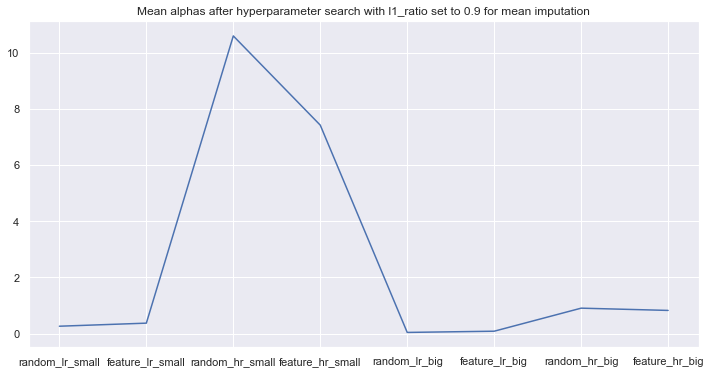

In [30]:
dataset_names = ['random_lr_small', 'feature_lr_small', 'random_hr_small', 'feature_hr_small', 
         'random_lr_big', 'feature_lr_big', 'random_hr_big', 'feature_hr_big']

plt.figure(figsize= [12, 6])
plt.plot(dataset_names, alphas_mi)
plt.title('Mean alphas after hyperparameter search with l1_ratio set to 0.9 for mean imputation')

In [31]:
# Feature selection mean imputation

ntimes_nonzero_r_lr_small_mi = [np.zeros(200).astype(int) for _ in range(20)]
sample_enet=[[] for _ in range(20)]
for sim in range(20):
    for i in range(200):
        resampled_X , resampled_y = utils.resample(meanI_r_lr_small[sim], data['y_lr_small_train'])
        sample_enet[sim].append(ElasticNet(alpha=alphas_mi[0] , l1_ratio=.9).fit(resampled_X, resampled_y))
        nonzero_ind = np.where(sample_enet[sim][i].coef_ != 0)[0]
        ntimes_nonzero_r_lr_small_mi[sim][nonzero_ind] += 1
        

ntimes_nonzero_f_lr_small_mi = [np.zeros(200).astype(int) for _ in range(20)]
sample_enet=[[] for _ in range(20)]
for sim in range(20):
    for i in range(200):
        resampled_X , resampled_y = utils.resample(meanI_f_lr_small[sim], data['y_lr_small_train'])
        sample_enet[sim].append(ElasticNet(alpha=alphas_mi[1] , l1_ratio=.9).fit(resampled_X, resampled_y))
        nonzero_ind = np.where(sample_enet[sim][i].coef_ != 0)[0]
        ntimes_nonzero_f_lr_small_mi[sim][nonzero_ind] += 1
        



ntimes_nonzero_r_hr_small_mi = [np.zeros(200).astype(int) for _ in range(20)]
sample_enet=[[] for _ in range(20)]
for sim in range(20):
    for i in range(200):
        resampled_X , resampled_y = utils.resample(meanI_r_hr_small[sim], data['y_hr_small_train'])
        sample_enet[sim].append(ElasticNet(alpha=alphas_mi[2] , l1_ratio=.9).fit(resampled_X, resampled_y))
        nonzero_ind = np.where(sample_enet[sim][i].coef_ != 0)[0]
        ntimes_nonzero_r_hr_small_mi[sim][nonzero_ind] += 1
        


ntimes_nonzero_f_hr_small_mi = [np.zeros(200).astype(int) for _ in range(20)]
sample_enet=[[] for _ in range(20)]
for sim in range(20):
    for i in range(200):
        resampled_X , resampled_y = utils.resample(meanI_f_hr_small[sim], data['y_hr_small_train'])
        sample_enet[sim].append(ElasticNet(alpha=alphas_mi[3] , l1_ratio=.9).fit(resampled_X, resampled_y))
        nonzero_ind = np.where(sample_enet[sim][i].coef_ != 0)[0]
        ntimes_nonzero_f_hr_small_mi[sim][nonzero_ind] += 1

In [32]:
chosen_predictors_r_lr_small_mi = [np.where(ntimes_nonzero_r_lr_small_mi[sim] >= 180) for sim in range(20)]
chosen_predictors_f_lr_small_mi = [np.where(ntimes_nonzero_f_lr_small_mi[sim] >= 180) for sim in range(20)]
chosen_predictors_r_hr_small_mi = [np.where(ntimes_nonzero_r_hr_small_mi[sim] >= 180) for sim in range(20)]
chosen_predictors_f_hr_small_mi = [np.where(ntimes_nonzero_f_hr_small_mi[sim] >= 180) for sim in range(20)]

In [33]:
ntimes_nonzero_r_lr_big_mi = [np.zeros(200).astype(int) for _ in range(20)]
sample_enet=[[] for _ in range(20)]
for sim in range(20):
    for i in range(100):
        resampled_X , resampled_y = utils.resample(meanI_r_lr_big[sim], data['y_lr_big_train'])
        sample_enet[sim].append(ElasticNet(alpha=alphas_mi[4] , l1_ratio=.9).fit(resampled_X, resampled_y))
        nonzero_ind = np.where(sample_enet[sim][i].coef_ != 0)[0]
        ntimes_nonzero_r_lr_big_mi[sim][nonzero_ind] += 1
        

ntimes_nonzero_f_lr_big_mi = [np.zeros(200).astype(int) for _ in range(20)]
sample_enet=[[] for _ in range(20)]
for sim in range(20):
    for i in range(100):
        resampled_X , resampled_y = utils.resample(meanI_f_lr_big[sim], data['y_lr_big_train'])
        sample_enet[sim].append(ElasticNet(alpha=alphas_mi[5] , l1_ratio=.9).fit(resampled_X, resampled_y))
        nonzero_ind = np.where(sample_enet[sim][i].coef_ != 0)[0]
        ntimes_nonzero_f_lr_big_mi[sim][nonzero_ind] += 1
        



ntimes_nonzero_r_hr_big_mi = [np.zeros(200).astype(int) for _ in range(20)]
sample_enet=[[] for _ in range(20)]
for sim in range(20):
    for i in range(100):
        resampled_X , resampled_y = utils.resample(meanI_r_hr_big[sim], data['y_hr_big_train'])
        sample_enet[sim].append(ElasticNet(alpha=alphas_mi[6] , l1_ratio=.9).fit(resampled_X, resampled_y))
        nonzero_ind = np.where(sample_enet[sim][i].coef_ != 0)[0]
        ntimes_nonzero_r_hr_big_mi[sim][nonzero_ind] += 1
        


ntimes_nonzero_f_hr_big_mi = [np.zeros(200).astype(int) for _ in range(20)]
sample_enet=[[] for _ in range(20)]
for sim in range(20):
    for i in range(100):
        resampled_X , resampled_y = utils.resample(meanI_f_hr_big[sim], data['y_hr_big_train'])
        sample_enet[sim].append(ElasticNet(alpha=alphas_mi[7] , l1_ratio=.9).fit(resampled_X, resampled_y))
        nonzero_ind = np.where(sample_enet[sim][i].coef_ != 0)[0]
        ntimes_nonzero_f_hr_big_mi[sim][nonzero_ind] += 1

In [34]:
chosen_predictors_r_lr_big_mi = [np.where(ntimes_nonzero_r_lr_big_mi[sim] >= 90) for sim in range(20)]
chosen_predictors_f_lr_big_mi = [np.where(ntimes_nonzero_f_lr_big_mi[sim] >= 90) for sim in range(20)]
chosen_predictors_r_hr_big_mi = [np.where(ntimes_nonzero_r_hr_big_mi[sim] >= 90) for sim in range(20)]
chosen_predictors_f_hr_big_mi = [np.where(ntimes_nonzero_f_hr_big_mi[sim] >= 90) for sim in range(20)]

In [37]:
chosen_predictors_r_lr_small_mi_flat = flatten_predictors(chosen_predictors_r_lr_small_mi)
chosen_predictors_f_lr_small_mi_flat = flatten_predictors(chosen_predictors_f_lr_small_mi)
chosen_predictors_r_hr_small_mi_flat = flatten_predictors(chosen_predictors_r_hr_small_mi)
chosen_predictors_f_hr_small_mi_flat = flatten_predictors(chosen_predictors_f_hr_small_mi)
                                                          
unique_r_lr_small_mi, counts_r_lr_small_mi = np.unique(chosen_predictors_r_lr_small_mi_flat, return_counts=True)
x = dict(zip(unique_r_lr_small_mi, counts_r_lr_small_mi))
sorted_r_lr_small_mi = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
                                                          
unique_f_lr_small_mi, counts_f_lr_small_mi = np.unique(chosen_predictors_f_lr_small_mi_flat, return_counts=True)
x = dict(zip(unique_f_lr_small_mi, counts_f_lr_small_mi))
sorted_f_lr_small_mi = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}

unique_r_hr_small_mi, counts_r_hr_small_mi = np.unique(chosen_predictors_r_hr_small_mi_flat, return_counts=True)
x = dict(zip(unique_r_hr_small_mi, counts_r_hr_small_mi))
sorted_r_hr_small_mi = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
                                                          
unique_f_hr_small_mi, counts_f_hr_small_mi = np.unique(chosen_predictors_f_hr_small_mi_flat, return_counts=True)
x = dict(zip(unique_f_hr_small_mi, counts_f_hr_small_mi))
sorted_f_hr_small_mi = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}      

chosen_predictors_r_lr_big_mi_flat = flatten_predictors(chosen_predictors_r_lr_big_mi)
chosen_predictors_f_lr_big_mi_flat = flatten_predictors(chosen_predictors_f_lr_big_mi)
chosen_predictors_r_hr_big_mi_flat = flatten_predictors(chosen_predictors_r_hr_big_mi)
chosen_predictors_f_hr_big_mi_flat = flatten_predictors(chosen_predictors_f_hr_big_mi)
                                                          
unique_r_lr_big_mi, counts_r_lr_big_mi = np.unique(chosen_predictors_r_lr_big_mi_flat, return_counts=True)
x = dict(zip(unique_r_lr_big_mi, counts_r_lr_big_mi))
sorted_r_lr_big_mi = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
                                                          
unique_f_lr_big_mi, counts_f_lr_big_mi = np.unique(chosen_predictors_f_lr_big_mi_flat, return_counts=True)
x = dict(zip(unique_f_lr_big_mi, counts_f_lr_big_mi))
sorted_f_lr_big_mi = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}

unique_r_hr_big_mi, counts_r_hr_big_mi = np.unique(chosen_predictors_r_hr_big_mi_flat, return_counts=True)
x = dict(zip(unique_r_hr_big_mi, counts_r_hr_big_mi))
sorted_r_hr_big_mi = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
                                                          
unique_f_hr_big_mi, counts_f_hr_big_mi = np.unique(chosen_predictors_f_hr_big_mi_flat, return_counts=True)
x = dict(zip(unique_f_hr_big_mi, counts_f_hr_big_mi))
sorted_f_hr_big_mi = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}   
  


In [430]:
print(np.where(chosen_predictors_lr_small == 167),
      np.where(chosen_predictors_lr_small == 100),
      np.where(chosen_predictors_lr_small == 178),
      np.where(chosen_predictors_lr_small == 160),
      np.where(chosen_predictors_lr_small == 144),
      np.where(chosen_predictors_lr_small == 139))

#  139.0: 15,
#  144.0: 15,
#  160.0: 16,
#  178.0: 16,
#  100.0: 18,
#  167.0: 20}

print(sorted_r_lr_small_mi[199], sorted_r_lr_small_mi[139],  
      sorted_r_lr_small_mi[65],  sorted_r_lr_small_mi[97], 
      sorted_r_lr_small_mi[160],  sorted_r_lr_small_mi[84])



(array([12], dtype=int64),) (array([], dtype=int64),) (array([13], dtype=int64),) (array([4], dtype=int64),) (array([20], dtype=int64),) (array([1], dtype=int64),)
13 15 15 2 16 4


In [442]:
ntimes_nonzero_lr_small[[167, 100, 178, 160, 144, 139]]

array([195, 137, 194, 199, 185, 200])

In [428]:
sorted_r_lr_small_mi

{0.0: 1,
 3.0: 1,
 4.0: 1,
 8.0: 1,
 15.0: 1,
 28.0: 1,
 29.0: 1,
 33.0: 1,
 36.0: 1,
 56.0: 1,
 58.0: 1,
 61.0: 1,
 89.0: 1,
 90.0: 1,
 92.0: 1,
 96.0: 1,
 102.0: 1,
 130.0: 1,
 131.0: 1,
 136.0: 1,
 138.0: 1,
 145.0: 1,
 150.0: 1,
 155.0: 1,
 162.0: 1,
 16.0: 2,
 24.0: 2,
 40.0: 2,
 49.0: 2,
 55.0: 2,
 57.0: 2,
 69.0: 2,
 78.0: 2,
 97.0: 2,
 99.0: 2,
 110.0: 2,
 124.0: 2,
 127.0: 2,
 152.0: 2,
 157.0: 2,
 183.0: 2,
 191.0: 2,
 192.0: 2,
 13.0: 3,
 32.0: 3,
 41.0: 3,
 47.0: 3,
 51.0: 3,
 68.0: 3,
 75.0: 3,
 79.0: 3,
 101.0: 3,
 108.0: 3,
 121.0: 3,
 132.0: 3,
 161.0: 3,
 166.0: 3,
 174.0: 3,
 180.0: 3,
 11.0: 4,
 18.0: 4,
 23.0: 4,
 30.0: 4,
 31.0: 4,
 39.0: 4,
 42.0: 4,
 59.0: 4,
 60.0: 4,
 84.0: 4,
 85.0: 4,
 105.0: 4,
 106.0: 4,
 115.0: 4,
 148.0: 4,
 175.0: 4,
 177.0: 4,
 187.0: 4,
 188.0: 4,
 21.0: 5,
 26.0: 5,
 54.0: 5,
 70.0: 5,
 72.0: 5,
 82.0: 5,
 94.0: 5,
 98.0: 5,
 112.0: 5,
 126.0: 5,
 135.0: 5,
 153.0: 5,
 185.0: 5,
 189.0: 5,
 50.0: 6,
 52.0: 6,
 80.0: 6,
 81.0: 6,
 86.0

In [447]:
print(np.where(chosen_predictors_lr_small == 97),
      np.where(chosen_predictors_lr_small == 91),
      np.where(chosen_predictors_lr_small == 34),
      np.where(chosen_predictors_lr_small == 149),
      np.where(chosen_predictors_lr_small == 100),
      np.where(chosen_predictors_lr_small == 63))

print(sorted_f_lr_small_mi[199], sorted_f_lr_small_mi[139],  
      sorted_f_lr_small_mi[65],  sorted_f_lr_small_mi[97], 
      sorted_f_lr_small_mi[160],  sorted_f_lr_small_mi[84])


(array([3], dtype=int64),) (array([6], dtype=int64),) (array([], dtype=int64),) (array([19], dtype=int64),) (array([], dtype=int64),) (array([], dtype=int64),)
9 10 12 14 12 9


In [446]:
np.where(chosen_predictors_lr_small == 167)

(array([12], dtype=int64),)

In [405]:
sorted_f_lr_small_mi

{9.0: 1,
 11.0: 1,
 26.0: 1,
 73.0: 1,
 79.0: 1,
 101.0: 1,
 127.0: 1,
 131.0: 1,
 138.0: 1,
 190.0: 1,
 3.0: 2,
 18.0: 2,
 27.0: 2,
 40.0: 2,
 42.0: 2,
 85.0: 2,
 105.0: 2,
 108.0: 2,
 155.0: 2,
 157.0: 2,
 41.0: 3,
 44.0: 3,
 57.0: 3,
 59.0: 3,
 70.0: 3,
 106.0: 3,
 120.0: 3,
 122.0: 3,
 132.0: 3,
 176.0: 3,
 179.0: 3,
 181.0: 3,
 31.0: 4,
 50.0: 4,
 68.0: 4,
 82.0: 4,
 98.0: 4,
 126.0: 4,
 133.0: 4,
 60.0: 5,
 69.0: 5,
 112.0: 5,
 115.0: 5,
 135.0: 5,
 166.0: 5,
 23.0: 6,
 142.0: 6,
 153.0: 6,
 159.0: 6,
 171.0: 6,
 193.0: 6,
 52.0: 7,
 66.0: 7,
 111.0: 7,
 119.0: 7,
 147.0: 7,
 148.0: 7,
 53.0: 8,
 62.0: 8,
 87.0: 8,
 94.0: 8,
 95.0: 8,
 198.0: 8,
 35.0: 9,
 43.0: 9,
 84.0: 9,
 113.0: 9,
 118.0: 9,
 186.0: 9,
 187.0: 9,
 189.0: 9,
 199.0: 9,
 21.0: 10,
 81.0: 10,
 110.0: 10,
 137.0: 10,
 139.0: 10,
 140.0: 10,
 172.0: 10,
 195.0: 10,
 77.0: 11,
 80.0: 11,
 125.0: 11,
 174.0: 11,
 12.0: 12,
 39.0: 12,
 65.0: 12,
 116.0: 12,
 144.0: 12,
 146.0: 12,
 160.0: 12,
 167.0: 12,
 178.0: 12,

In [471]:
print(np.where(chosen_predictors_hr_small == 148),
      np.where(chosen_predictors_hr_small == 172),
      np.where(chosen_predictors_hr_small == 110),
      np.where(chosen_predictors_hr_small == 39),
      np.where(chosen_predictors_hr_small == 176),
      np.where(chosen_predictors_hr_small == 140))


#  140.0: 9,
#  176.0: 13,
#  39.0: 14,
#  110.0: 15,
#  172.0: 15,
#  148.0: 19

print(sorted_r_hr_small_mi[97], sorted_r_hr_small_mi[185],  
      sorted_r_hr_small_mi[55],  sorted_r_hr_small_mi[148], 
      sorted_r_hr_small_mi[40],  sorted_r_hr_small_mi[39])

(array([3], dtype=int64),) (array([7], dtype=int64),) (array([11], dtype=int64),) (array([5], dtype=int64),) (array([8], dtype=int64),) (array([23], dtype=int64),)
7 1 1 19 3 14


In [469]:
chosen_predictors_hr_small[:20]

array([ 97, 185,  55, 148,  40,  39,  34, 172, 176, 114,  26, 110, 137,
        95,  92, 190, 189,  49, 150, 101], dtype=int64)

In [468]:
sorted_r_hr_small_mi[chosen_predictors_hr_small[:20]]

TypeError: unhashable type: 'list'

In [464]:
ntimes_nonzero_hr_small[[int(x) for x in list(sorted_r_hr_small_mi.keys())]]

array([195, 190, 181, 191, 194, 195, 200, 197, 187, 196, 190, 195, 200,
       179, 182, 197, 183, 193, 195, 182, 195, 181, 191, 195, 184, 191,
       181, 186, 197, 192, 180, 190, 193, 200, 192, 200, 190, 195, 200,
       187, 192, 195, 190, 190, 186, 190, 184, 195, 199, 199, 197, 200,
       197, 195, 195, 198, 198, 197, 194, 194, 195, 192, 195, 194, 199,
       200, 188, 197, 200, 200, 199, 200, 198, 200, 200, 200, 200, 200])

In [406]:
sorted_r_hr_small_mi

{3.0: 1,
 9.0: 1,
 19.0: 1,
 22.0: 1,
 31.0: 1,
 42.0: 1,
 55.0: 1,
 56.0: 1,
 59.0: 1,
 60.0: 1,
 82.0: 1,
 89.0: 1,
 92.0: 1,
 96.0: 1,
 99.0: 1,
 100.0: 1,
 108.0: 1,
 111.0: 1,
 112.0: 1,
 115.0: 1,
 119.0: 1,
 130.0: 1,
 131.0: 1,
 142.0: 1,
 143.0: 1,
 144.0: 1,
 159.0: 1,
 160.0: 1,
 163.0: 1,
 167.0: 1,
 168.0: 1,
 174.0: 1,
 184.0: 1,
 185.0: 1,
 191.0: 1,
 26.0: 2,
 29.0: 2,
 32.0: 2,
 34.0: 2,
 43.0: 2,
 54.0: 2,
 77.0: 2,
 98.0: 2,
 132.0: 2,
 145.0: 2,
 155.0: 2,
 165.0: 2,
 181.0: 2,
 186.0: 2,
 189.0: 2,
 35.0: 3,
 40.0: 3,
 44.0: 3,
 50.0: 3,
 120.0: 3,
 122.0: 3,
 127.0: 3,
 133.0: 3,
 136.0: 3,
 146.0: 3,
 161.0: 3,
 23.0: 4,
 79.0: 4,
 91.0: 4,
 101.0: 4,
 114.0: 4,
 179.0: 4,
 188.0: 4,
 190.0: 4,
 137.0: 6,
 49.0: 7,
 97.0: 7,
 140.0: 9,
 176.0: 13,
 39.0: 14,
 110.0: 15,
 172.0: 15,
 148.0: 19}

In [475]:
print(np.where(chosen_predictors_hr_small == 148),
      np.where(chosen_predictors_hr_small == 172),
      np.where(chosen_predictors_hr_small == 127),
      np.where(chosen_predictors_hr_small == 39),
      np.where(chosen_predictors_hr_small == 44),
      np.where(chosen_predictors_hr_small == 110))



print(sorted_f_hr_small_mi[97], sorted_f_hr_small_mi[185],  
      sorted_f_hr_small_mi[55],  sorted_f_hr_small_mi[148], 
      sorted_f_hr_small_mi[40],  sorted_f_hr_small_mi[39])

(array([3], dtype=int64),) (array([7], dtype=int64),) (array([21], dtype=int64),) (array([5], dtype=int64),) (array([30], dtype=int64),) (array([11], dtype=int64),)
13 9 10 19 12 17


In [474]:
ntimes_nonzero_hr_small[44]

197

In [407]:
sorted_f_hr_small_mi

{21.0: 1,
 32.0: 1,
 33.0: 1,
 45.0: 1,
 47.0: 1,
 52.0: 1,
 56.0: 1,
 82.0: 1,
 86.0: 1,
 90.0: 1,
 102.0: 1,
 108.0: 1,
 135.0: 1,
 144.0: 1,
 151.0: 1,
 152.0: 1,
 157.0: 1,
 167.0: 1,
 169.0: 1,
 177.0: 1,
 187.0: 1,
 199.0: 1,
 11.0: 2,
 53.0: 2,
 60.0: 2,
 61.0: 2,
 63.0: 2,
 109.0: 2,
 119.0: 2,
 189.0: 2,
 54.0: 3,
 122.0: 3,
 133.0: 3,
 142.0: 3,
 150.0: 3,
 179.0: 3,
 198.0: 3,
 22.0: 4,
 23.0: 4,
 30.0: 4,
 87.0: 4,
 146.0: 4,
 111.0: 5,
 132.0: 5,
 35.0: 6,
 59.0: 6,
 186.0: 6,
 95.0: 7,
 98.0: 7,
 31.0: 8,
 57.0: 8,
 120.0: 8,
 163.0: 8,
 181.0: 8,
 50.0: 9,
 136.0: 9,
 161.0: 9,
 185.0: 9,
 188.0: 9,
 55.0: 10,
 101.0: 10,
 125.0: 10,
 26.0: 11,
 49.0: 11,
 91.0: 11,
 40.0: 12,
 79.0: 12,
 140.0: 12,
 176.0: 12,
 92.0: 13,
 97.0: 13,
 114.0: 13,
 190.0: 13,
 43.0: 14,
 137.0: 14,
 34.0: 15,
 110.0: 15,
 44.0: 16,
 39.0: 17,
 127.0: 17,
 172.0: 18,
 148.0: 19}

In [480]:
print(np.where(chosen_predictors_lr_big == 199),
      np.where(chosen_predictors_lr_big == 186),
      np.where(chosen_predictors_lr_big == 184),
      np.where(chosen_predictors_lr_big == 178),
      np.where(chosen_predictors_lr_big == 172),
      np.where(chosen_predictors_lr_big == 167))

#  167.0: 20,
#  172.0: 20,
#  178.0: 20,
#  184.0: 20,
#  186.0: 20,
#  199.0: 20
print(sorted_r_lr_big_mi[137], sorted_r_lr_big_mi[98],  
      sorted_r_lr_big_mi[193],  sorted_r_lr_big_mi[133], 
      sorted_r_lr_big_mi[55],  sorted_r_lr_big_mi[171])

print(sorted_r_lr_big_mi[113], sorted_r_lr_big_mi[87],  
      sorted_r_lr_big_mi[140],  sorted_r_lr_big_mi[33], 
      sorted_r_lr_big_mi[39],  sorted_r_lr_big_mi[82])

113, 199, 140,  33,  39,  82,  87,

(array([7], dtype=int64),) (array([], dtype=int64),) (array([], dtype=int64),) (array([], dtype=int64),) (array([24], dtype=int64),) (array([], dtype=int64),)
20 18 17 20 2 19
19 20 20 9 20 20


(113, 199, 140, 33, 39, 82, 87)

In [477]:
ntimes_nonzero_lr_big[[199, 186, 184, 178, 172, 167]]

array([195, 113, 165, 105, 182, 171])

In [408]:
sorted_r_lr_big_mi

{10.0: 1,
 14.0: 1,
 20.0: 1,
 22.0: 1,
 38.0: 1,
 128.0: 1,
 143.0: 1,
 170.0: 1,
 194.0: 1,
 2.0: 2,
 17.0: 2,
 45.0: 2,
 55.0: 2,
 64.0: 2,
 107.0: 2,
 130.0: 2,
 182.0: 2,
 56.0: 3,
 61.0: 3,
 76.0: 3,
 92.0: 3,
 136.0: 3,
 156.0: 3,
 163.0: 3,
 0.0: 4,
 4.0: 4,
 9.0: 4,
 57.0: 4,
 197.0: 4,
 19.0: 5,
 67.0: 5,
 89.0: 5,
 158.0: 5,
 165.0: 5,
 177.0: 5,
 28.0: 6,
 47.0: 6,
 51.0: 6,
 58.0: 6,
 101.0: 6,
 103.0: 6,
 131.0: 6,
 183.0: 6,
 16.0: 7,
 32.0: 7,
 93.0: 7,
 99.0: 7,
 102.0: 7,
 108.0: 7,
 121.0: 7,
 138.0: 7,
 41.0: 8,
 152.0: 8,
 168.0: 8,
 180.0: 8,
 6.0: 9,
 8.0: 9,
 29.0: 9,
 30.0: 9,
 33.0: 9,
 49.0: 9,
 69.0: 9,
 96.0: 9,
 169.0: 9,
 104.0: 10,
 106.0: 10,
 191.0: 10,
 11.0: 11,
 109.0: 11,
 124.0: 11,
 134.0: 11,
 154.0: 11,
 157.0: 11,
 161.0: 11,
 192.0: 11,
 15.0: 12,
 18.0: 12,
 24.0: 12,
 42.0: 12,
 72.0: 12,
 79.0: 12,
 127.0: 12,
 145.0: 12,
 148.0: 12,
 150.0: 12,
 164.0: 12,
 27.0: 13,
 40.0: 13,
 59.0: 13,
 78.0: 13,
 85.0: 13,
 115.0: 13,
 132.0: 13,
 151

In [488]:
print(np.where(chosen_predictors_lr_big == 140),
      np.where(chosen_predictors_lr_big == 185),
      np.where(chosen_predictors_lr_big == 167),
      np.where(chosen_predictors_lr_big == 3),
      np.where(chosen_predictors_lr_big == 120),
      np.where(chosen_predictors_lr_big == 100),
      np.where(chosen_predictors_lr_big == 193),
      np.where(chosen_predictors_lr_big == 149))

#  100.0: 15,
#  120.0: 15,
#  3.0: 16,
#  167.0: 17,
#  185.0: 17,
#  140.0: 18}

print(sorted_f_lr_big_mi[137], sorted_f_lr_big_mi[98],  
      sorted_f_lr_big_mi[193],  sorted_f_lr_big_mi[133], 
  sorted_f_lr_big_mi[171])

(array([8], dtype=int64),) (array([], dtype=int64),) (array([], dtype=int64),) (array([], dtype=int64),) (array([], dtype=int64),) (array([], dtype=int64),) (array([2], dtype=int64),) (array([], dtype=int64),)
12 7 14 10 11


In [484]:
ntimes_nonzero_lr_big[[140, 185, 167, 3, 120, 100, 193]]

array([195,  91, 171, 164, 143, 143, 198])

In [409]:
sorted_f_lr_big_mi

{4.0: 1,
 16.0: 1,
 27.0: 1,
 32.0: 1,
 42.0: 1,
 45.0: 1,
 68.0: 1,
 79.0: 1,
 90.0: 1,
 92.0: 1,
 99.0: 1,
 102.0: 1,
 104.0: 1,
 105.0: 1,
 130.0: 1,
 136.0: 1,
 143.0: 1,
 170.0: 1,
 177.0: 1,
 182.0: 1,
 9.0: 2,
 33.0: 2,
 49.0: 2,
 64.0: 2,
 89.0: 2,
 121.0: 2,
 131.0: 2,
 158.0: 2,
 164.0: 2,
 168.0: 2,
 15.0: 3,
 18.0: 3,
 29.0: 3,
 40.0: 3,
 47.0: 3,
 94.0: 3,
 101.0: 3,
 118.0: 3,
 132.0: 3,
 135.0: 3,
 145.0: 3,
 150.0: 3,
 161.0: 3,
 59.0: 4,
 70.0: 4,
 78.0: 4,
 122.0: 4,
 129.0: 4,
 152.0: 4,
 175.0: 4,
 26.0: 5,
 31.0: 5,
 54.0: 5,
 127.0: 5,
 151.0: 5,
 159.0: 5,
 50.0: 6,
 60.0: 6,
 86.0: 6,
 111.0: 6,
 114.0: 6,
 124.0: 6,
 126.0: 6,
 155.0: 6,
 190.0: 6,
 192.0: 6,
 11.0: 7,
 34.0: 7,
 41.0: 7,
 66.0: 7,
 98.0: 7,
 108.0: 7,
 116.0: 7,
 142.0: 7,
 148.0: 7,
 162.0: 7,
 174.0: 7,
 181.0: 7,
 188.0: 7,
 191.0: 7,
 198.0: 7,
 36.0: 8,
 44.0: 8,
 69.0: 8,
 73.0: 8,
 85.0: 8,
 157.0: 8,
 163.0: 8,
 166.0: 8,
 172.0: 8,
 187.0: 8,
 195.0: 8,
 23.0: 9,
 43.0: 9,
 52.0: 9,
 

In [493]:
 print(np.where(chosen_predictors_hr_big == 181),
      np.where(chosen_predictors_hr_big == 176),
      np.where(chosen_predictors_hr_big == 172),
      np.where(chosen_predictors_hr_big == 148),
      np.where(chosen_predictors_hr_big == 137),
      np.where(chosen_predictors_hr_big == 122),)
    
print(sorted_r_hr_big_mi[176], sorted_r_hr_big_mi[137],  
      sorted_r_hr_big_mi[148], sorted_r_hr_big_mi[54], 
      sorted_r_hr_big_mi[87], sorted_r_hr_big_mi[49])    



(array([24], dtype=int64),) (array([0], dtype=int64),) (array([8], dtype=int64),) (array([2], dtype=int64),) (array([1], dtype=int64),) (array([31], dtype=int64),)
20 20 20 17 5 20


In [492]:
ntimes_nonzero_hr_big[[181, 176, 172, 148, 137, 122]]

array([198, 200, 200, 200, 200, 196])

In [410]:
sorted_r_hr_big_mi

{2.0: 1,
 6.0: 1,
 17.0: 1,
 37.0: 1,
 38.0: 1,
 46.0: 1,
 48.0: 1,
 57.0: 1,
 58.0: 1,
 66.0: 1,
 76.0: 1,
 81.0: 1,
 93.0: 1,
 107.0: 1,
 120.0: 1,
 152.0: 1,
 156.0: 1,
 170.0: 1,
 183.0: 1,
 192.0: 1,
 4.0: 2,
 5.0: 2,
 10.0: 2,
 25.0: 2,
 26.0: 2,
 55.0: 2,
 64.0: 2,
 69.0: 2,
 94.0: 2,
 126.0: 2,
 160.0: 2,
 15.0: 3,
 18.0: 3,
 27.0: 3,
 28.0: 3,
 65.0: 3,
 85.0: 3,
 103.0: 3,
 138.0: 3,
 166.0: 3,
 194.0: 3,
 0.0: 4,
 7.0: 4,
 11.0: 4,
 34.0: 4,
 41.0: 4,
 45.0: 4,
 51.0: 4,
 62.0: 4,
 67.0: 4,
 95.0: 4,
 105.0: 4,
 106.0: 4,
 130.0: 4,
 165.0: 4,
 171.0: 4,
 177.0: 4,
 198.0: 4,
 13.0: 5,
 16.0: 5,
 61.0: 5,
 87.0: 5,
 102.0: 5,
 109.0: 5,
 115.0: 5,
 149.0: 5,
 159.0: 5,
 180.0: 5,
 90.0: 6,
 144.0: 6,
 56.0: 7,
 63.0: 7,
 78.0: 7,
 92.0: 7,
 96.0: 7,
 121.0: 7,
 153.0: 7,
 157.0: 7,
 193.0: 7,
 195.0: 7,
 24.0: 8,
 36.0: 8,
 72.0: 8,
 99.0: 8,
 100.0: 8,
 147.0: 8,
 175.0: 8,
 184.0: 8,
 197.0: 8,
 29.0: 9,
 30.0: 9,
 68.0: 9,
 116.0: 9,
 118.0: 9,
 143.0: 9,
 145.0: 9,
 154.

In [495]:
 print(np.where(chosen_predictors_hr_big == 181),
      np.where(chosen_predictors_hr_big == 176),
      np.where(chosen_predictors_hr_big == 172),
      np.where(chosen_predictors_hr_big == 148),
      np.where(chosen_predictors_hr_big == 140),
      np.where(chosen_predictors_hr_big == 137),)
    
    

print(sorted_f_hr_big_mi[176], sorted_f_hr_big_mi[137],  
      sorted_f_hr_big_mi[148], sorted_f_hr_big_mi[54], 
      sorted_f_hr_big_mi[87], sorted_f_hr_big_mi[49])    


(array([24], dtype=int64),) (array([0], dtype=int64),) (array([8], dtype=int64),) (array([2], dtype=int64),) (array([23], dtype=int64),) (array([1], dtype=int64),)
20 20 20 17 10 20


In [494]:
ntimes_nonzero_hr_big[140]

198

In [411]:
sorted_f_hr_big_mi

{2.0: 1,
 8.0: 1,
 38.0: 1,
 75.0: 1,
 81.0: 1,
 83.0: 1,
 88.0: 1,
 107.0: 1,
 129.0: 1,
 173.0: 1,
 192.0: 1,
 1.0: 2,
 37.0: 2,
 46.0: 2,
 58.0: 2,
 76.0: 2,
 158.0: 2,
 164.0: 2,
 166.0: 2,
 6.0: 3,
 20.0: 3,
 74.0: 3,
 104.0: 3,
 105.0: 3,
 120.0: 3,
 194.0: 3,
 0.0: 4,
 51.0: 4,
 84.0: 4,
 103.0: 4,
 130.0: 4,
 4.0: 5,
 5.0: 5,
 14.0: 5,
 28.0: 5,
 45.0: 5,
 57.0: 5,
 66.0: 5,
 73.0: 5,
 85.0: 5,
 102.0: 5,
 134.0: 5,
 156.0: 5,
 171.0: 5,
 182.0: 5,
 7.0: 6,
 13.0: 6,
 27.0: 6,
 30.0: 6,
 56.0: 6,
 67.0: 6,
 72.0: 6,
 91.0: 6,
 109.0: 6,
 138.0: 6,
 159.0: 6,
 198.0: 6,
 48.0: 7,
 68.0: 7,
 93.0: 7,
 106.0: 7,
 170.0: 7,
 180.0: 7,
 183.0: 7,
 197.0: 7,
 12.0: 8,
 18.0: 8,
 25.0: 8,
 26.0: 8,
 34.0: 8,
 62.0: 8,
 64.0: 8,
 95.0: 8,
 145.0: 8,
 149.0: 8,
 160.0: 8,
 41.0: 9,
 47.0: 9,
 55.0: 9,
 70.0: 9,
 89.0: 9,
 94.0: 9,
 115.0: 9,
 116.0: 9,
 152.0: 9,
 177.0: 9,
 185.0: 9,
 10.0: 10,
 11.0: 10,
 16.0: 10,
 36.0: 10,
 63.0: 10,
 65.0: 10,
 87.0: 10,
 98.0: 10,
 99.0: 10,
 108

In [539]:
# some work on mean imputed feature selection
count_r_lr_small_mi = 0 
for i in sorted_r_lr_small_mi.keys():
    if sorted_r_lr_small_mi[i] > 10:
        count_r_lr_small_mi += 1

count_f_lr_small_mi = 0 
for i in sorted_f_lr_small_mi.keys():
    if sorted_f_lr_small_mi[i] > 10:
        count_f_lr_small_mi += 1
        
count_r_hr_small_mi = 0 
for i in sorted_r_hr_small_mi.keys():
    if sorted_r_hr_small_mi[i] > 10:
        count_r_hr_small_mi += 1

count_f_hr_small_mi = 0 
for i in sorted_f_hr_small_mi.keys():
    if sorted_f_hr_small_mi[i] > 10:
        count_f_hr_small_mi += 1
        
count_r_lr_big_mi = 0 
for i in sorted_r_lr_big_mi.keys():
    if sorted_r_lr_big_mi[i] > 10:
        count_r_lr_big_mi += 1

count_f_lr_big_mi = 0 
for i in sorted_f_lr_big_mi.keys():
    if sorted_f_lr_big_mi[i] > 10:
        count_f_lr_big_mi += 1
        
count_r_hr_big_mi = 0 
for i in sorted_r_hr_big_mi.keys():
    if sorted_r_hr_big_mi[i] > 10:
        count_r_hr_big_mi += 1

count_f_hr_big_mi = 0 
for i in sorted_f_hr_big_mi.keys():
    if sorted_f_hr_big_mi[i] > 10:
        count_f_hr_big_mi += 1

count_r_lr_small_mi

In [548]:
# intersections
mi_r_lr_small_inter = len(set(list(sorted_r_lr_small_mi.keys())).intersection(chosen_predictors_lr_small))
mi_f_lr_small_inter = len(set(list(sorted_f_lr_small_mi.keys())).intersection(chosen_predictors_lr_small))
mi_r_hr_small_inter = len(set(list(sorted_r_hr_small_mi.keys())).intersection(chosen_predictors_hr_small))
mi_f_hr_small_inter = len(set(list(sorted_f_hr_small_mi.keys())).intersection(chosen_predictors_hr_small))
mi_r_lr_big_inter = len(set(list(sorted_r_lr_big_mi.keys())).intersection(chosen_predictors_lr_big))
mi_f_lr_big_inter = len(set(list(sorted_f_lr_big_mi.keys())).intersection(chosen_predictors_lr_big))
mi_r_hr_big_inter = len(set(list(sorted_r_hr_big_mi.keys())).intersection(chosen_predictors_hr_big))
mi_f_hr_big_inter = len(set(list(sorted_f_hr_big_mi.keys())).intersection(chosen_predictors_hr_big))



In [544]:
# same as above this time for si 
count_r_lr_small_si = 0 
for i in sorted_r_lr_small_si.keys():
    if sorted_r_lr_small_si[i] > 10:
        count_r_lr_small_si += 1

count_f_lr_small_si = 0 
for i in sorted_f_lr_small_si.keys():
    if sorted_f_lr_small_si[i] > 10:
        count_f_lr_small_si += 1
        
count_r_hr_small_si = 0 
for i in sorted_r_hr_small_si.keys():
    if sorted_r_hr_small_si[i] > 10:
        count_r_hr_small_si += 1

count_f_hr_small_si = 0 
for i in sorted_f_hr_small_si.keys():
    if sorted_f_hr_small_si[i] > 10:
        count_f_hr_small_si += 1
        
count_r_lr_big_si = 0 
for i in sorted_r_lr_big_si.keys():
    if sorted_r_lr_big_si[i] > 10:
        count_r_lr_big_si += 1

count_f_lr_big_si = 0 
for i in sorted_f_lr_big_si.keys():
    if sorted_f_lr_big_si[i] > 10:
        count_f_lr_big_si += 1
        
count_r_hr_big_si = 0 
for i in sorted_r_hr_big_si.keys():
    if sorted_r_hr_big_si[i] > 10:
        count_r_hr_big_si += 1

count_f_hr_big_si = 0 
for i in sorted_f_hr_big_si.keys():
    if sorted_f_hr_big_si[i] > 10:
        count_f_hr_big_si += 1
        
si_r_lr_small_inter = len(set(list(sorted_r_lr_small_si.keys())).intersection(chosen_predictors_lr_small))
si_f_lr_small_inter = len(set(list(sorted_f_lr_small_si.keys())).intersection(chosen_predictors_lr_small))
si_r_hr_small_inter = len(set(list(sorted_r_hr_small_si.keys())).intersection(chosen_predictors_hr_small))
si_f_hr_small_inter = len(set(list(sorted_f_hr_small_si.keys())).intersection(chosen_predictors_hr_small))
si_r_lr_big_inter = len(set(list(sorted_r_lr_big_si.keys())).intersection(chosen_predictors_lr_big))
si_f_lr_big_inter = len(set(list(sorted_f_lr_big_si.keys())).intersection(chosen_predictors_lr_big))
si_r_hr_big_inter = len(set(list(sorted_r_hr_big_si.keys())).intersection(chosen_predictors_hr_big))
si_f_hr_big_inter = len(set(list(sorted_f_hr_big_si.keys())).intersection(chosen_predictors_hr_big))

In [560]:
len(set(list(sorted_r_lr_small_si.keys())).intersection(list(sorted_r_lr_small_mi.keys())))

118

In [545]:
# intersection between si and mi
aa1 = np.array(sorted_r_lr_small_si.keys())

si_mi_r_lr_small_inter = len(set(list(sorted_r_lr_small_si.keys())).intersection(set(list(sorted_r_lr_small_mi.keys()))))
si_mi_f_lr_small_inter = len(set(list(sorted_f_lr_small_si.keys())).intersection(set(list(sorted_f_lr_small_mi.keys()))))
si_mi_r_hr_small_inter = len(set(list(sorted_r_hr_small_si.keys())).intersection(set(list(sorted_r_hr_small_mi.keys()))))
si_mi_f_hr_small_inter = len(set(list(sorted_f_hr_small_si.keys())).intersection(set(list(sorted_f_hr_small_mi.keys()))))
si_mi_r_lr_big_inter = len(set(list(sorted_r_lr_big_si.keys())).intersection(set(list(sorted_r_lr_big_mi.keys()))))
si_mi_f_lr_big_inter = len(set(list(sorted_f_lr_big_si.keys())).intersection(set(list(sorted_f_lr_big_mi.keys()))))
si_mi_r_hr_big_inter = len(set(list(sorted_r_hr_big_si.keys())).intersection(set(list(sorted_r_hr_big_mi.keys()))))
si_mi_f_hr_big_inter = len(set(list(sorted_f_hr_big_si.keys())).intersection(set(list(sorted_f_hr_big_mi.keys()))))

In [546]:
len_chosen_predictors_lr_small = len(chosen_predictors_lr_small)
len_chosen_predictors_hr_small = len(chosen_predictors_hr_small)
len_chosen_predictors_lr_big = len(chosen_predictors_lr_big)
len_chosen_predictors_hr_big = len(chosen_predictors_hr_big)

In [552]:
feature_selection_data = [[count_r_lr_small_mi, 'r_lr_small', 'mi_count'],
                          [count_f_lr_small_mi, 'f_lr_small', 'mi_count'],
                          [count_r_hr_small_mi, 'r_hr_small', 'mi_count'],
                          [count_f_hr_small_mi, 'f_hr_small', 'mi_count'],
                          [count_r_lr_big_mi, 'r_lr_big', 'mi_count'],
                          [count_f_lr_big_mi, 'f_lr_big', 'mi_count'],
                          [count_r_hr_big_mi, 'r_hr_big', 'mi_count'],
                          [count_f_hr_big_mi, 'f_hr_big', 'mi_count'],
                          [count_r_lr_small_si, 'r_lr_small', 'si_count'],
                          [count_f_lr_small_si, 'f_lr_small', 'si_count'],
                          [count_r_hr_small_si, 'r_hr_small', 'si_count'],
                          [count_f_hr_small_si, 'f_hr_small', 'si_count'],
                          [count_r_lr_big_si, 'r_lr_big', 'si_count'],
                          [count_f_lr_big_si, 'f_lr_big', 'si_count'],
                          [count_r_hr_big_si, 'r_hr_big', 'si_count'],
                          [count_f_hr_big_si, 'f_hr_big', 'si_count'],
                          [len_chosen_predictors_lr_small, 'r_lr_small', 'actual count'],
                          [len_chosen_predictors_lr_small, 'f_lr_small', 'actual count'],
                          [len_chosen_predictors_hr_small, 'r_hr_small', 'actual count'],
                          [len_chosen_predictors_hr_small, 'f_hr_small', 'actual count'],
                          [len_chosen_predictors_lr_big, 'r_lr_big', 'actual count'],
                          [len_chosen_predictors_lr_big, 'f_lr_big', 'actual count'],
                          [len_chosen_predictors_hr_big, 'r_hr_big', 'actual count'],
                          [len_chosen_predictors_hr_big, 'f_hr_big', 'actual count'],
                          [mi_r_lr_small_inter, 'r_lr_small', 'shared mi-actual'],
                          [mi_f_lr_small_inter, 'f_lr_small', 'shared mi-actual'],
                          [mi_r_hr_small_inter, 'r_hr_small', 'shared mi-actual'],
                          [mi_f_hr_small_inter, 'f_hr_small', 'shared mi-actual'],
                          [mi_r_lr_big_inter, 'r_lr_big', 'shared mi-actual'],
                          [mi_f_lr_big_inter, 'f_lr_big', 'shared mi-actual'],
                          [mi_r_hr_big_inter, 'r_hr_big', 'shared mi-actual'],
                          [mi_f_hr_big_inter, 'f_hr_big', 'shared mi-actual'],
                          [si_r_lr_small_inter, 'r_lr_small', 'shared si-actual'],
                          [si_f_lr_small_inter, 'f_lr_small', 'shared si-actual'],
                          [si_r_hr_small_inter, 'r_hr_small', 'shared si-actual'],
                          [si_f_hr_small_inter, 'f_hr_small', 'shared si-actual'],
                          [si_r_lr_big_inter, 'r_lr_big', 'shared si-actual'],
                          [si_f_lr_big_inter, 'f_lr_big', 'shared si-actual'],
                          [si_r_hr_big_inter, 'r_hr_big', 'shared si-actual'],
                          [si_f_hr_big_inter, 'f_hr_big', 'shared si-actual'],
                          [si_mi_r_lr_small_inter, 'r_lr_small', 'shared mi-si'],
                          [si_mi_f_lr_small_inter, 'f_lr_small', 'shared mi-si'],
                          [si_mi_r_hr_small_inter, 'r_hr_small', 'shared mi-si'],
                          [si_mi_f_hr_small_inter, 'f_hr_small', 'shared mi-si'],
                          [si_mi_r_lr_big_inter, 'r_lr_big', 'shared mi-si'],
                          [si_mi_f_lr_big_inter, 'f_lr_big', 'shared mi-si'],
                          [si_mi_r_hr_big_inter, 'r_hr_big', 'shared mi-si'],
                          [si_mi_f_hr_big_inter, 'f_hr_big', 'shared mi-si']]


feature_selection_df_col = ['count', 'dataset', 'description']
feature_selection_data_df = pd.DataFrame(data=feature_selection_data, columns=feature_selection_df_col)
feature_selection_data_df

,count,dataset,description
0,22,r_lr_small,mi_count
1,22,f_lr_small,mi_count
2,5,r_hr_small,mi_count
3,20,f_hr_small,mi_count
4,117,r_lr_big,mi_count
5,33,f_lr_big,mi_count
6,74,r_hr_big,mi_count
7,91,f_hr_big,mi_count
8,17,r_lr_small,si_count
9,19,f_lr_small,si_count


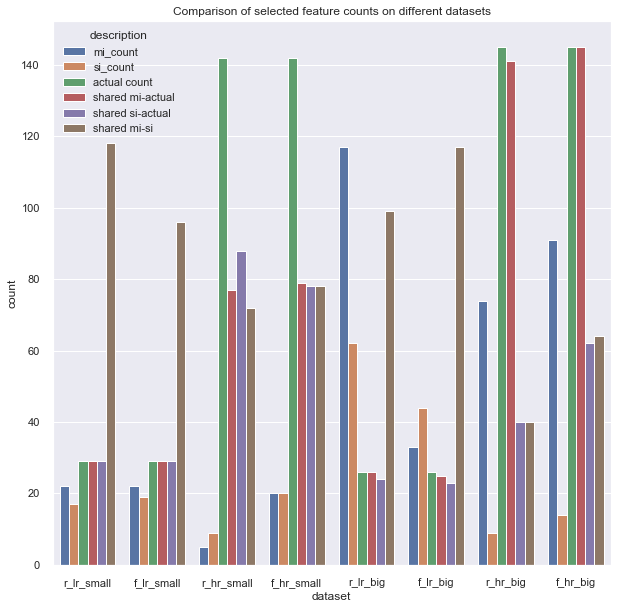

In [556]:
plt.figure(figsize=[10,10])
sns.barplot(x='dataset', y='count', hue='description', data=feature_selection_data_df)
plt.title("Comparison of selected feature counts on different datasets")
plt.savefig('feature counts comparison-mean-actual-soft')                          

In [39]:
def find_lambda(data):
    data[np.isnan(data)] = 0
    sv = np.linalg.svd(data)[1]
    return sv.max()

In [300]:
# soft impute (to know which value of lambda should be chosen)
lambda_prop = [0.01, 0.1, 0.25, 0.5, 0.75]

# scale
biscaler_r_lr_small = [BiScaler() for _ in range(5)]
biscaler_f_lr_small = [BiScaler() for _ in range(5)]
biscaler_r_hr_small = [BiScaler() for _ in range(5)]
biscaler_f_hr_small = [BiScaler() for _ in range(5)]
biscaler_r_lr_big = [BiScaler() for _ in range(5)]
biscaler_f_lr_big = [BiScaler() for _ in range(5)]
biscaler_r_hr_big = [BiScaler() for _ in range(5)]
biscaler_f_hr_big = [BiScaler() for _ in range(5)]

scaled_r_lr_small = [biscaler_r_lr_small[i].fit_transform(miss_r_lr_small[i]) for i in range(5)]
scaled_f_lr_small = [biscaler_f_lr_small[i].fit_transform(miss_f_lr_small[i]) for i in range(5)]

scaled_r_hr_small = [biscaler_r_hr_small[i].fit_transform(miss_r_hr_small[i]) for i in range(5)]
scaled_f_hr_small = [biscaler_f_hr_small[i].fit_transform(miss_f_hr_small[i]) for i in range(5)]

scaled_r_lr_big = [biscaler_r_lr_big[i].fit_transform(miss_r_lr_big[i]) for i in range(5)]
scaled_f_lr_big = [biscaler_f_lr_big[i].fit_transform(miss_f_lr_big[i]) for i in range(5)]

scaled_r_hr_big = [biscaler_r_hr_big[i].fit_transform(miss_r_hr_big[i]) for i in range(5)]
scaled_f_hr_big = [biscaler_f_hr_big[i].fit_transform(miss_f_hr_big[i]) for i in range(5)]

# find max singular value
lambda0_r_lr_small = [find_lambda(deepcopy(scaled_r_lr_small[i])) for i in range(5)]
lambda0_f_lr_small = [find_lambda(deepcopy(scaled_f_lr_small[i])) for i in range(5)]

lambda0_r_hr_small = [find_lambda(deepcopy(scaled_r_hr_small[i])) for i in range(5)]
lambda0_f_hr_small = [find_lambda(deepcopy(scaled_f_hr_small[i])) for i in range(5)]

lambda0_r_lr_big = [find_lambda(deepcopy(scaled_r_lr_big[i])) for i in range(5)]
lambda0_f_lr_big = [find_lambda(deepcopy(scaled_f_lr_big[i])) for i in range(5)]

lambda0_r_hr_big = [find_lambda(deepcopy(scaled_r_hr_big[i])) for i in range(5)]
lambda0_f_hr_big = [find_lambda(deepcopy(scaled_f_hr_big[i])) for i in range(5)]

# Perform Soft impute
si_r_small_lr = [[] for _ in range (5)]
for i, lamb in enumerate(lambda_prop):
    for cl in range(5):
        softimputer = SoftImpute(shrinkage_value=lamb * lambda0_r_lr_small[cl])
        si_r_small_lr[i].append(softimputer.fit_transform(scaled_r_lr_small[cl]))

        
si_f_small_lr = [[] for _ in range (5)]
for i, lamb in enumerate(lambda_prop):
    for cl in range(5):
        softimputer = SoftImpute(shrinkage_value=lamb * lambda0_f_lr_small[cl])
        si_f_small_lr[i].append(softimputer.fit_transform(scaled_f_lr_small[cl]))
        
si_r_small_hr = [[] for _ in range (5)]        
for i, lamb in enumerate(lambda_prop):
    for cl in range(5):
        softimputer = SoftImpute(shrinkage_value=lamb * lambda0_r_hr_small[cl])
        si_r_small_hr[i].append(softimputer.fit_transform(scaled_r_hr_small[cl]))
        
si_f_small_hr = [[] for _ in range (5)]
for i, lamb in enumerate(lambda_prop):
    for cl in range(5):
        softimputer = SoftImpute(shrinkage_value=lamb * lambda0_f_hr_small[cl])
        si_f_small_hr[i].append(softimputer.fit_transform(scaled_f_hr_small[cl]))
        
si_r_big_lr = [[] for _ in range (5)]
for i, lamb in enumerate(lambda_prop):
    for cl in range(5):
        softimputer = SoftImpute(shrinkage_value=lamb * lambda0_r_lr_big[cl])
        si_r_big_lr[i].append(softimputer.fit_transform(scaled_r_lr_big[cl]))
        
si_f_big_lr = [[] for _ in range (5)]
for i, lamb in enumerate(lambda_prop):
    for cl in range(5):
        softimputer = SoftImpute(shrinkage_value=lamb * lambda0_f_lr_big[cl])
        si_f_big_lr[i].append(softimputer.fit_transform(scaled_f_lr_big[cl]))

si_r_big_hr = [[] for _ in range (5)]
for i, lamb in enumerate(lambda_prop):
    for cl in range(5):
        softimputer = SoftImpute(shrinkage_value=lamb * lambda0_r_hr_big[cl])
        si_r_big_hr[i].append(softimputer.fit_transform(scaled_r_hr_big[cl]))
        
si_f_big_hr = [[] for _ in range (5)]
for i, lamb in enumerate(lambda_prop):
    for cl in range(5):
        softimputer = SoftImpute(shrinkage_value=lamb * lambda0_f_hr_big[cl])
        si_f_big_hr[i].append(softimputer.fit_transform(scaled_f_hr_big[cl]))


[BiScaler] Initial log residual value = 10.465245
[BiScaler] Iter 1: log residual = -0.819656, log improvement ratio=11.284901
[BiScaler] Iter 2: log residual = -4.097733, log improvement ratio=3.278077
[BiScaler] Iter 3: log residual = -7.281647, log improvement ratio=3.183915
[BiScaler] Iter 4: log residual = -10.268029, log improvement ratio=2.986382
[BiScaler] Iter 5: log residual = -13.206078, log improvement ratio=2.938049
[BiScaler] Iter 6: log residual = -16.126227, log improvement ratio=2.920150
[BiScaler] Iter 7: log residual = -19.038618, log improvement ratio=2.912391
[BiScaler] Iter 8: log residual = -21.947806, log improvement ratio=2.909188
[BiScaler] Iter 9: log residual = -24.855978, log improvement ratio=2.908172
[BiScaler] Iter 10: log residual = -27.764005, log improvement ratio=2.908028
[BiScaler] Iter 11: log residual = -30.672173, log improvement ratio=2.908168
[BiScaler] Iter 12: log residual = -33.580532, log improvement ratio=2.908359
[BiScaler] Iter 13: log r

[BiScaler] Iter 14: log residual = -43.157973, log improvement ratio=3.128093
[BiScaler] Iter 15: log residual = -46.283800, log improvement ratio=3.125827
[BiScaler] Iter 16: log residual = -49.407434, log improvement ratio=3.123634
[BiScaler] Iter 17: log residual = -52.528138, log improvement ratio=3.120704
[BiScaler] Iter 18: log residual = -55.583916, log improvement ratio=3.055777
[BiScaler] Iter 19: log residual = -57.804979, log improvement ratio=2.221063
[BiScaler] Iter 20: log residual = -57.859112, log improvement ratio=0.054133
[BiScaler] Iter 21: log residual = -58.315021, log improvement ratio=0.455909
[BiScaler] Iter 22: log residual = -57.949494, log improvement ratio=-0.365527
[BiScaler] Initial log residual value = 10.442546
[BiScaler] Iter 1: log residual = -1.661958, log improvement ratio=12.104504
[BiScaler] Iter 2: log residual = -6.004814, log improvement ratio=4.342856
[BiScaler] Iter 3: log residual = -10.030870, log improvement ratio=4.026057
[BiScaler] Iter 4

[BiScaler] Initial log residual value = 10.390315
[BiScaler] Iter 1: log residual = -1.942017, log improvement ratio=12.332332
[BiScaler] Iter 2: log residual = -5.567100, log improvement ratio=3.625083
[BiScaler] Iter 3: log residual = -9.220998, log improvement ratio=3.653897
[BiScaler] Iter 4: log residual = -12.822226, log improvement ratio=3.601229
[BiScaler] Iter 5: log residual = -16.423050, log improvement ratio=3.600823
[BiScaler] Iter 6: log residual = -20.027193, log improvement ratio=3.604143
[BiScaler] Iter 7: log residual = -23.633251, log improvement ratio=3.606059
[BiScaler] Iter 8: log residual = -27.241522, log improvement ratio=3.608270
[BiScaler] Iter 9: log residual = -30.851888, log improvement ratio=3.610366
[BiScaler] Iter 10: log residual = -34.463989, log improvement ratio=3.612101
[BiScaler] Iter 11: log residual = -38.077449, log improvement ratio=3.613460
[BiScaler] Iter 12: log residual = -41.691948, log improvement ratio=3.614499
[BiScaler] Iter 13: log r

[BiScaler] Iter 14: log residual = -60.961050, log improvement ratio=1.862091
[BiScaler] Iter 15: log residual = -61.398702, log improvement ratio=0.437653
[BiScaler] Iter 16: log residual = -61.301865, log improvement ratio=-0.096837
[BiScaler] Initial log residual value = 10.372562
[BiScaler] Iter 1: log residual = -3.877555, log improvement ratio=14.250118
[BiScaler] Iter 2: log residual = -8.877655, log improvement ratio=5.000099
[BiScaler] Iter 3: log residual = -13.752968, log improvement ratio=4.875313
[BiScaler] Iter 4: log residual = -18.510019, log improvement ratio=4.757051
[BiScaler] Iter 5: log residual = -23.271463, log improvement ratio=4.761444
[BiScaler] Iter 6: log residual = -28.039344, log improvement ratio=4.767882
[BiScaler] Iter 7: log residual = -32.805783, log improvement ratio=4.766439
[BiScaler] Iter 8: log residual = -37.569004, log improvement ratio=4.763221
[BiScaler] Iter 9: log residual = -42.329309, log improvement ratio=4.760305
[BiScaler] Iter 10: log

[BiScaler] Iter 16: log residual = -45.876630, log improvement ratio=3.040898
[BiScaler] Iter 17: log residual = -48.917212, log improvement ratio=3.040582
[BiScaler] Iter 18: log residual = -51.954560, log improvement ratio=3.037348
[BiScaler] Iter 19: log residual = -54.922460, log improvement ratio=2.967900
[BiScaler] Iter 20: log residual = -57.253007, log improvement ratio=2.330547
[BiScaler] Iter 21: log residual = -57.780821, log improvement ratio=0.527814
[BiScaler] Iter 22: log residual = -57.726190, log improvement ratio=-0.054631
[BiScaler] Initial log residual value = 11.831501
[BiScaler] Iter 1: log residual = 0.513051, log improvement ratio=11.318449
[BiScaler] Iter 2: log residual = -2.820071, log improvement ratio=3.333122
[BiScaler] Iter 3: log residual = -6.024256, log improvement ratio=3.204185
[BiScaler] Iter 4: log residual = -9.138997, log improvement ratio=3.114741
[BiScaler] Iter 5: log residual = -12.221513, log improvement ratio=3.082516
[BiScaler] Iter 6: log

[BiScaler] Iter 10: log residual = -30.120699, log improvement ratio=3.262248
[BiScaler] Iter 11: log residual = -33.376757, log improvement ratio=3.256058
[BiScaler] Iter 12: log residual = -36.628551, log improvement ratio=3.251794
[BiScaler] Iter 13: log residual = -39.877417, log improvement ratio=3.248866
[BiScaler] Iter 14: log residual = -43.124283, log improvement ratio=3.246866
[BiScaler] Iter 15: log residual = -46.369648, log improvement ratio=3.245365
[BiScaler] Iter 16: log residual = -49.614469, log improvement ratio=3.244822
[BiScaler] Iter 17: log residual = -52.854699, log improvement ratio=3.240230
[BiScaler] Iter 18: log residual = -55.905487, log improvement ratio=3.050788
[BiScaler] Iter 19: log residual = -57.863602, log improvement ratio=1.958115
[BiScaler] Iter 20: log residual = -57.738215, log improvement ratio=-0.125386
[BiScaler] Initial log residual value = 11.789902
[BiScaler] Iter 1: log residual = -0.643214, log improvement ratio=12.433115
[BiScaler] Ite

[BiScaler] Iter 9: log residual = -29.439516, log improvement ratio=3.668497
[BiScaler] Iter 10: log residual = -33.107984, log improvement ratio=3.668468
[BiScaler] Iter 11: log residual = -36.776431, log improvement ratio=3.668447
[BiScaler] Iter 12: log residual = -40.444868, log improvement ratio=3.668436
[BiScaler] Iter 13: log residual = -44.113287, log improvement ratio=3.668419
[BiScaler] Iter 14: log residual = -47.781708, log improvement ratio=3.668422
[BiScaler] Iter 15: log residual = -51.450167, log improvement ratio=3.668458
[BiScaler] Iter 16: log residual = -55.116955, log improvement ratio=3.666788
[BiScaler] Iter 17: log residual = -58.641725, log improvement ratio=3.524770
[BiScaler] Iter 18: log residual = -60.488997, log improvement ratio=1.847272
[BiScaler] Iter 19: log residual = -60.279483, log improvement ratio=-0.209514
[BiScaler] Initial log residual value = 11.821446
[BiScaler] Iter 1: log residual = -0.040001, log improvement ratio=11.861447
[BiScaler] Iter

[BiScaler] Iter 14: log residual = -60.652833, log improvement ratio=-0.127383
[BiScaler] Initial log residual value = 11.770373
[BiScaler] Iter 1: log residual = -2.137335, log improvement ratio=13.907708
[BiScaler] Iter 2: log residual = -7.069459, log improvement ratio=4.932124
[BiScaler] Iter 3: log residual = -11.977656, log improvement ratio=4.908197
[BiScaler] Iter 4: log residual = -16.857048, log improvement ratio=4.879392
[BiScaler] Iter 5: log residual = -21.736579, log improvement ratio=4.879532
[BiScaler] Iter 6: log residual = -26.615719, log improvement ratio=4.879140
[BiScaler] Iter 7: log residual = -31.494542, log improvement ratio=4.878823
[BiScaler] Iter 8: log residual = -36.373170, log improvement ratio=4.878627
[BiScaler] Iter 9: log residual = -41.251679, log improvement ratio=4.878509
[BiScaler] Iter 10: log residual = -46.130128, log improvement ratio=4.878449
[BiScaler] Iter 11: log residual = -51.007813, log improvement ratio=4.877685
[BiScaler] Iter 12: log

[SoftImpute] Iter 90: observed MAE=0.021171 rank=145
[SoftImpute] Iter 91: observed MAE=0.021152 rank=144
[SoftImpute] Iter 92: observed MAE=0.021139 rank=143
[SoftImpute] Iter 93: observed MAE=0.021129 rank=143
[SoftImpute] Iter 94: observed MAE=0.021113 rank=142
[SoftImpute] Iter 95: observed MAE=0.021107 rank=142
[SoftImpute] Iter 96: observed MAE=0.021105 rank=142
[SoftImpute] Iter 97: observed MAE=0.021103 rank=141
[SoftImpute] Iter 98: observed MAE=0.021093 rank=141
[SoftImpute] Iter 99: observed MAE=0.021089 rank=141
[SoftImpute] Iter 100: observed MAE=0.021089 rank=141
[SoftImpute] Stopped after iteration 100 for lambda=0.364124
[SoftImpute] Max Singular Value of X_init = 36.518097
[SoftImpute] Iter 1: observed MAE=0.022003 rank=199
[SoftImpute] Iter 2: observed MAE=0.022023 rank=199
[SoftImpute] Iter 3: observed MAE=0.022042 rank=199
[SoftImpute] Iter 4: observed MAE=0.022060 rank=199
[SoftImpute] Iter 5: observed MAE=0.022078 rank=199
[SoftImpute] Iter 6: observed MAE=0.02209

[SoftImpute] Iter 43: observed MAE=0.022031 rank=178
[SoftImpute] Iter 44: observed MAE=0.022019 rank=178
[SoftImpute] Iter 45: observed MAE=0.022003 rank=177
[SoftImpute] Iter 46: observed MAE=0.021992 rank=176
[SoftImpute] Iter 47: observed MAE=0.021963 rank=174
[SoftImpute] Iter 48: observed MAE=0.021941 rank=174
[SoftImpute] Iter 49: observed MAE=0.021916 rank=172
[SoftImpute] Iter 50: observed MAE=0.021895 rank=172
[SoftImpute] Iter 51: observed MAE=0.021890 rank=171
[SoftImpute] Iter 52: observed MAE=0.021857 rank=169
[SoftImpute] Iter 53: observed MAE=0.021825 rank=168
[SoftImpute] Iter 54: observed MAE=0.021804 rank=168
[SoftImpute] Iter 55: observed MAE=0.021802 rank=168
[SoftImpute] Iter 56: observed MAE=0.021789 rank=167
[SoftImpute] Iter 57: observed MAE=0.021777 rank=166
[SoftImpute] Iter 58: observed MAE=0.021750 rank=164
[SoftImpute] Iter 59: observed MAE=0.021726 rank=164
[SoftImpute] Iter 60: observed MAE=0.021722 rank=164
[SoftImpute] Iter 61: observed MAE=0.021712 ra

[SoftImpute] Iter 96: observed MAE=0.021463 rank=140
[SoftImpute] Iter 97: observed MAE=0.021455 rank=140
[SoftImpute] Iter 98: observed MAE=0.021452 rank=140
[SoftImpute] Iter 99: observed MAE=0.021451 rank=140
[SoftImpute] Iter 100: observed MAE=0.021451 rank=140
[SoftImpute] Stopped after iteration 100 for lambda=0.368888
[SoftImpute] Max Singular Value of X_init = 36.835211
[SoftImpute] Iter 1: observed MAE=0.022104 rank=199
[SoftImpute] Iter 2: observed MAE=0.022125 rank=199
[SoftImpute] Iter 3: observed MAE=0.022145 rank=199
[SoftImpute] Iter 4: observed MAE=0.022164 rank=199
[SoftImpute] Iter 5: observed MAE=0.022183 rank=199
[SoftImpute] Iter 6: observed MAE=0.022203 rank=199
[SoftImpute] Iter 7: observed MAE=0.022222 rank=199
[SoftImpute] Iter 8: observed MAE=0.022242 rank=199
[SoftImpute] Iter 9: observed MAE=0.022262 rank=199
[SoftImpute] Iter 10: observed MAE=0.022282 rank=199
[SoftImpute] Iter 11: observed MAE=0.022302 rank=199
[SoftImpute] Iter 12: observed MAE=0.022323 r

[SoftImpute] Iter 49: observed MAE=0.152240 rank=24
[SoftImpute] Iter 50: observed MAE=0.152119 rank=24
[SoftImpute] Iter 51: observed MAE=0.152013 rank=24
[SoftImpute] Stopped after iteration 51 for lambda=3.641237
[SoftImpute] Max Singular Value of X_init = 36.518097
[SoftImpute] Iter 1: observed MAE=0.220032 rank=199
[SoftImpute] Iter 2: observed MAE=0.220004 rank=184
[SoftImpute] Iter 3: observed MAE=0.215983 rank=165
[SoftImpute] Iter 4: observed MAE=0.211370 rank=149
[SoftImpute] Iter 5: observed MAE=0.207416 rank=138
[SoftImpute] Iter 6: observed MAE=0.203883 rank=127
[SoftImpute] Iter 7: observed MAE=0.200974 rank=119
[SoftImpute] Iter 8: observed MAE=0.198495 rank=112
[SoftImpute] Iter 9: observed MAE=0.196207 rank=105
[SoftImpute] Iter 10: observed MAE=0.194217 rank=100
[SoftImpute] Iter 11: observed MAE=0.192243 rank=94
[SoftImpute] Iter 12: observed MAE=0.190256 rank=88
[SoftImpute] Iter 13: observed MAE=0.188300 rank=83
[SoftImpute] Iter 14: observed MAE=0.186472 rank=79
[

[SoftImpute] Iter 49: observed MAE=0.153385 rank=22
[SoftImpute] Stopped after iteration 49 for lambda=3.688876
[SoftImpute] Max Singular Value of X_init = 36.835211
[SoftImpute] Iter 1: observed MAE=0.221042 rank=199
[SoftImpute] Iter 2: observed MAE=0.221361 rank=183
[SoftImpute] Iter 3: observed MAE=0.216963 rank=164
[SoftImpute] Iter 4: observed MAE=0.212086 rank=148
[SoftImpute] Iter 5: observed MAE=0.207843 rank=136
[SoftImpute] Iter 6: observed MAE=0.204385 rank=127
[SoftImpute] Iter 7: observed MAE=0.201331 rank=117
[SoftImpute] Iter 8: observed MAE=0.198601 rank=110
[SoftImpute] Iter 9: observed MAE=0.196348 rank=103
[SoftImpute] Iter 10: observed MAE=0.194031 rank=97
[SoftImpute] Iter 11: observed MAE=0.191932 rank=91
[SoftImpute] Iter 12: observed MAE=0.190018 rank=87
[SoftImpute] Iter 13: observed MAE=0.188021 rank=81
[SoftImpute] Iter 14: observed MAE=0.186084 rank=77
[SoftImpute] Iter 15: observed MAE=0.184242 rank=73
[SoftImpute] Iter 16: observed MAE=0.182344 rank=69
[S

[SoftImpute] Iter 4: observed MAE=0.414463 rank=44
[SoftImpute] Iter 5: observed MAE=0.394843 rank=34
[SoftImpute] Iter 6: observed MAE=0.377407 rank=25
[SoftImpute] Iter 7: observed MAE=0.362535 rank=19
[SoftImpute] Iter 8: observed MAE=0.350379 rank=16
[SoftImpute] Iter 9: observed MAE=0.341071 rank=15
[SoftImpute] Iter 10: observed MAE=0.334302 rank=15
[SoftImpute] Iter 11: observed MAE=0.329501 rank=15
[SoftImpute] Iter 12: observed MAE=0.326057 rank=15
[SoftImpute] Iter 13: observed MAE=0.323563 rank=15
[SoftImpute] Iter 14: observed MAE=0.321740 rank=15
[SoftImpute] Iter 15: observed MAE=0.320310 rank=14
[SoftImpute] Iter 16: observed MAE=0.319215 rank=14
[SoftImpute] Iter 17: observed MAE=0.318397 rank=14
[SoftImpute] Iter 18: observed MAE=0.317784 rank=14
[SoftImpute] Iter 19: observed MAE=0.317320 rank=14
[SoftImpute] Iter 20: observed MAE=0.316970 rank=14
[SoftImpute] Iter 21: observed MAE=0.316703 rank=14
[SoftImpute] Iter 22: observed MAE=0.316500 rank=14
[SoftImpute] Iter 

[SoftImpute] Iter 2: observed MAE=0.759249 rank=7
[SoftImpute] Iter 3: observed MAE=0.744461 rank=7
[SoftImpute] Iter 4: observed MAE=0.734936 rank=7
[SoftImpute] Iter 5: observed MAE=0.728764 rank=7
[SoftImpute] Iter 6: observed MAE=0.724738 rank=7
[SoftImpute] Iter 7: observed MAE=0.722098 rank=7
[SoftImpute] Iter 8: observed MAE=0.720360 rank=7
[SoftImpute] Iter 9: observed MAE=0.719214 rank=7
[SoftImpute] Iter 10: observed MAE=0.718456 rank=7
[SoftImpute] Iter 11: observed MAE=0.717955 rank=7
[SoftImpute] Iter 12: observed MAE=0.717622 rank=7
[SoftImpute] Iter 13: observed MAE=0.717401 rank=7
[SoftImpute] Iter 14: observed MAE=0.717254 rank=7
[SoftImpute] Iter 15: observed MAE=0.717157 rank=7
[SoftImpute] Iter 16: observed MAE=0.717092 rank=7
[SoftImpute] Stopped after iteration 16 for lambda=27.341125
[SoftImpute] Max Singular Value of X_init = 36.888763
[SoftImpute] Iter 1: observed MAE=0.783886 rank=7
[SoftImpute] Iter 2: observed MAE=0.761565 rank=7
[SoftImpute] Iter 3: observe

[SoftImpute] Iter 5: observed MAE=0.033794 rank=156
[SoftImpute] Iter 6: observed MAE=0.033809 rank=156
[SoftImpute] Iter 7: observed MAE=0.033821 rank=155
[SoftImpute] Iter 8: observed MAE=0.033831 rank=155
[SoftImpute] Iter 9: observed MAE=0.033837 rank=154
[SoftImpute] Iter 10: observed MAE=0.033840 rank=154
[SoftImpute] Iter 11: observed MAE=0.033838 rank=154
[SoftImpute] Iter 12: observed MAE=0.033827 rank=153
[SoftImpute] Iter 13: observed MAE=0.033810 rank=153
[SoftImpute] Iter 14: observed MAE=0.033794 rank=153
[SoftImpute] Iter 15: observed MAE=0.033770 rank=151
[SoftImpute] Iter 16: observed MAE=0.033740 rank=149
[SoftImpute] Iter 17: observed MAE=0.033712 rank=147
[SoftImpute] Iter 18: observed MAE=0.033688 rank=147
[SoftImpute] Iter 19: observed MAE=0.033669 rank=146
[SoftImpute] Iter 20: observed MAE=0.033641 rank=145
[SoftImpute] Iter 21: observed MAE=0.033617 rank=143
[SoftImpute] Iter 22: observed MAE=0.033592 rank=142
[SoftImpute] Iter 23: observed MAE=0.033569 rank=14

[SoftImpute] Iter 58: observed MAE=0.032627 rank=117
[SoftImpute] Iter 59: observed MAE=0.032618 rank=116
[SoftImpute] Iter 60: observed MAE=0.032608 rank=115
[SoftImpute] Iter 61: observed MAE=0.032598 rank=115
[SoftImpute] Iter 62: observed MAE=0.032589 rank=115
[SoftImpute] Iter 63: observed MAE=0.032581 rank=115
[SoftImpute] Iter 64: observed MAE=0.032574 rank=115
[SoftImpute] Iter 65: observed MAE=0.032566 rank=114
[SoftImpute] Iter 66: observed MAE=0.032558 rank=114
[SoftImpute] Iter 67: observed MAE=0.032550 rank=114
[SoftImpute] Iter 68: observed MAE=0.032542 rank=113
[SoftImpute] Iter 69: observed MAE=0.032533 rank=113
[SoftImpute] Iter 70: observed MAE=0.032525 rank=113
[SoftImpute] Iter 71: observed MAE=0.032516 rank=112
[SoftImpute] Iter 72: observed MAE=0.032507 rank=112
[SoftImpute] Iter 73: observed MAE=0.032498 rank=112
[SoftImpute] Iter 74: observed MAE=0.032488 rank=111
[SoftImpute] Iter 75: observed MAE=0.032479 rank=111
[SoftImpute] Iter 76: observed MAE=0.032469 ra

[SoftImpute] Iter 9: observed MAE=0.034633 rank=153
[SoftImpute] Iter 10: observed MAE=0.034635 rank=153
[SoftImpute] Iter 11: observed MAE=0.034630 rank=152
[SoftImpute] Iter 12: observed MAE=0.034619 rank=151
[SoftImpute] Iter 13: observed MAE=0.034601 rank=150
[SoftImpute] Iter 14: observed MAE=0.034584 rank=150
[SoftImpute] Iter 15: observed MAE=0.034559 rank=148
[SoftImpute] Iter 16: observed MAE=0.034527 rank=147
[SoftImpute] Iter 17: observed MAE=0.034495 rank=146
[SoftImpute] Iter 18: observed MAE=0.034468 rank=145
[SoftImpute] Iter 19: observed MAE=0.034445 rank=144
[SoftImpute] Iter 20: observed MAE=0.034421 rank=143
[SoftImpute] Iter 21: observed MAE=0.034399 rank=141
[SoftImpute] Iter 22: observed MAE=0.034379 rank=140
[SoftImpute] Iter 23: observed MAE=0.034362 rank=139
[SoftImpute] Iter 24: observed MAE=0.034345 rank=138
[SoftImpute] Iter 25: observed MAE=0.034324 rank=136
[SoftImpute] Iter 26: observed MAE=0.034306 rank=136
[SoftImpute] Iter 27: observed MAE=0.034290 ran

[SoftImpute] Iter 13: observed MAE=0.159819 rank=18
[SoftImpute] Iter 14: observed MAE=0.159450 rank=18
[SoftImpute] Iter 15: observed MAE=0.159169 rank=18
[SoftImpute] Iter 16: observed MAE=0.158955 rank=18
[SoftImpute] Iter 17: observed MAE=0.158791 rank=18
[SoftImpute] Iter 18: observed MAE=0.158664 rank=18
[SoftImpute] Iter 19: observed MAE=0.158567 rank=18
[SoftImpute] Iter 20: observed MAE=0.158492 rank=18
[SoftImpute] Iter 21: observed MAE=0.158433 rank=18
[SoftImpute] Iter 22: observed MAE=0.158388 rank=18
[SoftImpute] Iter 23: observed MAE=0.158353 rank=18
[SoftImpute] Stopped after iteration 23 for lambda=8.911902
[SoftImpute] Max Singular Value of X_init = 87.549498
[SoftImpute] Iter 1: observed MAE=0.212362 rank=62
[SoftImpute] Iter 2: observed MAE=0.200721 rank=42
[SoftImpute] Iter 3: observed MAE=0.192659 rank=30
[SoftImpute] Iter 4: observed MAE=0.185791 rank=23
[SoftImpute] Iter 5: observed MAE=0.179708 rank=18
[SoftImpute] Iter 6: observed MAE=0.174934 rank=18
[SoftImp

[SoftImpute] Iter 5: observed MAE=0.557814 rank=9
[SoftImpute] Iter 6: observed MAE=0.557657 rank=9
[SoftImpute] Iter 7: observed MAE=0.557594 rank=9
[SoftImpute] Iter 8: observed MAE=0.557569 rank=9
[SoftImpute] Iter 9: observed MAE=0.557558 rank=9
[SoftImpute] Stopped after iteration 9 for lambda=44.953445
[SoftImpute] Max Singular Value of X_init = 89.119023
[SoftImpute] Iter 1: observed MAE=0.564813 rank=9
[SoftImpute] Iter 2: observed MAE=0.557806 rank=9
[SoftImpute] Iter 3: observed MAE=0.555126 rank=9
[SoftImpute] Iter 4: observed MAE=0.554090 rank=9
[SoftImpute] Iter 5: observed MAE=0.553681 rank=9
[SoftImpute] Iter 6: observed MAE=0.553517 rank=9
[SoftImpute] Iter 7: observed MAE=0.553451 rank=9
[SoftImpute] Iter 8: observed MAE=0.553424 rank=9
[SoftImpute] Iter 9: observed MAE=0.553412 rank=9
[SoftImpute] Stopped after iteration 9 for lambda=44.559512
[SoftImpute] Max Singular Value of X_init = 87.549498
[SoftImpute] Iter 1: observed MAE=0.572788 rank=9
[SoftImpute] Iter 2: o

[SoftImpute] Iter 81: observed MAE=0.012709 rank=192
[SoftImpute] Iter 82: observed MAE=0.012703 rank=191
[SoftImpute] Iter 83: observed MAE=0.012692 rank=191
[SoftImpute] Iter 84: observed MAE=0.012690 rank=191
[SoftImpute] Iter 85: observed MAE=0.012691 rank=191
[SoftImpute] Iter 86: observed MAE=0.012692 rank=191
[SoftImpute] Iter 87: observed MAE=0.012693 rank=191
[SoftImpute] Iter 88: observed MAE=0.012695 rank=191
[SoftImpute] Iter 89: observed MAE=0.012696 rank=191
[SoftImpute] Iter 90: observed MAE=0.012698 rank=191
[SoftImpute] Iter 91: observed MAE=0.012693 rank=190
[SoftImpute] Iter 92: observed MAE=0.012678 rank=189
[SoftImpute] Iter 93: observed MAE=0.012673 rank=189
[SoftImpute] Iter 94: observed MAE=0.012672 rank=189
[SoftImpute] Iter 95: observed MAE=0.012669 rank=188
[SoftImpute] Iter 96: observed MAE=0.012656 rank=187
[SoftImpute] Iter 97: observed MAE=0.012648 rank=187
[SoftImpute] Iter 98: observed MAE=0.012643 rank=186
[SoftImpute] Iter 99: observed MAE=0.012635 ra

[SoftImpute] Iter 34: observed MAE=0.012777 rank=199
[SoftImpute] Iter 35: observed MAE=0.012781 rank=199
[SoftImpute] Iter 36: observed MAE=0.012784 rank=199
[SoftImpute] Iter 37: observed MAE=0.012787 rank=199
[SoftImpute] Iter 38: observed MAE=0.012791 rank=199
[SoftImpute] Iter 39: observed MAE=0.012794 rank=199
[SoftImpute] Iter 40: observed MAE=0.012797 rank=199
[SoftImpute] Iter 41: observed MAE=0.012800 rank=199
[SoftImpute] Iter 42: observed MAE=0.012803 rank=199
[SoftImpute] Iter 43: observed MAE=0.012806 rank=199
[SoftImpute] Iter 44: observed MAE=0.012810 rank=199
[SoftImpute] Iter 45: observed MAE=0.012813 rank=199
[SoftImpute] Iter 46: observed MAE=0.012816 rank=199
[SoftImpute] Iter 47: observed MAE=0.012819 rank=199
[SoftImpute] Iter 48: observed MAE=0.012822 rank=199
[SoftImpute] Iter 49: observed MAE=0.012824 rank=199
[SoftImpute] Iter 50: observed MAE=0.012827 rank=199
[SoftImpute] Iter 51: observed MAE=0.012830 rank=199
[SoftImpute] Iter 52: observed MAE=0.012833 ra

[SoftImpute] Iter 87: observed MAE=0.013152 rank=188
[SoftImpute] Iter 88: observed MAE=0.013144 rank=187
[SoftImpute] Iter 89: observed MAE=0.013139 rank=187
[SoftImpute] Iter 90: observed MAE=0.013139 rank=187
[SoftImpute] Iter 91: observed MAE=0.013140 rank=187
[SoftImpute] Iter 92: observed MAE=0.013141 rank=187
[SoftImpute] Iter 93: observed MAE=0.013131 rank=186
[SoftImpute] Iter 94: observed MAE=0.013129 rank=186
[SoftImpute] Iter 95: observed MAE=0.013129 rank=186
[SoftImpute] Iter 96: observed MAE=0.013119 rank=185
[SoftImpute] Iter 97: observed MAE=0.013116 rank=184
[SoftImpute] Iter 98: observed MAE=0.013104 rank=183
[SoftImpute] Iter 99: observed MAE=0.013090 rank=183
[SoftImpute] Iter 100: observed MAE=0.013087 rank=183
[SoftImpute] Stopped after iteration 100 for lambda=0.208743
[SoftImpute] Max Singular Value of X_init = 19.977810
[SoftImpute] Iter 1: observed MAE=0.012597 rank=199
[SoftImpute] Iter 2: observed MAE=0.012603 rank=199
[SoftImpute] Iter 3: observed MAE=0.01

[SoftImpute] Iter 39: observed MAE=0.120006 rank=135
[SoftImpute] Iter 40: observed MAE=0.119987 rank=135
[SoftImpute] Iter 41: observed MAE=0.119957 rank=134
[SoftImpute] Iter 42: observed MAE=0.119910 rank=133
[SoftImpute] Iter 43: observed MAE=0.119876 rank=133
[SoftImpute] Iter 44: observed MAE=0.119855 rank=133
[SoftImpute] Iter 45: observed MAE=0.119812 rank=131
[SoftImpute] Iter 46: observed MAE=0.119769 rank=131
[SoftImpute] Iter 47: observed MAE=0.119744 rank=131
[SoftImpute] Iter 48: observed MAE=0.119725 rank=130
[SoftImpute] Iter 49: observed MAE=0.119691 rank=130
[SoftImpute] Iter 50: observed MAE=0.119671 rank=130
[SoftImpute] Iter 51: observed MAE=0.119657 rank=130
[SoftImpute] Iter 52: observed MAE=0.119646 rank=130
[SoftImpute] Iter 53: observed MAE=0.119636 rank=130
[SoftImpute] Iter 54: observed MAE=0.119613 rank=129
[SoftImpute] Iter 55: observed MAE=0.119597 rank=129
[SoftImpute] Iter 56: observed MAE=0.119586 rank=129
[SoftImpute] Iter 57: observed MAE=0.119567 ra

[SoftImpute] Iter 93: observed MAE=0.120100 rank=122
[SoftImpute] Iter 94: observed MAE=0.120097 rank=122
[SoftImpute] Iter 95: observed MAE=0.120095 rank=122
[SoftImpute] Iter 96: observed MAE=0.120092 rank=122
[SoftImpute] Iter 97: observed MAE=0.120090 rank=122
[SoftImpute] Iter 98: observed MAE=0.120087 rank=122
[SoftImpute] Iter 99: observed MAE=0.120085 rank=122
[SoftImpute] Iter 100: observed MAE=0.120083 rank=122
[SoftImpute] Stopped after iteration 100 for lambda=2.027973
[SoftImpute] Max Singular Value of X_init = 19.870750
[SoftImpute] Iter 1: observed MAE=0.126481 rank=199
[SoftImpute] Iter 2: observed MAE=0.126918 rank=199
[SoftImpute] Iter 3: observed MAE=0.127329 rank=199
[SoftImpute] Iter 4: observed MAE=0.127700 rank=198
[SoftImpute] Iter 5: observed MAE=0.127634 rank=194
[SoftImpute] Iter 6: observed MAE=0.127225 rank=189
[SoftImpute] Iter 7: observed MAE=0.126571 rank=184
[SoftImpute] Iter 8: observed MAE=0.125957 rank=180
[SoftImpute] Iter 9: observed MAE=0.125528 r

[SoftImpute] Iter 44: observed MAE=0.124254 rank=130
[SoftImpute] Iter 45: observed MAE=0.124224 rank=130
[SoftImpute] Iter 46: observed MAE=0.124202 rank=130
[SoftImpute] Iter 47: observed MAE=0.124166 rank=129
[SoftImpute] Iter 48: observed MAE=0.124126 rank=128
[SoftImpute] Iter 49: observed MAE=0.124095 rank=128
[SoftImpute] Iter 50: observed MAE=0.124074 rank=128
[SoftImpute] Iter 51: observed MAE=0.124058 rank=128
[SoftImpute] Iter 52: observed MAE=0.124044 rank=128
[SoftImpute] Iter 53: observed MAE=0.124032 rank=128
[SoftImpute] Iter 54: observed MAE=0.124022 rank=128
[SoftImpute] Iter 55: observed MAE=0.124006 rank=127
[SoftImpute] Iter 56: observed MAE=0.123982 rank=126
[SoftImpute] Iter 57: observed MAE=0.123955 rank=126
[SoftImpute] Iter 58: observed MAE=0.123938 rank=126
[SoftImpute] Iter 59: observed MAE=0.123926 rank=126
[SoftImpute] Iter 60: observed MAE=0.123916 rank=126
[SoftImpute] Iter 61: observed MAE=0.123899 rank=125
[SoftImpute] Iter 62: observed MAE=0.123883 ra

[SoftImpute] Iter 97: observed MAE=0.119379 rank=120
[SoftImpute] Iter 98: observed MAE=0.119373 rank=120
[SoftImpute] Iter 99: observed MAE=0.119369 rank=120
[SoftImpute] Iter 100: observed MAE=0.119366 rank=120
[SoftImpute] Stopped after iteration 100 for lambda=2.015539
[SoftImpute] Max Singular Value of X_init = 19.812937
[SoftImpute] Iter 1: observed MAE=0.313824 rank=196
[SoftImpute] Iter 2: observed MAE=0.311133 rank=174
[SoftImpute] Iter 3: observed MAE=0.305856 rank=160
[SoftImpute] Iter 4: observed MAE=0.301632 rank=149
[SoftImpute] Iter 5: observed MAE=0.298533 rank=142
[SoftImpute] Iter 6: observed MAE=0.296454 rank=136
[SoftImpute] Iter 7: observed MAE=0.294779 rank=132
[SoftImpute] Iter 8: observed MAE=0.293519 rank=127
[SoftImpute] Iter 9: observed MAE=0.292589 rank=125
[SoftImpute] Iter 10: observed MAE=0.291844 rank=121
[SoftImpute] Iter 11: observed MAE=0.291160 rank=119
[SoftImpute] Iter 12: observed MAE=0.290713 rank=118
[SoftImpute] Iter 13: observed MAE=0.290264 r

[SoftImpute] Iter 28: observed MAE=0.289300 rank=105
[SoftImpute] Iter 29: observed MAE=0.289251 rank=104
[SoftImpute] Iter 30: observed MAE=0.289213 rank=104
[SoftImpute] Iter 31: observed MAE=0.289186 rank=104
[SoftImpute] Iter 32: observed MAE=0.289165 rank=104
[SoftImpute] Iter 33: observed MAE=0.289142 rank=103
[SoftImpute] Iter 34: observed MAE=0.289116 rank=103
[SoftImpute] Iter 35: observed MAE=0.289098 rank=103
[SoftImpute] Iter 36: observed MAE=0.289083 rank=103
[SoftImpute] Iter 37: observed MAE=0.289066 rank=102
[SoftImpute] Iter 38: observed MAE=0.289049 rank=102
[SoftImpute] Iter 39: observed MAE=0.289036 rank=102
[SoftImpute] Iter 40: observed MAE=0.289026 rank=102
[SoftImpute] Iter 41: observed MAE=0.289017 rank=102
[SoftImpute] Iter 42: observed MAE=0.289009 rank=102
[SoftImpute] Iter 43: observed MAE=0.289002 rank=102
[SoftImpute] Iter 44: observed MAE=0.288991 rank=101
[SoftImpute] Iter 45: observed MAE=0.288979 rank=101
[SoftImpute] Iter 46: observed MAE=0.288971 ra

[SoftImpute] Iter 1: observed MAE=0.588325 rank=122
[SoftImpute] Iter 2: observed MAE=0.561587 rank=102
[SoftImpute] Iter 3: observed MAE=0.550055 rank=91
[SoftImpute] Iter 4: observed MAE=0.544153 rank=85
[SoftImpute] Iter 5: observed MAE=0.540941 rank=82
[SoftImpute] Iter 6: observed MAE=0.538960 rank=78
[SoftImpute] Iter 7: observed MAE=0.537689 rank=76
[SoftImpute] Iter 8: observed MAE=0.536813 rank=74
[SoftImpute] Iter 9: observed MAE=0.536210 rank=73
[SoftImpute] Iter 10: observed MAE=0.535797 rank=72
[SoftImpute] Iter 11: observed MAE=0.535485 rank=71
[SoftImpute] Iter 12: observed MAE=0.535293 rank=71
[SoftImpute] Iter 13: observed MAE=0.535170 rank=71
[SoftImpute] Iter 14: observed MAE=0.535043 rank=69
[SoftImpute] Iter 15: observed MAE=0.534928 rank=68
[SoftImpute] Iter 16: observed MAE=0.534845 rank=68
[SoftImpute] Iter 17: observed MAE=0.534790 rank=68
[SoftImpute] Iter 18: observed MAE=0.534751 rank=68
[SoftImpute] Iter 19: observed MAE=0.534723 rank=68
[SoftImpute] Iter 2

[SoftImpute] Iter 2: observed MAE=0.738097 rank=42
[SoftImpute] Iter 3: observed MAE=0.730034 rank=39
[SoftImpute] Iter 4: observed MAE=0.725992 rank=37
[SoftImpute] Iter 5: observed MAE=0.723843 rank=36
[SoftImpute] Iter 6: observed MAE=0.722719 rank=35
[SoftImpute] Iter 7: observed MAE=0.722016 rank=33
[SoftImpute] Iter 8: observed MAE=0.721587 rank=33
[SoftImpute] Iter 9: observed MAE=0.721350 rank=33
[SoftImpute] Iter 10: observed MAE=0.721217 rank=33
[SoftImpute] Iter 11: observed MAE=0.721140 rank=33
[SoftImpute] Iter 12: observed MAE=0.721080 rank=32
[SoftImpute] Iter 13: observed MAE=0.721043 rank=32
[SoftImpute] Iter 14: observed MAE=0.721021 rank=32
[SoftImpute] Iter 15: observed MAE=0.721007 rank=32
[SoftImpute] Iter 16: observed MAE=0.720998 rank=32
[SoftImpute] Iter 17: observed MAE=0.720992 rank=32
[SoftImpute] Iter 18: observed MAE=0.720989 rank=32
[SoftImpute] Iter 19: observed MAE=0.720986 rank=32
[SoftImpute] Stopped after iteration 19 for lambda=15.061700
[SoftImpute

[SoftImpute] Iter 56: observed MAE=0.015203 rank=188
[SoftImpute] Iter 57: observed MAE=0.015203 rank=188
[SoftImpute] Iter 58: observed MAE=0.015203 rank=188
[SoftImpute] Iter 59: observed MAE=0.015196 rank=186
[SoftImpute] Iter 60: observed MAE=0.015187 rank=186
[SoftImpute] Iter 61: observed MAE=0.015184 rank=186
[SoftImpute] Iter 62: observed MAE=0.015184 rank=186
[SoftImpute] Iter 63: observed MAE=0.015178 rank=185
[SoftImpute] Iter 64: observed MAE=0.015171 rank=184
[SoftImpute] Iter 65: observed MAE=0.015165 rank=183
[SoftImpute] Iter 66: observed MAE=0.015158 rank=183
[SoftImpute] Iter 67: observed MAE=0.015155 rank=183
[SoftImpute] Iter 68: observed MAE=0.015153 rank=182
[SoftImpute] Iter 69: observed MAE=0.015147 rank=182
[SoftImpute] Iter 70: observed MAE=0.015145 rank=182
[SoftImpute] Iter 71: observed MAE=0.015145 rank=182
[SoftImpute] Iter 72: observed MAE=0.015145 rank=182
[SoftImpute] Iter 73: observed MAE=0.015146 rank=182
[SoftImpute] Iter 74: observed MAE=0.015140 ra

[SoftImpute] Iter 9: observed MAE=0.015084 rank=199
[SoftImpute] Iter 10: observed MAE=0.015090 rank=199
[SoftImpute] Iter 11: observed MAE=0.015097 rank=199
[SoftImpute] Iter 12: observed MAE=0.015103 rank=199
[SoftImpute] Iter 13: observed MAE=0.015108 rank=199
[SoftImpute] Iter 14: observed MAE=0.015114 rank=199
[SoftImpute] Iter 15: observed MAE=0.015120 rank=199
[SoftImpute] Iter 16: observed MAE=0.015125 rank=199
[SoftImpute] Iter 17: observed MAE=0.015130 rank=199
[SoftImpute] Iter 18: observed MAE=0.015135 rank=199
[SoftImpute] Iter 19: observed MAE=0.015140 rank=199
[SoftImpute] Iter 20: observed MAE=0.015145 rank=199
[SoftImpute] Iter 21: observed MAE=0.015149 rank=199
[SoftImpute] Iter 22: observed MAE=0.015154 rank=199
[SoftImpute] Iter 23: observed MAE=0.015158 rank=199
[SoftImpute] Iter 24: observed MAE=0.015163 rank=199
[SoftImpute] Iter 25: observed MAE=0.015167 rank=199
[SoftImpute] Iter 26: observed MAE=0.015171 rank=199
[SoftImpute] Iter 27: observed MAE=0.015175 ran

[SoftImpute] Iter 64: observed MAE=0.014763 rank=186
[SoftImpute] Iter 65: observed MAE=0.014761 rank=185
[SoftImpute] Iter 66: observed MAE=0.014756 rank=185
[SoftImpute] Iter 67: observed MAE=0.014755 rank=185
[SoftImpute] Iter 68: observed MAE=0.014755 rank=185
[SoftImpute] Iter 69: observed MAE=0.014755 rank=184
[SoftImpute] Iter 70: observed MAE=0.014749 rank=184
[SoftImpute] Iter 71: observed MAE=0.014748 rank=184
[SoftImpute] Iter 72: observed MAE=0.014743 rank=183
[SoftImpute] Iter 73: observed MAE=0.014739 rank=183
[SoftImpute] Iter 74: observed MAE=0.014738 rank=183
[SoftImpute] Iter 75: observed MAE=0.014738 rank=183
[SoftImpute] Iter 76: observed MAE=0.014738 rank=183
[SoftImpute] Iter 77: observed MAE=0.014737 rank=182
[SoftImpute] Iter 78: observed MAE=0.014732 rank=182
[SoftImpute] Iter 79: observed MAE=0.014730 rank=182
[SoftImpute] Iter 80: observed MAE=0.014730 rank=182
[SoftImpute] Iter 81: observed MAE=0.014727 rank=181
[SoftImpute] Iter 82: observed MAE=0.014723 ra

[SoftImpute] Iter 17: observed MAE=0.146866 rank=144
[SoftImpute] Iter 18: observed MAE=0.146827 rank=144
[SoftImpute] Iter 19: observed MAE=0.146786 rank=143
[SoftImpute] Iter 20: observed MAE=0.146759 rank=143
[SoftImpute] Iter 21: observed MAE=0.146726 rank=142
[SoftImpute] Iter 22: observed MAE=0.146670 rank=140
[SoftImpute] Iter 23: observed MAE=0.146636 rank=140
[SoftImpute] Iter 24: observed MAE=0.146615 rank=140
[SoftImpute] Iter 25: observed MAE=0.146602 rank=140
[SoftImpute] Iter 26: observed MAE=0.146582 rank=139
[SoftImpute] Iter 27: observed MAE=0.146566 rank=139
[SoftImpute] Iter 28: observed MAE=0.146551 rank=138
[SoftImpute] Iter 29: observed MAE=0.146534 rank=138
[SoftImpute] Iter 30: observed MAE=0.146512 rank=137
[SoftImpute] Iter 31: observed MAE=0.146499 rank=137
[SoftImpute] Iter 32: observed MAE=0.146490 rank=137
[SoftImpute] Iter 33: observed MAE=0.146484 rank=137
[SoftImpute] Iter 34: observed MAE=0.146479 rank=137
[SoftImpute] Iter 35: observed MAE=0.146475 ra

[SoftImpute] Iter 41: observed MAE=0.145842 rank=138
[SoftImpute] Iter 42: observed MAE=0.145834 rank=138
[SoftImpute] Iter 43: observed MAE=0.145829 rank=138
[SoftImpute] Iter 44: observed MAE=0.145826 rank=138
[SoftImpute] Iter 45: observed MAE=0.145823 rank=138
[SoftImpute] Iter 46: observed MAE=0.145822 rank=138
[SoftImpute] Iter 47: observed MAE=0.145820 rank=138
[SoftImpute] Iter 48: observed MAE=0.145819 rank=138
[SoftImpute] Iter 49: observed MAE=0.145818 rank=138
[SoftImpute] Iter 50: observed MAE=0.145817 rank=138
[SoftImpute] Iter 51: observed MAE=0.145816 rank=138
[SoftImpute] Iter 52: observed MAE=0.145815 rank=138
[SoftImpute] Iter 53: observed MAE=0.145814 rank=138
[SoftImpute] Iter 54: observed MAE=0.145814 rank=138
[SoftImpute] Iter 55: observed MAE=0.145813 rank=138
[SoftImpute] Iter 56: observed MAE=0.145813 rank=138
[SoftImpute] Iter 57: observed MAE=0.145812 rank=138
[SoftImpute] Iter 58: observed MAE=0.145812 rank=138
[SoftImpute] Iter 59: observed MAE=0.145811 ra

[SoftImpute] Iter 58: observed MAE=0.142817 rank=139
[SoftImpute] Iter 59: observed MAE=0.142816 rank=139
[SoftImpute] Iter 60: observed MAE=0.142815 rank=139
[SoftImpute] Iter 61: observed MAE=0.142815 rank=139
[SoftImpute] Iter 62: observed MAE=0.142814 rank=139
[SoftImpute] Iter 63: observed MAE=0.142813 rank=139
[SoftImpute] Iter 64: observed MAE=0.142813 rank=139
[SoftImpute] Iter 65: observed MAE=0.142813 rank=139
[SoftImpute] Iter 66: observed MAE=0.142812 rank=139
[SoftImpute] Stopped after iteration 66 for lambda=3.514129
[SoftImpute] Max Singular Value of X_init = 35.565764
[SoftImpute] Iter 1: observed MAE=0.363533 rank=136
[SoftImpute] Iter 2: observed MAE=0.355007 rank=122
[SoftImpute] Iter 3: observed MAE=0.351297 rank=116
[SoftImpute] Iter 4: observed MAE=0.349596 rank=112
[SoftImpute] Iter 5: observed MAE=0.348656 rank=110
[SoftImpute] Iter 6: observed MAE=0.348137 rank=109
[SoftImpute] Iter 7: observed MAE=0.347886 rank=108
[SoftImpute] Iter 8: observed MAE=0.347713 ra

[SoftImpute] Iter 5: observed MAE=0.609016 rank=68
[SoftImpute] Iter 6: observed MAE=0.608954 rank=68
[SoftImpute] Iter 7: observed MAE=0.608930 rank=68
[SoftImpute] Iter 8: observed MAE=0.608920 rank=68
[SoftImpute] Iter 9: observed MAE=0.608915 rank=68
[SoftImpute] Stopped after iteration 9 for lambda=17.858180
[SoftImpute] Max Singular Value of X_init = 34.354580
[SoftImpute] Iter 1: observed MAE=0.607109 rank=71
[SoftImpute] Iter 2: observed MAE=0.602158 rank=71
[SoftImpute] Iter 3: observed MAE=0.600643 rank=70
[SoftImpute] Iter 4: observed MAE=0.600131 rank=70
[SoftImpute] Iter 5: observed MAE=0.599945 rank=70
[SoftImpute] Iter 6: observed MAE=0.599874 rank=70
[SoftImpute] Iter 7: observed MAE=0.599845 rank=70
[SoftImpute] Iter 8: observed MAE=0.599833 rank=70
[SoftImpute] Iter 9: observed MAE=0.599828 rank=70
[SoftImpute] Stopped after iteration 9 for lambda=17.377386
[SoftImpute] Max Singular Value of X_init = 34.905116
[SoftImpute] Iter 1: observed MAE=0.607902 rank=72
[SoftIm

[SoftImpute] Iter 88: observed MAE=0.022557 rank=199
[SoftImpute] Iter 89: observed MAE=0.022560 rank=199
[SoftImpute] Iter 90: observed MAE=0.022563 rank=199
[SoftImpute] Iter 91: observed MAE=0.022566 rank=199
[SoftImpute] Iter 92: observed MAE=0.022568 rank=199
[SoftImpute] Iter 93: observed MAE=0.022571 rank=199
[SoftImpute] Iter 94: observed MAE=0.022573 rank=199
[SoftImpute] Iter 95: observed MAE=0.022576 rank=199
[SoftImpute] Iter 96: observed MAE=0.022578 rank=199
[SoftImpute] Iter 97: observed MAE=0.022581 rank=199
[SoftImpute] Iter 98: observed MAE=0.022584 rank=199
[SoftImpute] Iter 99: observed MAE=0.022586 rank=199
[SoftImpute] Iter 100: observed MAE=0.022588 rank=199
[SoftImpute] Stopped after iteration 100 for lambda=1.131828
[SoftImpute] Max Singular Value of X_init = 114.848967
[SoftImpute] Iter 1: observed MAE=0.022536 rank=199
[SoftImpute] Iter 2: observed MAE=0.022543 rank=199
[SoftImpute] Iter 3: observed MAE=0.022548 rank=199
[SoftImpute] Iter 4: observed MAE=0.02

[SoftImpute] Iter 39: observed MAE=0.022649 rank=199
[SoftImpute] Iter 40: observed MAE=0.022653 rank=199
[SoftImpute] Iter 41: observed MAE=0.022657 rank=199
[SoftImpute] Iter 42: observed MAE=0.022661 rank=199
[SoftImpute] Iter 43: observed MAE=0.022665 rank=199
[SoftImpute] Iter 44: observed MAE=0.022669 rank=199
[SoftImpute] Iter 45: observed MAE=0.022673 rank=199
[SoftImpute] Iter 46: observed MAE=0.022677 rank=199
[SoftImpute] Iter 47: observed MAE=0.022681 rank=199
[SoftImpute] Iter 48: observed MAE=0.022685 rank=199
[SoftImpute] Iter 49: observed MAE=0.022688 rank=199
[SoftImpute] Iter 50: observed MAE=0.022692 rank=199
[SoftImpute] Iter 51: observed MAE=0.022696 rank=199
[SoftImpute] Iter 52: observed MAE=0.022700 rank=199
[SoftImpute] Iter 53: observed MAE=0.022704 rank=199
[SoftImpute] Iter 54: observed MAE=0.022707 rank=199
[SoftImpute] Iter 55: observed MAE=0.022711 rank=199
[SoftImpute] Iter 56: observed MAE=0.022715 rank=199
[SoftImpute] Iter 57: observed MAE=0.022719 ra

[SoftImpute] Iter 92: observed MAE=0.022716 rank=199
[SoftImpute] Iter 93: observed MAE=0.022719 rank=199
[SoftImpute] Iter 94: observed MAE=0.022721 rank=199
[SoftImpute] Iter 95: observed MAE=0.022724 rank=199
[SoftImpute] Iter 96: observed MAE=0.022726 rank=199
[SoftImpute] Iter 97: observed MAE=0.022729 rank=199
[SoftImpute] Iter 98: observed MAE=0.022731 rank=199
[SoftImpute] Iter 99: observed MAE=0.022734 rank=199
[SoftImpute] Iter 100: observed MAE=0.022736 rank=199
[SoftImpute] Stopped after iteration 100 for lambda=1.139228
[SoftImpute] Max Singular Value of X_init = 114.185435
[SoftImpute] Iter 1: observed MAE=0.022403 rank=199
[SoftImpute] Iter 2: observed MAE=0.022409 rank=199
[SoftImpute] Iter 3: observed MAE=0.022414 rank=199
[SoftImpute] Iter 4: observed MAE=0.022419 rank=199
[SoftImpute] Iter 5: observed MAE=0.022424 rank=199
[SoftImpute] Iter 6: observed MAE=0.022429 rank=199
[SoftImpute] Iter 7: observed MAE=0.022433 rank=199
[SoftImpute] Iter 8: observed MAE=0.022438

[SoftImpute] Iter 5: observed MAE=0.227138 rank=199
[SoftImpute] Iter 6: observed MAE=0.227522 rank=199
[SoftImpute] Iter 7: observed MAE=0.227227 rank=191
[SoftImpute] Iter 8: observed MAE=0.225259 rank=175
[SoftImpute] Iter 9: observed MAE=0.222433 rank=158
[SoftImpute] Iter 10: observed MAE=0.219071 rank=141
[SoftImpute] Iter 11: observed MAE=0.215028 rank=123
[SoftImpute] Iter 12: observed MAE=0.210361 rank=104
[SoftImpute] Iter 13: observed MAE=0.205125 rank=86
[SoftImpute] Iter 14: observed MAE=0.199250 rank=72
[SoftImpute] Iter 15: observed MAE=0.192938 rank=57
[SoftImpute] Iter 16: observed MAE=0.186270 rank=43
[SoftImpute] Iter 17: observed MAE=0.179757 rank=34
[SoftImpute] Iter 18: observed MAE=0.173780 rank=27
[SoftImpute] Iter 19: observed MAE=0.168653 rank=24
[SoftImpute] Iter 20: observed MAE=0.164477 rank=22
[SoftImpute] Iter 21: observed MAE=0.161087 rank=20
[SoftImpute] Iter 22: observed MAE=0.158408 rank=19
[SoftImpute] Iter 23: observed MAE=0.156245 rank=19
[SoftImpu

[SoftImpute] Iter 13: observed MAE=0.316331 rank=15
[SoftImpute] Iter 14: observed MAE=0.314837 rank=15
[SoftImpute] Iter 15: observed MAE=0.313732 rank=15
[SoftImpute] Iter 16: observed MAE=0.312910 rank=15
[SoftImpute] Iter 17: observed MAE=0.312296 rank=15
[SoftImpute] Iter 18: observed MAE=0.311836 rank=15
[SoftImpute] Iter 19: observed MAE=0.311490 rank=15
[SoftImpute] Iter 20: observed MAE=0.311228 rank=15
[SoftImpute] Iter 21: observed MAE=0.311030 rank=15
[SoftImpute] Iter 22: observed MAE=0.310880 rank=15
[SoftImpute] Stopped after iteration 22 for lambda=28.295709
[SoftImpute] Max Singular Value of X_init = 114.848967
[SoftImpute] Iter 1: observed MAE=0.561529 rank=173
[SoftImpute] Iter 2: observed MAE=0.519976 rank=81
[SoftImpute] Iter 3: observed MAE=0.467615 rank=30
[SoftImpute] Iter 4: observed MAE=0.419806 rank=17
[SoftImpute] Iter 5: observed MAE=0.387163 rank=16
[SoftImpute] Iter 6: observed MAE=0.365329 rank=15
[SoftImpute] Iter 7: observed MAE=0.350208 rank=15
[SoftI

[SoftImpute] Iter 15: observed MAE=0.539906 rank=10
[SoftImpute] Iter 16: observed MAE=0.539660 rank=10
[SoftImpute] Iter 17: observed MAE=0.539489 rank=10
[SoftImpute] Stopped after iteration 17 for lambda=57.248362
[SoftImpute] Max Singular Value of X_init = 113.922764
[SoftImpute] Iter 1: observed MAE=0.716899 rank=11
[SoftImpute] Iter 2: observed MAE=0.654348 rank=11
[SoftImpute] Iter 3: observed MAE=0.614847 rank=11
[SoftImpute] Iter 4: observed MAE=0.589480 rank=11
[SoftImpute] Iter 5: observed MAE=0.572682 rank=10
[SoftImpute] Iter 6: observed MAE=0.561473 rank=10
[SoftImpute] Iter 7: observed MAE=0.553969 rank=10
[SoftImpute] Iter 8: observed MAE=0.548907 rank=10
[SoftImpute] Iter 9: observed MAE=0.545470 rank=10
[SoftImpute] Iter 10: observed MAE=0.543127 rank=10
[SoftImpute] Iter 11: observed MAE=0.541521 rank=10
[SoftImpute] Iter 12: observed MAE=0.540418 rank=10
[SoftImpute] Iter 13: observed MAE=0.539658 rank=10
[SoftImpute] Iter 14: observed MAE=0.539133 rank=10
[SoftImpu

[SoftImpute] Iter 23: observed MAE=0.034939 rank=172
[SoftImpute] Iter 24: observed MAE=0.034949 rank=172
[SoftImpute] Iter 25: observed MAE=0.034959 rank=172
[SoftImpute] Iter 26: observed MAE=0.034969 rank=172
[SoftImpute] Iter 27: observed MAE=0.034978 rank=172
[SoftImpute] Iter 28: observed MAE=0.034988 rank=172
[SoftImpute] Iter 29: observed MAE=0.034997 rank=172
[SoftImpute] Iter 30: observed MAE=0.035005 rank=172
[SoftImpute] Iter 31: observed MAE=0.035013 rank=172
[SoftImpute] Iter 32: observed MAE=0.035021 rank=172
[SoftImpute] Iter 33: observed MAE=0.035029 rank=172
[SoftImpute] Iter 34: observed MAE=0.035037 rank=172
[SoftImpute] Iter 35: observed MAE=0.035044 rank=172
[SoftImpute] Iter 36: observed MAE=0.035050 rank=172
[SoftImpute] Iter 37: observed MAE=0.035057 rank=172
[SoftImpute] Iter 38: observed MAE=0.035063 rank=172
[SoftImpute] Iter 39: observed MAE=0.035069 rank=172
[SoftImpute] Iter 40: observed MAE=0.035074 rank=172
[SoftImpute] Iter 41: observed MAE=0.035080 ra

[SoftImpute] Iter 76: observed MAE=0.035752 rank=133
[SoftImpute] Iter 77: observed MAE=0.035714 rank=132
[SoftImpute] Iter 78: observed MAE=0.035668 rank=129
[SoftImpute] Iter 79: observed MAE=0.035623 rank=128
[SoftImpute] Iter 80: observed MAE=0.035577 rank=126
[SoftImpute] Iter 81: observed MAE=0.035529 rank=124
[SoftImpute] Iter 82: observed MAE=0.035480 rank=122
[SoftImpute] Iter 83: observed MAE=0.035429 rank=120
[SoftImpute] Iter 84: observed MAE=0.035379 rank=118
[SoftImpute] Iter 85: observed MAE=0.035329 rank=116
[SoftImpute] Iter 86: observed MAE=0.035277 rank=115
[SoftImpute] Iter 87: observed MAE=0.035231 rank=114
[SoftImpute] Iter 88: observed MAE=0.035181 rank=111
[SoftImpute] Iter 89: observed MAE=0.035129 rank=110
[SoftImpute] Iter 90: observed MAE=0.035082 rank=109
[SoftImpute] Iter 91: observed MAE=0.035039 rank=109
[SoftImpute] Iter 92: observed MAE=0.035000 rank=108
[SoftImpute] Iter 93: observed MAE=0.034960 rank=105
[SoftImpute] Iter 94: observed MAE=0.034918 ra

[SoftImpute] Iter 27: observed MAE=0.036120 rank=169
[SoftImpute] Iter 28: observed MAE=0.036129 rank=169
[SoftImpute] Iter 29: observed MAE=0.036138 rank=169
[SoftImpute] Iter 30: observed MAE=0.036146 rank=169
[SoftImpute] Iter 31: observed MAE=0.036154 rank=169
[SoftImpute] Iter 32: observed MAE=0.036162 rank=168
[SoftImpute] Iter 33: observed MAE=0.036169 rank=168
[SoftImpute] Iter 34: observed MAE=0.036176 rank=168
[SoftImpute] Iter 35: observed MAE=0.036183 rank=168
[SoftImpute] Iter 36: observed MAE=0.036190 rank=168
[SoftImpute] Iter 37: observed MAE=0.036196 rank=168
[SoftImpute] Iter 38: observed MAE=0.036202 rank=168
[SoftImpute] Iter 39: observed MAE=0.036207 rank=168
[SoftImpute] Iter 40: observed MAE=0.036212 rank=168
[SoftImpute] Iter 41: observed MAE=0.036217 rank=168
[SoftImpute] Iter 42: observed MAE=0.036222 rank=168
[SoftImpute] Iter 43: observed MAE=0.036226 rank=168
[SoftImpute] Iter 44: observed MAE=0.036230 rank=168
[SoftImpute] Iter 45: observed MAE=0.036231 ra

[SoftImpute] Iter 80: observed MAE=0.035412 rank=139
[SoftImpute] Iter 81: observed MAE=0.035378 rank=137
[SoftImpute] Iter 82: observed MAE=0.035343 rank=136
[SoftImpute] Iter 83: observed MAE=0.035305 rank=134
[SoftImpute] Iter 84: observed MAE=0.035269 rank=133
[SoftImpute] Iter 85: observed MAE=0.035231 rank=131
[SoftImpute] Iter 86: observed MAE=0.035189 rank=128
[SoftImpute] Iter 87: observed MAE=0.035146 rank=127
[SoftImpute] Iter 88: observed MAE=0.035106 rank=126
[SoftImpute] Iter 89: observed MAE=0.035064 rank=125
[SoftImpute] Iter 90: observed MAE=0.035026 rank=124
[SoftImpute] Iter 91: observed MAE=0.034984 rank=122
[SoftImpute] Iter 92: observed MAE=0.034937 rank=119
[SoftImpute] Iter 93: observed MAE=0.034893 rank=119
[SoftImpute] Iter 94: observed MAE=0.034849 rank=116
[SoftImpute] Iter 95: observed MAE=0.034802 rank=114
[SoftImpute] Iter 96: observed MAE=0.034757 rank=113
[SoftImpute] Iter 97: observed MAE=0.034714 rank=112
[SoftImpute] Iter 98: observed MAE=0.034674 ra

[SoftImpute] Iter 4: observed MAE=0.347922 rank=13
[SoftImpute] Iter 5: observed MAE=0.344801 rank=13
[SoftImpute] Iter 6: observed MAE=0.342914 rank=13
[SoftImpute] Iter 7: observed MAE=0.341764 rank=13
[SoftImpute] Iter 8: observed MAE=0.341057 rank=13
[SoftImpute] Iter 9: observed MAE=0.340620 rank=13
[SoftImpute] Iter 10: observed MAE=0.340349 rank=13
[SoftImpute] Iter 11: observed MAE=0.340180 rank=13
[SoftImpute] Iter 12: observed MAE=0.340074 rank=13
[SoftImpute] Iter 13: observed MAE=0.340008 rank=13
[SoftImpute] Iter 14: observed MAE=0.339966 rank=13
[SoftImpute] Stopped after iteration 14 for lambda=70.535141
[SoftImpute] Max Singular Value of X_init = 279.897487
[SoftImpute] Iter 1: observed MAE=0.365433 rank=13
[SoftImpute] Iter 2: observed MAE=0.351777 rank=13
[SoftImpute] Iter 3: observed MAE=0.343594 rank=13
[SoftImpute] Iter 4: observed MAE=0.338723 rank=13
[SoftImpute] Iter 5: observed MAE=0.335800 rank=13
[SoftImpute] Iter 6: observed MAE=0.334028 rank=13
[SoftImpute]

[SoftImpute] Iter 3: observed MAE=0.011328 rank=199
[SoftImpute] Iter 4: observed MAE=0.011328 rank=199
[SoftImpute] Iter 5: observed MAE=0.011329 rank=199
[SoftImpute] Iter 6: observed MAE=0.011329 rank=199
[SoftImpute] Iter 7: observed MAE=0.011330 rank=199
[SoftImpute] Iter 8: observed MAE=0.011330 rank=199
[SoftImpute] Iter 9: observed MAE=0.011331 rank=199
[SoftImpute] Iter 10: observed MAE=0.011331 rank=199
[SoftImpute] Iter 11: observed MAE=0.011332 rank=199
[SoftImpute] Iter 12: observed MAE=0.011332 rank=199
[SoftImpute] Iter 13: observed MAE=0.011333 rank=199
[SoftImpute] Iter 14: observed MAE=0.011333 rank=199
[SoftImpute] Iter 15: observed MAE=0.011333 rank=199
[SoftImpute] Iter 16: observed MAE=0.011334 rank=199
[SoftImpute] Iter 17: observed MAE=0.011334 rank=199
[SoftImpute] Iter 18: observed MAE=0.011335 rank=199
[SoftImpute] Iter 19: observed MAE=0.011335 rank=199
[SoftImpute] Iter 20: observed MAE=0.011336 rank=199
[SoftImpute] Iter 21: observed MAE=0.011336 rank=199


[SoftImpute] Iter 56: observed MAE=0.011110 rank=199
[SoftImpute] Iter 57: observed MAE=0.011111 rank=199
[SoftImpute] Iter 58: observed MAE=0.011111 rank=199
[SoftImpute] Iter 59: observed MAE=0.011111 rank=199
[SoftImpute] Iter 60: observed MAE=0.011112 rank=199
[SoftImpute] Iter 61: observed MAE=0.011112 rank=199
[SoftImpute] Iter 62: observed MAE=0.011112 rank=199
[SoftImpute] Iter 63: observed MAE=0.011112 rank=199
[SoftImpute] Iter 64: observed MAE=0.011113 rank=199
[SoftImpute] Iter 65: observed MAE=0.011113 rank=199
[SoftImpute] Iter 66: observed MAE=0.011113 rank=199
[SoftImpute] Iter 67: observed MAE=0.011113 rank=199
[SoftImpute] Iter 68: observed MAE=0.011114 rank=199
[SoftImpute] Iter 69: observed MAE=0.011114 rank=199
[SoftImpute] Iter 70: observed MAE=0.011114 rank=199
[SoftImpute] Iter 71: observed MAE=0.011114 rank=199
[SoftImpute] Iter 72: observed MAE=0.011115 rank=199
[SoftImpute] Iter 73: observed MAE=0.011115 rank=199
[SoftImpute] Iter 74: observed MAE=0.011115 ra

[SoftImpute] Iter 7: observed MAE=0.011008 rank=199
[SoftImpute] Iter 8: observed MAE=0.011008 rank=199
[SoftImpute] Iter 9: observed MAE=0.011009 rank=199
[SoftImpute] Iter 10: observed MAE=0.011009 rank=199
[SoftImpute] Iter 11: observed MAE=0.011009 rank=199
[SoftImpute] Iter 12: observed MAE=0.011010 rank=199
[SoftImpute] Iter 13: observed MAE=0.011010 rank=199
[SoftImpute] Iter 14: observed MAE=0.011011 rank=199
[SoftImpute] Iter 15: observed MAE=0.011011 rank=199
[SoftImpute] Iter 16: observed MAE=0.011011 rank=199
[SoftImpute] Iter 17: observed MAE=0.011012 rank=199
[SoftImpute] Iter 18: observed MAE=0.011012 rank=199
[SoftImpute] Iter 19: observed MAE=0.011013 rank=199
[SoftImpute] Iter 20: observed MAE=0.011013 rank=199
[SoftImpute] Iter 21: observed MAE=0.011013 rank=199
[SoftImpute] Iter 22: observed MAE=0.011014 rank=199
[SoftImpute] Iter 23: observed MAE=0.011014 rank=199
[SoftImpute] Iter 24: observed MAE=0.011015 rank=199
[SoftImpute] Iter 25: observed MAE=0.011015 rank=

[SoftImpute] Iter 60: observed MAE=0.011241 rank=199
[SoftImpute] Iter 61: observed MAE=0.011241 rank=199
[SoftImpute] Iter 62: observed MAE=0.011241 rank=199
[SoftImpute] Iter 63: observed MAE=0.011241 rank=199
[SoftImpute] Iter 64: observed MAE=0.011242 rank=199
[SoftImpute] Iter 65: observed MAE=0.011242 rank=199
[SoftImpute] Iter 66: observed MAE=0.011242 rank=199
[SoftImpute] Iter 67: observed MAE=0.011242 rank=199
[SoftImpute] Iter 68: observed MAE=0.011243 rank=199
[SoftImpute] Iter 69: observed MAE=0.011243 rank=199
[SoftImpute] Iter 70: observed MAE=0.011243 rank=199
[SoftImpute] Iter 71: observed MAE=0.011244 rank=199
[SoftImpute] Iter 72: observed MAE=0.011244 rank=199
[SoftImpute] Iter 73: observed MAE=0.011244 rank=199
[SoftImpute] Iter 74: observed MAE=0.011244 rank=199
[SoftImpute] Iter 75: observed MAE=0.011245 rank=199
[SoftImpute] Iter 76: observed MAE=0.011245 rank=199
[SoftImpute] Iter 77: observed MAE=0.011245 rank=199
[SoftImpute] Iter 78: observed MAE=0.011245 ra

[SoftImpute] Iter 14: observed MAE=0.111267 rank=199
[SoftImpute] Iter 15: observed MAE=0.111282 rank=199
[SoftImpute] Iter 16: observed MAE=0.111295 rank=199
[SoftImpute] Iter 17: observed MAE=0.111307 rank=199
[SoftImpute] Iter 18: observed MAE=0.111318 rank=199
[SoftImpute] Iter 19: observed MAE=0.111328 rank=199
[SoftImpute] Iter 20: observed MAE=0.111337 rank=199
[SoftImpute] Iter 21: observed MAE=0.111346 rank=199
[SoftImpute] Iter 22: observed MAE=0.111353 rank=199
[SoftImpute] Iter 23: observed MAE=0.111360 rank=199
[SoftImpute] Iter 24: observed MAE=0.111366 rank=199
[SoftImpute] Iter 25: observed MAE=0.111372 rank=199
[SoftImpute] Iter 26: observed MAE=0.111377 rank=199
[SoftImpute] Iter 27: observed MAE=0.111382 rank=199
[SoftImpute] Iter 28: observed MAE=0.111386 rank=199
[SoftImpute] Iter 29: observed MAE=0.111390 rank=199
[SoftImpute] Iter 30: observed MAE=0.111394 rank=199
[SoftImpute] Iter 31: observed MAE=0.111397 rank=199
[SoftImpute] Iter 32: observed MAE=0.111400 ra

[SoftImpute] Iter 69: observed MAE=0.113260 rank=199
[SoftImpute] Iter 70: observed MAE=0.113260 rank=199
[SoftImpute] Iter 71: observed MAE=0.113260 rank=199
[SoftImpute] Iter 72: observed MAE=0.113260 rank=199
[SoftImpute] Iter 73: observed MAE=0.113260 rank=199
[SoftImpute] Iter 74: observed MAE=0.113260 rank=199
[SoftImpute] Iter 75: observed MAE=0.113260 rank=199
[SoftImpute] Iter 76: observed MAE=0.113260 rank=199
[SoftImpute] Iter 77: observed MAE=0.113260 rank=199
[SoftImpute] Iter 78: observed MAE=0.113260 rank=199
[SoftImpute] Iter 79: observed MAE=0.113260 rank=199
[SoftImpute] Iter 80: observed MAE=0.113260 rank=199
[SoftImpute] Iter 81: observed MAE=0.113260 rank=199
[SoftImpute] Iter 82: observed MAE=0.113260 rank=199
[SoftImpute] Iter 83: observed MAE=0.113260 rank=199
[SoftImpute] Iter 84: observed MAE=0.113260 rank=199
[SoftImpute] Iter 85: observed MAE=0.113260 rank=199
[SoftImpute] Iter 86: observed MAE=0.113260 rank=199
[SoftImpute] Iter 87: observed MAE=0.113260 ra

[SoftImpute] Iter 25: observed MAE=0.112667 rank=199
[SoftImpute] Iter 26: observed MAE=0.112673 rank=199
[SoftImpute] Iter 27: observed MAE=0.112677 rank=199
[SoftImpute] Iter 28: observed MAE=0.112682 rank=199
[SoftImpute] Iter 29: observed MAE=0.112686 rank=199
[SoftImpute] Iter 30: observed MAE=0.112689 rank=199
[SoftImpute] Iter 31: observed MAE=0.112693 rank=199
[SoftImpute] Iter 32: observed MAE=0.112696 rank=199
[SoftImpute] Iter 33: observed MAE=0.112698 rank=199
[SoftImpute] Iter 34: observed MAE=0.112701 rank=199
[SoftImpute] Iter 35: observed MAE=0.112703 rank=199
[SoftImpute] Iter 36: observed MAE=0.112706 rank=199
[SoftImpute] Iter 37: observed MAE=0.112708 rank=199
[SoftImpute] Iter 38: observed MAE=0.112709 rank=199
[SoftImpute] Iter 39: observed MAE=0.112711 rank=199
[SoftImpute] Iter 40: observed MAE=0.112713 rank=199
[SoftImpute] Iter 41: observed MAE=0.112714 rank=199
[SoftImpute] Iter 42: observed MAE=0.112715 rank=199
[SoftImpute] Iter 43: observed MAE=0.112716 ra

[SoftImpute] Iter 31: observed MAE=0.278247 rank=190
[SoftImpute] Iter 32: observed MAE=0.278246 rank=190
[SoftImpute] Iter 33: observed MAE=0.278245 rank=190
[SoftImpute] Iter 34: observed MAE=0.278244 rank=190
[SoftImpute] Iter 35: observed MAE=0.278243 rank=190
[SoftImpute] Iter 36: observed MAE=0.278243 rank=190
[SoftImpute] Iter 37: observed MAE=0.278242 rank=190
[SoftImpute] Iter 38: observed MAE=0.278239 rank=189
[SoftImpute] Iter 39: observed MAE=0.278236 rank=189
[SoftImpute] Iter 40: observed MAE=0.278235 rank=189
[SoftImpute] Iter 41: observed MAE=0.278235 rank=189
[SoftImpute] Iter 42: observed MAE=0.278234 rank=189
[SoftImpute] Iter 43: observed MAE=0.278234 rank=189
[SoftImpute] Iter 44: observed MAE=0.278233 rank=189
[SoftImpute] Iter 45: observed MAE=0.278233 rank=189
[SoftImpute] Iter 46: observed MAE=0.278233 rank=189
[SoftImpute] Iter 47: observed MAE=0.278232 rank=188
[SoftImpute] Iter 48: observed MAE=0.278230 rank=188
[SoftImpute] Iter 49: observed MAE=0.278230 ra

[SoftImpute] Iter 34: observed MAE=0.281426 rank=189
[SoftImpute] Iter 35: observed MAE=0.281426 rank=189
[SoftImpute] Iter 36: observed MAE=0.281426 rank=189
[SoftImpute] Iter 37: observed MAE=0.281425 rank=189
[SoftImpute] Iter 38: observed MAE=0.281424 rank=188
[SoftImpute] Iter 39: observed MAE=0.281420 rank=187
[SoftImpute] Iter 40: observed MAE=0.281416 rank=187
[SoftImpute] Iter 41: observed MAE=0.281415 rank=187
[SoftImpute] Iter 42: observed MAE=0.281414 rank=187
[SoftImpute] Iter 43: observed MAE=0.281414 rank=187
[SoftImpute] Iter 44: observed MAE=0.281413 rank=187
[SoftImpute] Iter 45: observed MAE=0.281413 rank=187
[SoftImpute] Iter 46: observed MAE=0.281413 rank=187
[SoftImpute] Iter 47: observed MAE=0.281413 rank=187
[SoftImpute] Iter 48: observed MAE=0.281413 rank=187
[SoftImpute] Stopped after iteration 48 for lambda=13.670124
[SoftImpute] Max Singular Value of X_init = 54.700478
[SoftImpute] Iter 1: observed MAE=0.566338 rank=199
[SoftImpute] Iter 2: observed MAE=0.56

[SoftImpute] Iter 2: observed MAE=0.769599 rank=57
[SoftImpute] Iter 3: observed MAE=0.765173 rank=54
[SoftImpute] Iter 4: observed MAE=0.762964 rank=50
[SoftImpute] Iter 5: observed MAE=0.761747 rank=49
[SoftImpute] Iter 6: observed MAE=0.761094 rank=47
[SoftImpute] Iter 7: observed MAE=0.760734 rank=47
[SoftImpute] Iter 8: observed MAE=0.760528 rank=45
[SoftImpute] Iter 9: observed MAE=0.760404 rank=45
[SoftImpute] Iter 10: observed MAE=0.760337 rank=45
[SoftImpute] Iter 11: observed MAE=0.760300 rank=45
[SoftImpute] Iter 12: observed MAE=0.760280 rank=45
[SoftImpute] Iter 13: observed MAE=0.760268 rank=45
[SoftImpute] Iter 14: observed MAE=0.760261 rank=45
[SoftImpute] Iter 15: observed MAE=0.760257 rank=45
[SoftImpute] Iter 16: observed MAE=0.760255 rank=45
[SoftImpute] Iter 17: observed MAE=0.760253 rank=45
[SoftImpute] Stopped after iteration 17 for lambda=41.362862
[SoftImpute] Max Singular Value of X_init = 53.304306
[SoftImpute] Iter 1: observed MAE=0.772631 rank=73
[SoftImput

[SoftImpute] Iter 62: observed MAE=0.014393 rank=199
[SoftImpute] Iter 63: observed MAE=0.014394 rank=199
[SoftImpute] Iter 64: observed MAE=0.014394 rank=199
[SoftImpute] Iter 65: observed MAE=0.014394 rank=199
[SoftImpute] Iter 66: observed MAE=0.014394 rank=199
[SoftImpute] Iter 67: observed MAE=0.014395 rank=199
[SoftImpute] Iter 68: observed MAE=0.014395 rank=199
[SoftImpute] Iter 69: observed MAE=0.014395 rank=199
[SoftImpute] Iter 70: observed MAE=0.014396 rank=199
[SoftImpute] Iter 71: observed MAE=0.014396 rank=199
[SoftImpute] Iter 72: observed MAE=0.014396 rank=199
[SoftImpute] Iter 73: observed MAE=0.014396 rank=199
[SoftImpute] Iter 74: observed MAE=0.014396 rank=199
[SoftImpute] Iter 75: observed MAE=0.014397 rank=199
[SoftImpute] Iter 76: observed MAE=0.014397 rank=199
[SoftImpute] Iter 77: observed MAE=0.014397 rank=199
[SoftImpute] Iter 78: observed MAE=0.014397 rank=199
[SoftImpute] Iter 79: observed MAE=0.014398 rank=199
[SoftImpute] Iter 80: observed MAE=0.014398 ra

[SoftImpute] Iter 13: observed MAE=0.014083 rank=199
[SoftImpute] Iter 14: observed MAE=0.014084 rank=199
[SoftImpute] Iter 15: observed MAE=0.014084 rank=199
[SoftImpute] Iter 16: observed MAE=0.014085 rank=199
[SoftImpute] Iter 17: observed MAE=0.014086 rank=199
[SoftImpute] Iter 18: observed MAE=0.014087 rank=199
[SoftImpute] Iter 19: observed MAE=0.014088 rank=199
[SoftImpute] Iter 20: observed MAE=0.014088 rank=199
[SoftImpute] Iter 21: observed MAE=0.014089 rank=199
[SoftImpute] Iter 22: observed MAE=0.014090 rank=199
[SoftImpute] Iter 23: observed MAE=0.014091 rank=199
[SoftImpute] Iter 24: observed MAE=0.014091 rank=199
[SoftImpute] Iter 25: observed MAE=0.014092 rank=199
[SoftImpute] Iter 26: observed MAE=0.014093 rank=199
[SoftImpute] Iter 27: observed MAE=0.014093 rank=199
[SoftImpute] Iter 28: observed MAE=0.014094 rank=199
[SoftImpute] Iter 29: observed MAE=0.014095 rank=199
[SoftImpute] Iter 30: observed MAE=0.014095 rank=199
[SoftImpute] Iter 31: observed MAE=0.014096 ra

[SoftImpute] Iter 66: observed MAE=0.013523 rank=199
[SoftImpute] Iter 67: observed MAE=0.013523 rank=199
[SoftImpute] Iter 68: observed MAE=0.013523 rank=199
[SoftImpute] Iter 69: observed MAE=0.013523 rank=199
[SoftImpute] Iter 70: observed MAE=0.013523 rank=199
[SoftImpute] Iter 71: observed MAE=0.013524 rank=199
[SoftImpute] Iter 72: observed MAE=0.013524 rank=199
[SoftImpute] Iter 73: observed MAE=0.013524 rank=199
[SoftImpute] Iter 74: observed MAE=0.013524 rank=199
[SoftImpute] Iter 75: observed MAE=0.013524 rank=199
[SoftImpute] Iter 76: observed MAE=0.013525 rank=199
[SoftImpute] Iter 77: observed MAE=0.013525 rank=199
[SoftImpute] Iter 78: observed MAE=0.013525 rank=199
[SoftImpute] Iter 79: observed MAE=0.013525 rank=199
[SoftImpute] Iter 80: observed MAE=0.013525 rank=199
[SoftImpute] Iter 81: observed MAE=0.013525 rank=199
[SoftImpute] Iter 82: observed MAE=0.013526 rank=199
[SoftImpute] Iter 83: observed MAE=0.013526 rank=199
[SoftImpute] Iter 84: observed MAE=0.013526 ra

[SoftImpute] Iter 17: observed MAE=0.144045 rank=199
[SoftImpute] Iter 18: observed MAE=0.144048 rank=199
[SoftImpute] Iter 19: observed MAE=0.144051 rank=199
[SoftImpute] Iter 20: observed MAE=0.144054 rank=199
[SoftImpute] Iter 21: observed MAE=0.144056 rank=199
[SoftImpute] Iter 22: observed MAE=0.144053 rank=198
[SoftImpute] Iter 23: observed MAE=0.144041 rank=197
[SoftImpute] Iter 24: observed MAE=0.144028 rank=197
[SoftImpute] Iter 25: observed MAE=0.144027 rank=197
[SoftImpute] Iter 26: observed MAE=0.144027 rank=196
[SoftImpute] Iter 27: observed MAE=0.144016 rank=195
[SoftImpute] Iter 28: observed MAE=0.144005 rank=195
[SoftImpute] Iter 29: observed MAE=0.144003 rank=195
[SoftImpute] Iter 30: observed MAE=0.144003 rank=195
[SoftImpute] Iter 31: observed MAE=0.143999 rank=194
[SoftImpute] Iter 32: observed MAE=0.143994 rank=194
[SoftImpute] Iter 33: observed MAE=0.143987 rank=193
[SoftImpute] Iter 34: observed MAE=0.143985 rank=193
[SoftImpute] Iter 35: observed MAE=0.143984 ra

[SoftImpute] Iter 37: observed MAE=0.141116 rank=194
[SoftImpute] Iter 38: observed MAE=0.141115 rank=194
[SoftImpute] Iter 39: observed MAE=0.141115 rank=194
[SoftImpute] Iter 40: observed MAE=0.141114 rank=193
[SoftImpute] Iter 41: observed MAE=0.141112 rank=193
[SoftImpute] Iter 42: observed MAE=0.141111 rank=193
[SoftImpute] Iter 43: observed MAE=0.141111 rank=193
[SoftImpute] Iter 44: observed MAE=0.141111 rank=193
[SoftImpute] Iter 45: observed MAE=0.141111 rank=193
[SoftImpute] Iter 46: observed MAE=0.141111 rank=193
[SoftImpute] Iter 47: observed MAE=0.141111 rank=193
[SoftImpute] Iter 48: observed MAE=0.141111 rank=193
[SoftImpute] Iter 49: observed MAE=0.141111 rank=192
[SoftImpute] Iter 50: observed MAE=0.141109 rank=192
[SoftImpute] Iter 51: observed MAE=0.141109 rank=192
[SoftImpute] Iter 52: observed MAE=0.141109 rank=192
[SoftImpute] Iter 53: observed MAE=0.141109 rank=192
[SoftImpute] Iter 54: observed MAE=0.141109 rank=192
[SoftImpute] Iter 55: observed MAE=0.141109 ra

[SoftImpute] Iter 61: observed MAE=0.138481 rank=193
[SoftImpute] Iter 62: observed MAE=0.138481 rank=193
[SoftImpute] Iter 63: observed MAE=0.138481 rank=193
[SoftImpute] Stopped after iteration 63 for lambda=10.187156
[SoftImpute] Max Singular Value of X_init = 97.264459
[SoftImpute] Iter 1: observed MAE=0.358753 rank=199
[SoftImpute] Iter 2: observed MAE=0.358406 rank=182
[SoftImpute] Iter 3: observed MAE=0.356672 rank=168
[SoftImpute] Iter 4: observed MAE=0.355619 rank=159
[SoftImpute] Iter 5: observed MAE=0.355018 rank=154
[SoftImpute] Iter 6: observed MAE=0.354621 rank=148
[SoftImpute] Iter 7: observed MAE=0.354361 rank=145
[SoftImpute] Iter 8: observed MAE=0.354192 rank=143
[SoftImpute] Iter 9: observed MAE=0.354106 rank=141
[SoftImpute] Iter 10: observed MAE=0.354048 rank=141
[SoftImpute] Iter 11: observed MAE=0.354024 rank=140
[SoftImpute] Iter 12: observed MAE=0.353992 rank=139
[SoftImpute] Iter 13: observed MAE=0.353974 rank=138
[SoftImpute] Iter 14: observed MAE=0.353951 ra

[SoftImpute] Iter 1: observed MAE=0.588754 rank=92
[SoftImpute] Iter 2: observed MAE=0.586945 rank=92
[SoftImpute] Iter 3: observed MAE=0.586362 rank=92
[SoftImpute] Iter 4: observed MAE=0.586168 rank=92
[SoftImpute] Iter 5: observed MAE=0.586101 rank=92
[SoftImpute] Iter 6: observed MAE=0.586077 rank=92
[SoftImpute] Iter 7: observed MAE=0.586068 rank=92
[SoftImpute] Iter 8: observed MAE=0.586065 rank=92
[SoftImpute] Stopped after iteration 8 for lambda=50.036796
[SoftImpute] Max Singular Value of X_init = 102.378639
[SoftImpute] Iter 1: observed MAE=0.607805 rank=85
[SoftImpute] Iter 2: observed MAE=0.606027 rank=85
[SoftImpute] Iter 3: observed MAE=0.605476 rank=85
[SoftImpute] Iter 4: observed MAE=0.605299 rank=85
[SoftImpute] Iter 5: observed MAE=0.605240 rank=85
[SoftImpute] Iter 6: observed MAE=0.605219 rank=85
[SoftImpute] Iter 7: observed MAE=0.605212 rank=85
[SoftImpute] Iter 8: observed MAE=0.605209 rank=85
[SoftImpute] Stopped after iteration 8 for lambda=51.327918
[SoftImpu

In [301]:
# inverse scaling
rescaled_r_lr_small = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        rescaled_r_lr_small[i].append(biscaler_r_lr_small[i].inverse_transform(si_r_small_lr[i][j]))

rescaled_f_lr_small = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        rescaled_f_lr_small[i].append(biscaler_f_lr_small[i].inverse_transform(si_f_small_lr[i][j]))
        
rescaled_r_hr_small = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        rescaled_r_hr_small[i].append(biscaler_r_hr_small[i].inverse_transform(si_r_small_hr[i][j]))
        
rescaled_f_hr_small = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        rescaled_f_hr_small[i].append(biscaler_f_hr_small[i].inverse_transform(si_f_small_hr[i][j]))
        
rescaled_r_lr_big = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        rescaled_r_lr_big[i].append(biscaler_r_lr_big[i].inverse_transform(si_r_big_lr[i][j]))
        
rescaled_f_lr_big = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        rescaled_f_lr_big[i].append(biscaler_f_lr_big[i].inverse_transform(si_f_big_lr[i][j]))
        
rescaled_r_hr_big = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        rescaled_r_hr_big[i].append(biscaler_r_hr_big[i].inverse_transform(si_r_big_hr[i][j]))
        
rescaled_f_hr_big = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        rescaled_f_hr_big[i].append(biscaler_f_hr_big[i].inverse_transform(si_f_big_hr[i][j]))


In [302]:
reg = linear_model.LinearRegression()

y_pred_si_r_lr_small = [[] for _ in range(5)]
si_r_lr_small_score = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        reg.fit(rescaled_r_lr_small[i][j], data['y_lr_small_train'])
        y_pred_si_r_lr_small[i].append(reg.predict(data['X_lr_test']))
        si_r_lr_small_score[i].append(r2_score(data['y_lr_test'], y_pred_si_r_lr_small[i][j]))

y_pred_si_f_lr_small = [[] for _ in range(5)]
si_f_lr_small_score = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        reg.fit(rescaled_f_lr_small[i][j], data['y_lr_small_train'])
        y_pred_si_f_lr_small[i].append(reg.predict(data['X_lr_test']))
        si_f_lr_small_score[i].append(r2_score(data['y_lr_test'], y_pred_si_f_lr_small[i][j]))
        
y_pred_si_r_hr_small = [[] for _ in range(5)]
si_r_hr_small_score = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        reg.fit(rescaled_r_hr_small[i][j], data['y_hr_small_train'])
        y_pred_si_r_hr_small[i].append(reg.predict(data['X_hr_test']))
        si_r_hr_small_score[i].append(r2_score(data['y_hr_test'], y_pred_si_r_hr_small[i][j]))
        
y_pred_si_f_hr_small = [[] for _ in range(5)]
si_f_hr_small_score = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        reg.fit(rescaled_f_hr_small[i][j], data['y_hr_small_train'])
        y_pred_si_f_hr_small[i].append(reg.predict(data['X_hr_test']))
        si_f_hr_small_score[i].append(r2_score(data['y_hr_test'], y_pred_si_f_hr_small[i][j]))
        
y_pred_si_r_lr_big = [[] for _ in range(5)]
si_r_lr_big_score = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        reg.fit(rescaled_r_lr_big[i][j], data['y_lr_big_train'])
        y_pred_si_r_lr_big[i].append(reg.predict(data['X_lr_test']))
        si_r_lr_big_score[i].append(r2_score(data['y_lr_test'], y_pred_si_r_lr_big[i][j]))
        
y_pred_si_r_lr_big = [[] for _ in range(5)]
si_r_lr_big_score = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        reg.fit(rescaled_r_lr_big[i][j], data['y_lr_big_train'])
        y_pred_si_r_lr_big[i].append(reg.predict(data['X_lr_test']))
        si_r_lr_big_score[i].append(r2_score(data['y_lr_test'], y_pred_si_r_lr_big[i][j]))
     
y_pred_si_f_lr_big = [[] for _ in range(5)]
si_f_lr_big_score = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        reg.fit(rescaled_f_lr_big[i][j], data['y_lr_big_train'])
        y_pred_si_f_lr_big[i].append(reg.predict(data['X_lr_test']))
        si_f_lr_big_score[i].append(r2_score(data['y_lr_test'], y_pred_si_f_lr_big[i][j]))
        
y_pred_si_r_hr_big = [[] for _ in range(5)]
si_r_hr_big_score = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        reg.fit(rescaled_r_hr_big[i][j], data['y_hr_big_train'])
        y_pred_si_r_hr_big[i].append(reg.predict(data['X_hr_test']))
        si_r_hr_big_score[i].append(r2_score(data['y_hr_test'], y_pred_si_r_hr_big[i][j]))
        
y_pred_si_f_hr_big = [[] for _ in range(5)]
si_f_hr_big_score = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        reg.fit(rescaled_f_hr_big[i][j], data['y_hr_big_train'])
        y_pred_si_f_hr_big[i].append(reg.predict(data['X_hr_test']))
        si_f_hr_big_score[i].append(r2_score(data['y_hr_test'], y_pred_si_f_hr_big[i][j]))


In [305]:
mean_scores_shrinkage = []
mean_scores_shrinkage.append(np.mean(si_r_lr_small_score, axis=1))
mean_scores_shrinkage.append(np.mean(si_f_lr_small_score, axis=1))
mean_scores_shrinkage.append(np.mean(si_r_lr_big_score, axis=1))
mean_scores_shrinkage.append(np.mean(si_f_lr_big_score, axis=1))
mean_scores_shrinkage.append(np.mean(si_r_hr_big_score, axis=1))
mean_scores_shrinkage.append(np.mean(si_f_hr_big_score, axis=1))
mean_scores_shrinkage


[array([-29.14634291,  -0.53289795,  -0.11233906,  -0.13222822,
         -0.25418585]),
 array([-3.30180969, -1.35554778, -2.09889385, -1.91601107, -1.23576523]),
 array([ 0.23258938,  0.2855551 ,  0.25072011,  0.04987265, -0.24740938]),
 array([0.24276573, 0.25576743, 0.2342218 , 0.240759  , 0.24396138]),
 array([0.17571518, 0.09526927, 0.1115836 , 0.16209049, 0.17205992]),
 array([0.18685059, 0.10523344, 0.1947625 , 0.20664648, 0.20484056])]

In [306]:
index_df = ['random_lr_small', 'feature_lr_small', 
         'random_lr_big', 'feature_lr_big', 'random_hr_big', 'feature_hr_big']
columns_df = ['0.01', '0.1', '0.25', '0.5', '0.75']

lambda_df = pd.DataFrame(data=np.array(mean_scores_shrinkage), index=index_df, columns= columns_df)

In [307]:
np.mean(si_r_hr_small_score, axis=1)

array([-848.9167307 ,  -37.45414909,   -9.08358895,   -3.14081352,
         -2.03570947])

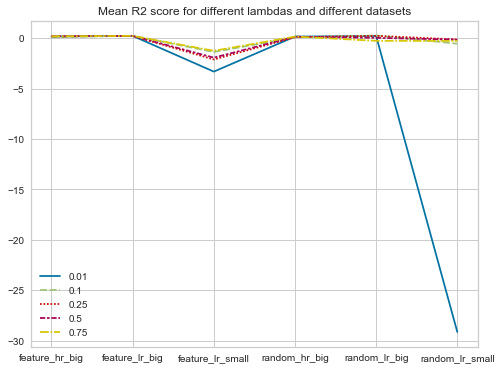

In [308]:
plt.figure(figsize=[8, 6])
sns.lineplot(data=lambda_df)
plt.title("Mean R2 score for different lambdas and different datasets")
plt.savefig('Mean R2 shrinkage')

In [310]:
reg = linear_model.LassoCV()

y_pred_si_r_lr_small = [[] for _ in range(5)]
si_r_lr_small_score = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        reg.fit(rescaled_r_lr_small[i][j], data['y_lr_small_train'])
        y_pred_si_r_lr_small[i].append(reg.predict(data['X_lr_test']))
        si_r_lr_small_score[i].append(r2_score(data['y_lr_test'], y_pred_si_r_lr_small[i][j]))

y_pred_si_f_lr_small = [[] for _ in range(5)]
si_f_lr_small_score = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        reg.fit(rescaled_f_lr_small[i][j], data['y_lr_small_train'])
        y_pred_si_f_lr_small[i].append(reg.predict(data['X_lr_test']))
        si_f_lr_small_score[i].append(r2_score(data['y_lr_test'], y_pred_si_f_lr_small[i][j]))
        
y_pred_si_r_hr_small = [[] for _ in range(5)]
si_r_hr_small_score = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        reg.fit(rescaled_r_hr_small[i][j], data['y_hr_small_train'])
        y_pred_si_r_hr_small[i].append(reg.predict(data['X_hr_test']))
        si_r_hr_small_score[i].append(r2_score(data['y_hr_test'], y_pred_si_r_hr_small[i][j]))
        
y_pred_si_f_hr_small = [[] for _ in range(5)]
si_f_hr_small_score = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        reg.fit(rescaled_f_hr_small[i][j], data['y_hr_small_train'])
        y_pred_si_f_hr_small[i].append(reg.predict(data['X_hr_test']))
        si_f_hr_small_score[i].append(r2_score(data['y_hr_test'], y_pred_si_f_hr_small[i][j]))
        
y_pred_si_r_lr_big = [[] for _ in range(5)]
si_r_lr_big_score = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        reg.fit(rescaled_r_lr_big[i][j], data['y_lr_big_train'])
        y_pred_si_r_lr_big[i].append(reg.predict(data['X_lr_test']))
        si_r_lr_big_score[i].append(r2_score(data['y_lr_test'], y_pred_si_r_lr_big[i][j]))
        
y_pred_si_r_lr_big = [[] for _ in range(5)]
si_r_lr_big_score = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        reg.fit(rescaled_r_lr_big[i][j], data['y_lr_big_train'])
        y_pred_si_r_lr_big[i].append(reg.predict(data['X_lr_test']))
        si_r_lr_big_score[i].append(r2_score(data['y_lr_test'], y_pred_si_r_lr_big[i][j]))
     
y_pred_si_f_lr_big = [[] for _ in range(5)]
si_f_lr_big_score = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        reg.fit(rescaled_f_lr_big[i][j], data['y_lr_big_train'])
        y_pred_si_f_lr_big[i].append(reg.predict(data['X_lr_test']))
        si_f_lr_big_score[i].append(r2_score(data['y_lr_test'], y_pred_si_f_lr_big[i][j]))
        
y_pred_si_r_hr_big = [[] for _ in range(5)]
si_r_hr_big_score = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        reg.fit(rescaled_r_hr_big[i][j], data['y_hr_big_train'])
        y_pred_si_r_hr_big[i].append(reg.predict(data['X_hr_test']))
        si_r_hr_big_score[i].append(r2_score(data['y_hr_test'], y_pred_si_r_hr_big[i][j]))
        
y_pred_si_f_hr_big = [[] for _ in range(5)]
si_f_hr_big_score = [[] for _ in range(5)]
for i in range(5):
    for j in range(5):
        reg.fit(rescaled_f_hr_big[i][j], data['y_hr_big_train'])
        y_pred_si_f_hr_big[i].append(reg.predict(data['X_hr_test']))
        si_f_hr_big_score[i].append(r2_score(data['y_hr_test'], y_pred_si_f_hr_big[i][j]))


In [312]:
mean_scores_shrinkage_lasso = []
mean_scores_shrinkage_lasso.append(np.mean(si_r_lr_small_score, axis=1))
mean_scores_shrinkage_lasso.append(np.mean(si_f_lr_small_score, axis=1))
mean_scores_shrinkage_lasso.append(np.mean(si_r_hr_small_score, axis=1))
mean_scores_shrinkage_lasso.append(np.mean(si_f_hr_small_score, axis=1))
mean_scores_shrinkage_lasso.append(np.mean(si_r_lr_big_score, axis=1))
mean_scores_shrinkage_lasso.append(np.mean(si_f_lr_big_score, axis=1))
mean_scores_shrinkage_lasso.append(np.mean(si_r_hr_big_score, axis=1))
mean_scores_shrinkage_lasso.append(np.mean(si_f_hr_big_score, axis=1))
mean_scores_shrinkage_lasso

[array([0.27376745, 0.30571997, 0.28880141, 0.25096665, 0.17431618]),
 array([0.29462184, 0.27806685, 0.28337268, 0.280629  , 0.28386567]),
 array([0.08307319, 0.07334237, 0.08376218, 0.10350715, 0.09352329]),
 array([0.14262672, 0.13783136, 0.15326102, 0.15011829, 0.14992865]),
 array([ 0.26357924,  0.30894958,  0.27598054,  0.15271168, -0.09035533]),
 array([0.31565493, 0.31120477, 0.31143777, 0.31130786, 0.31065433]),
 array([0.28568855, 0.28945269, 0.28626078, 0.28844028, 0.28356004]),
 array([0.29178842, 0.2963626 , 0.2987957 , 0.28660933, 0.28337739])]

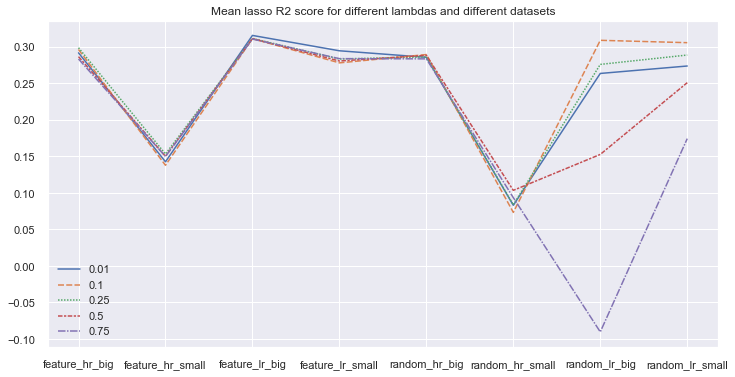

In [316]:
index_df = ['random_lr_small', 'feature_lr_small', 'random_hr_small', 'feature_hr_small',
         'random_lr_big', 'feature_lr_big', 'random_hr_big', 'feature_hr_big']
columns_df = ['0.01', '0.1', '0.25', '0.5', '0.75']

lambda_df = pd.DataFrame(data=np.array(mean_scores_shrinkage_lasso), index=index_df, columns= columns_df)

sns.set()
plt.figure(figsize=[12, 6])
sns.lineplot(data=lambda_df)
plt.title("Mean lasso R2 score for different lambdas and different datasets")
plt.savefig('Mean R2 shrinkage lasso')

In [317]:
#Here the whole 20 simulations are scaled

biscaler_r_lr_small_ac = [BiScaler() for _ in range(20)]
biscaler_f_lr_small_ac = [BiScaler() for _ in range(20)]
biscaler_r_hr_small_ac = [BiScaler() for _ in range(20)]
biscaler_f_hr_small_ac = [BiScaler() for _ in range(20)]
biscaler_r_lr_big_ac = [BiScaler() for _ in range(20)]
biscaler_f_lr_big_ac = [BiScaler() for _ in range(20)]
biscaler_r_hr_big_ac = [BiScaler() for _ in range(20)]
biscaler_f_hr_big_ac = [BiScaler() for _ in range(20)]

scaled_r_lr_small_ac = [biscaler_r_lr_small_ac[i].fit_transform(miss_r_lr_small[i]) for i in range(20)]
scaled_f_lr_small_ac = [biscaler_f_lr_small_ac[i].fit_transform(miss_f_lr_small[i]) for i in range(20)]

scaled_r_hr_small_ac = [biscaler_r_hr_small_ac[i].fit_transform(miss_r_hr_small[i]) for i in range(20)]
scaled_f_hr_small_ac = [biscaler_f_hr_small_ac[i].fit_transform(miss_f_hr_small[i]) for i in range(20)]

scaled_r_lr_big_ac = [biscaler_r_lr_big_ac[i].fit_transform(miss_r_lr_big[i]) for i in range(20)]
scaled_f_lr_big_ac = [biscaler_f_lr_big_ac[i].fit_transform(miss_f_lr_big[i]) for i in range(20)]

scaled_r_hr_big_ac = [biscaler_r_hr_big_ac[i].fit_transform(miss_r_hr_big[i]) for i in range(20)]
scaled_f_hr_big_ac = [biscaler_f_hr_big_ac[i].fit_transform(miss_f_hr_big[i]) for i in range(20)]

# find max singular value
lambda0_r_lr_small_ac = [find_lambda(deepcopy(scaled_r_lr_small_ac[i])) for i in range(20)]
lambda0_f_lr_small_ac = [find_lambda(deepcopy(scaled_f_lr_small_ac[i])) for i in range(20)]

lambda0_r_hr_small_ac = [find_lambda(deepcopy(scaled_r_hr_small_ac[i])) for i in range(20)]
lambda0_f_hr_small_ac = [find_lambda(deepcopy(scaled_f_hr_small_ac[i])) for i in range(20)]

lambda0_r_lr_big_ac = [find_lambda(deepcopy(scaled_r_lr_big_ac[i])) for i in range(20)]
lambda0_f_lr_big_ac = [find_lambda(deepcopy(scaled_f_lr_big_ac[i])) for i in range(20)]

lambda0_r_hr_big_ac = [find_lambda(deepcopy(scaled_r_hr_big_ac[i])) for i in range(20)]
lambda0_f_hr_big_ac = [find_lambda(deepcopy(scaled_f_hr_big_ac[i])) for i in range(20)]

[BiScaler] Initial log residual value = 10.465245
[BiScaler] Iter 1: log residual = -0.819656, log improvement ratio=11.284901
[BiScaler] Iter 2: log residual = -4.097733, log improvement ratio=3.278077
[BiScaler] Iter 3: log residual = -7.281647, log improvement ratio=3.183915
[BiScaler] Iter 4: log residual = -10.268029, log improvement ratio=2.986382
[BiScaler] Iter 5: log residual = -13.206078, log improvement ratio=2.938049
[BiScaler] Iter 6: log residual = -16.126227, log improvement ratio=2.920150
[BiScaler] Iter 7: log residual = -19.038618, log improvement ratio=2.912391
[BiScaler] Iter 8: log residual = -21.947806, log improvement ratio=2.909188
[BiScaler] Iter 9: log residual = -24.855978, log improvement ratio=2.908172
[BiScaler] Iter 10: log residual = -27.764005, log improvement ratio=2.908028
[BiScaler] Iter 11: log residual = -30.672173, log improvement ratio=2.908168
[BiScaler] Iter 12: log residual = -33.580532, log improvement ratio=2.908359
[BiScaler] Iter 13: log r

[BiScaler] Iter 18: log residual = -55.583916, log improvement ratio=3.055777
[BiScaler] Iter 19: log residual = -57.804979, log improvement ratio=2.221063
[BiScaler] Iter 20: log residual = -57.859112, log improvement ratio=0.054133
[BiScaler] Iter 21: log residual = -58.315021, log improvement ratio=0.455909
[BiScaler] Iter 22: log residual = -57.949494, log improvement ratio=-0.365527
[BiScaler] Initial log residual value = 10.466608
[BiScaler] Iter 1: log residual = -1.029445, log improvement ratio=11.496052
[BiScaler] Iter 2: log residual = -4.432078, log improvement ratio=3.402634
[BiScaler] Iter 3: log residual = -7.764394, log improvement ratio=3.332315
[BiScaler] Iter 4: log residual = -10.829883, log improvement ratio=3.065489
[BiScaler] Iter 5: log residual = -13.855960, log improvement ratio=3.026077
[BiScaler] Iter 6: log residual = -16.873517, log improvement ratio=3.017557
[BiScaler] Iter 7: log residual = -19.888289, log improvement ratio=3.014772
[BiScaler] Iter 8: log

[BiScaler] Initial log residual value = 10.464018
[BiScaler] Iter 1: log residual = -1.144457, log improvement ratio=11.608475
[BiScaler] Iter 2: log residual = -4.723496, log improvement ratio=3.579039
[BiScaler] Iter 3: log residual = -8.210230, log improvement ratio=3.486734
[BiScaler] Iter 4: log residual = -11.446012, log improvement ratio=3.235783
[BiScaler] Iter 5: log residual = -14.644042, log improvement ratio=3.198029
[BiScaler] Iter 6: log residual = -17.824122, log improvement ratio=3.180080
[BiScaler] Iter 7: log residual = -20.992904, log improvement ratio=3.168782
[BiScaler] Iter 8: log residual = -24.152856, log improvement ratio=3.159952
[BiScaler] Iter 9: log residual = -27.304991, log improvement ratio=3.152135
[BiScaler] Iter 10: log residual = -30.449862, log improvement ratio=3.144871
[BiScaler] Iter 11: log residual = -33.587990, log improvement ratio=3.138128
[BiScaler] Iter 12: log residual = -36.719962, log improvement ratio=3.131971
[BiScaler] Iter 13: log r

[BiScaler] Iter 5: log residual = -13.242583, log improvement ratio=2.933827
[BiScaler] Iter 6: log residual = -16.161793, log improvement ratio=2.919210
[BiScaler] Iter 7: log residual = -19.076931, log improvement ratio=2.915137
[BiScaler] Iter 8: log residual = -21.992144, log improvement ratio=2.915213
[BiScaler] Iter 9: log residual = -24.908896, log improvement ratio=2.916753
[BiScaler] Iter 10: log residual = -27.827527, log improvement ratio=2.918631
[BiScaler] Iter 11: log residual = -30.747929, log improvement ratio=2.920402
[BiScaler] Iter 12: log residual = -33.669840, log improvement ratio=2.921911
[BiScaler] Iter 13: log residual = -36.592975, log improvement ratio=2.923135
[BiScaler] Iter 14: log residual = -39.517070, log improvement ratio=2.924095
[BiScaler] Iter 15: log residual = -42.441907, log improvement ratio=2.924836
[BiScaler] Iter 16: log residual = -45.367286, log improvement ratio=2.925379
[BiScaler] Iter 17: log residual = -48.293080, log improvement ratio=

[BiScaler] Iter 4: log residual = -13.806755, log improvement ratio=3.775885
[BiScaler] Iter 5: log residual = -17.507204, log improvement ratio=3.700448
[BiScaler] Iter 6: log residual = -21.146902, log improvement ratio=3.639698
[BiScaler] Iter 7: log residual = -24.733038, log improvement ratio=3.586136
[BiScaler] Iter 8: log residual = -28.274373, log improvement ratio=3.541335
[BiScaler] Iter 9: log residual = -31.780240, log improvement ratio=3.505867
[BiScaler] Iter 10: log residual = -35.259217, log improvement ratio=3.478978
[BiScaler] Iter 11: log residual = -38.718366, log improvement ratio=3.459149
[BiScaler] Iter 12: log residual = -42.163042, log improvement ratio=3.444675
[BiScaler] Iter 13: log residual = -45.597085, log improvement ratio=3.434043
[BiScaler] Iter 14: log residual = -49.022501, log improvement ratio=3.425415
[BiScaler] Iter 15: log residual = -52.441710, log improvement ratio=3.419210
[BiScaler] Iter 16: log residual = -55.714141, log improvement ratio=3

[BiScaler] Iter 12: log residual = -36.671672, log improvement ratio=3.118942
[BiScaler] Iter 13: log residual = -39.790760, log improvement ratio=3.119088
[BiScaler] Iter 14: log residual = -42.909991, log improvement ratio=3.119231
[BiScaler] Iter 15: log residual = -46.029324, log improvement ratio=3.119332
[BiScaler] Iter 16: log residual = -49.148658, log improvement ratio=3.119334
[BiScaler] Iter 17: log residual = -52.262816, log improvement ratio=3.114157
[BiScaler] Iter 18: log residual = -55.309681, log improvement ratio=3.046866
[BiScaler] Iter 19: log residual = -57.395117, log improvement ratio=2.085436
[BiScaler] Iter 20: log residual = -57.850312, log improvement ratio=0.455194
[BiScaler] Iter 21: log residual = -58.333737, log improvement ratio=0.483425
[BiScaler] Iter 22: log residual = -58.112273, log improvement ratio=-0.221464
[BiScaler] Initial log residual value = 10.460728
[BiScaler] Iter 1: log residual = -1.261244, log improvement ratio=11.721972
[BiScaler] Ite

[BiScaler] Iter 11: log residual = -37.795583, log improvement ratio=3.459958
[BiScaler] Iter 12: log residual = -41.252690, log improvement ratio=3.457107
[BiScaler] Iter 13: log residual = -44.707735, log improvement ratio=3.455045
[BiScaler] Iter 14: log residual = -48.160760, log improvement ratio=3.453025
[BiScaler] Iter 15: log residual = -51.612093, log improvement ratio=3.451333
[BiScaler] Iter 16: log residual = -54.966791, log improvement ratio=3.354698
[BiScaler] Iter 17: log residual = -57.121312, log improvement ratio=2.154521
[BiScaler] Iter 18: log residual = -57.620592, log improvement ratio=0.499280
[BiScaler] Iter 19: log residual = -58.210402, log improvement ratio=0.589810
[BiScaler] Iter 20: log residual = -58.087891, log improvement ratio=-0.122511
[BiScaler] Initial log residual value = 10.453270
[BiScaler] Iter 1: log residual = -1.096103, log improvement ratio=11.549373
[BiScaler] Iter 2: log residual = -4.691366, log improvement ratio=3.595264
[BiScaler] Iter 

[BiScaler] Iter 8: log residual = -27.578853, log improvement ratio=3.618581
[BiScaler] Iter 9: log residual = -31.191307, log improvement ratio=3.612455
[BiScaler] Iter 10: log residual = -34.799203, log improvement ratio=3.607896
[BiScaler] Iter 11: log residual = -38.403756, log improvement ratio=3.604553
[BiScaler] Iter 12: log residual = -42.005882, log improvement ratio=3.602126
[BiScaler] Iter 13: log residual = -45.606241, log improvement ratio=3.600359
[BiScaler] Iter 14: log residual = -49.204969, log improvement ratio=3.598728
[BiScaler] Iter 15: log residual = -52.796805, log improvement ratio=3.591836
[BiScaler] Iter 16: log residual = -56.257216, log improvement ratio=3.460411
[BiScaler] Iter 17: log residual = -57.052258, log improvement ratio=0.795042
[BiScaler] Iter 18: log residual = -57.738313, log improvement ratio=0.686055
[BiScaler] Iter 19: log residual = -58.849477, log improvement ratio=1.111164
[BiScaler] Iter 20: log residual = -58.031089, log improvement rat

[BiScaler] Iter 1: log residual = -2.018457, log improvement ratio=12.412600
[BiScaler] Iter 2: log residual = -5.619826, log improvement ratio=3.601369
[BiScaler] Iter 3: log residual = -9.100095, log improvement ratio=3.480270
[BiScaler] Iter 4: log residual = -12.579495, log improvement ratio=3.479400
[BiScaler] Iter 5: log residual = -16.077615, log improvement ratio=3.498120
[BiScaler] Iter 6: log residual = -19.587008, log improvement ratio=3.509394
[BiScaler] Iter 7: log residual = -23.103040, log improvement ratio=3.516032
[BiScaler] Iter 8: log residual = -26.623562, log improvement ratio=3.520521
[BiScaler] Iter 9: log residual = -30.147454, log improvement ratio=3.523892
[BiScaler] Iter 10: log residual = -33.674046, log improvement ratio=3.526592
[BiScaler] Iter 11: log residual = -37.202880, log improvement ratio=3.528834
[BiScaler] Iter 12: log residual = -40.733609, log improvement ratio=3.530729
[BiScaler] Iter 13: log residual = -44.265952, log improvement ratio=3.5323

[BiScaler] Iter 12: log residual = -40.449601, log improvement ratio=3.499870
[BiScaler] Iter 13: log residual = -43.950454, log improvement ratio=3.500853
[BiScaler] Iter 14: log residual = -47.452238, log improvement ratio=3.501783
[BiScaler] Iter 15: log residual = -50.954702, log improvement ratio=3.502465
[BiScaler] Iter 16: log residual = -54.455383, log improvement ratio=3.500681
[BiScaler] Iter 17: log residual = -57.874648, log improvement ratio=3.419265
[BiScaler] Iter 18: log residual = -60.554858, log improvement ratio=2.680210
[BiScaler] Iter 19: log residual = -61.468062, log improvement ratio=0.913204
[BiScaler] Iter 20: log residual = -61.037630, log improvement ratio=-0.430432
[BiScaler] Initial log residual value = 10.391400
[BiScaler] Iter 1: log residual = -2.531898, log improvement ratio=12.923298
[BiScaler] Iter 2: log residual = -6.171268, log improvement ratio=3.639370
[BiScaler] Iter 3: log residual = -9.860902, log improvement ratio=3.689634
[BiScaler] Iter 4:

[BiScaler] Iter 7: log residual = -23.531964, log improvement ratio=3.531473
[BiScaler] Iter 8: log residual = -27.065012, log improvement ratio=3.533048
[BiScaler] Iter 9: log residual = -30.598836, log improvement ratio=3.533824
[BiScaler] Iter 10: log residual = -34.133038, log improvement ratio=3.534202
[BiScaler] Iter 11: log residual = -37.667442, log improvement ratio=3.534404
[BiScaler] Iter 12: log residual = -41.201977, log improvement ratio=3.534535
[BiScaler] Iter 13: log residual = -44.736623, log improvement ratio=3.534646
[BiScaler] Iter 14: log residual = -48.271343, log improvement ratio=3.534720
[BiScaler] Iter 15: log residual = -51.805901, log improvement ratio=3.534558
[BiScaler] Iter 16: log residual = -55.336251, log improvement ratio=3.530350
[BiScaler] Iter 17: log residual = -58.760192, log improvement ratio=3.423941
[BiScaler] Iter 18: log residual = -60.371091, log improvement ratio=1.610898
[BiScaler] Iter 19: log residual = -60.975887, log improvement rati

[BiScaler] Iter 6: log residual = -19.193151, log improvement ratio=3.443066
[BiScaler] Iter 7: log residual = -22.631697, log improvement ratio=3.438547
[BiScaler] Iter 8: log residual = -26.067337, log improvement ratio=3.435640
[BiScaler] Iter 9: log residual = -29.501112, log improvement ratio=3.433775
[BiScaler] Iter 10: log residual = -32.933747, log improvement ratio=3.432634
[BiScaler] Iter 11: log residual = -36.365684, log improvement ratio=3.431937
[BiScaler] Iter 12: log residual = -39.797196, log improvement ratio=3.431513
[BiScaler] Iter 13: log residual = -43.228452, log improvement ratio=3.431256
[BiScaler] Iter 14: log residual = -46.659554, log improvement ratio=3.431101
[BiScaler] Iter 15: log residual = -50.090485, log improvement ratio=3.430932
[BiScaler] Iter 16: log residual = -53.521950, log improvement ratio=3.431464
[BiScaler] Iter 17: log residual = -56.933392, log improvement ratio=3.411442
[BiScaler] Iter 18: log residual = -59.851336, log improvement ratio

[BiScaler] Iter 5: log residual = -23.862123, log improvement ratio=4.822160
[BiScaler] Iter 6: log residual = -28.657903, log improvement ratio=4.795780
[BiScaler] Iter 7: log residual = -33.426853, log improvement ratio=4.768950
[BiScaler] Iter 8: log residual = -38.170749, log improvement ratio=4.743897
[BiScaler] Iter 9: log residual = -42.893531, log improvement ratio=4.722782
[BiScaler] Iter 10: log residual = -47.599434, log improvement ratio=4.705903
[BiScaler] Iter 11: log residual = -52.292480, log improvement ratio=4.693046
[BiScaler] Iter 12: log residual = -56.957702, log improvement ratio=4.665222
[BiScaler] Iter 13: log residual = -60.809068, log improvement ratio=3.851365
[BiScaler] Iter 14: log residual = -60.850744, log improvement ratio=0.041677
[BiScaler] Iter 15: log residual = -60.869496, log improvement ratio=0.018751
[BiScaler] Iter 16: log residual = -60.833625, log improvement ratio=-0.035871
[BiScaler] Initial log residual value = 10.397432
[BiScaler] Iter 1:

[BiScaler] Iter 1: log residual = -3.917414, log improvement ratio=14.290264
[BiScaler] Iter 2: log residual = -8.874485, log improvement ratio=4.957071
[BiScaler] Iter 3: log residual = -13.807174, log improvement ratio=4.932689
[BiScaler] Iter 4: log residual = -18.554208, log improvement ratio=4.747034
[BiScaler] Iter 5: log residual = -23.260569, log improvement ratio=4.706361
[BiScaler] Iter 6: log residual = -27.950121, log improvement ratio=4.689552
[BiScaler] Iter 7: log residual = -32.637725, log improvement ratio=4.687604
[BiScaler] Iter 8: log residual = -37.329251, log improvement ratio=4.691526
[BiScaler] Iter 9: log residual = -42.026069, log improvement ratio=4.696818
[BiScaler] Iter 10: log residual = -46.727806, log improvement ratio=4.701737
[BiScaler] Iter 11: log residual = -51.433574, log improvement ratio=4.705768
[BiScaler] Iter 12: log residual = -56.129769, log improvement ratio=4.696195
[BiScaler] Iter 13: log residual = -60.512814, log improvement ratio=4.383

[BiScaler] Iter 15: log residual = -60.610898, log improvement ratio=-0.390893
[BiScaler] Initial log residual value = 10.363269
[BiScaler] Iter 1: log residual = -3.721801, log improvement ratio=14.085070
[BiScaler] Iter 2: log residual = -8.515160, log improvement ratio=4.793358
[BiScaler] Iter 3: log residual = -13.214006, log improvement ratio=4.698847
[BiScaler] Iter 4: log residual = -17.745273, log improvement ratio=4.531267
[BiScaler] Iter 5: log residual = -22.260096, log improvement ratio=4.514823
[BiScaler] Iter 6: log residual = -26.770926, log improvement ratio=4.510831
[BiScaler] Iter 7: log residual = -31.284438, log improvement ratio=4.513511
[BiScaler] Iter 8: log residual = -35.801393, log improvement ratio=4.516955
[BiScaler] Iter 9: log residual = -40.321650, log improvement ratio=4.520257
[BiScaler] Iter 10: log residual = -44.844655, log improvement ratio=4.523005
[BiScaler] Iter 11: log residual = -49.370091, log improvement ratio=4.525436
[BiScaler] Iter 12: log

[BiScaler] Iter 5: log residual = -12.283441, log improvement ratio=3.090078
[BiScaler] Iter 6: log residual = -15.363482, log improvement ratio=3.080041
[BiScaler] Iter 7: log residual = -18.438159, log improvement ratio=3.074677
[BiScaler] Iter 8: log residual = -21.509525, log improvement ratio=3.071367
[BiScaler] Iter 9: log residual = -24.578612, log improvement ratio=3.069087
[BiScaler] Iter 10: log residual = -27.646025, log improvement ratio=3.067413
[BiScaler] Iter 11: log residual = -30.712169, log improvement ratio=3.066144
[BiScaler] Iter 12: log residual = -33.777338, log improvement ratio=3.065169
[BiScaler] Iter 13: log residual = -36.841751, log improvement ratio=3.064413
[BiScaler] Iter 14: log residual = -39.905582, log improvement ratio=3.063830
[BiScaler] Iter 15: log residual = -42.968944, log improvement ratio=3.063362
[BiScaler] Iter 16: log residual = -46.032018, log improvement ratio=3.063074
[BiScaler] Iter 17: log residual = -49.094541, log improvement ratio=

[BiScaler] Iter 16: log residual = -45.844656, log improvement ratio=3.048228
[BiScaler] Iter 17: log residual = -48.892415, log improvement ratio=3.047759
[BiScaler] Iter 18: log residual = -51.937811, log improvement ratio=3.045397
[BiScaler] Iter 19: log residual = -54.907234, log improvement ratio=2.969422
[BiScaler] Iter 20: log residual = -57.273235, log improvement ratio=2.366001
[BiScaler] Iter 21: log residual = -57.648822, log improvement ratio=0.375587
[BiScaler] Iter 22: log residual = -57.735619, log improvement ratio=0.086797
[BiScaler] Iter 23: log residual = -57.452320, log improvement ratio=-0.283299
[BiScaler] Initial log residual value = 11.833156
[BiScaler] Iter 1: log residual = 0.515959, log improvement ratio=11.317197
[BiScaler] Iter 2: log residual = -2.734825, log improvement ratio=3.250784
[BiScaler] Iter 3: log residual = -5.897673, log improvement ratio=3.162849
[BiScaler] Iter 4: log residual = -8.980526, log improvement ratio=3.082853
[BiScaler] Iter 5: lo

[BiScaler] Iter 7: log residual = -18.353784, log improvement ratio=3.028410
[BiScaler] Iter 8: log residual = -21.377815, log improvement ratio=3.024030
[BiScaler] Iter 9: log residual = -24.399181, log improvement ratio=3.021366
[BiScaler] Iter 10: log residual = -27.418831, log improvement ratio=3.019650
[BiScaler] Iter 11: log residual = -30.437326, log improvement ratio=3.018495
[BiScaler] Iter 12: log residual = -33.455018, log improvement ratio=3.017692
[BiScaler] Iter 13: log residual = -36.472140, log improvement ratio=3.017122
[BiScaler] Iter 14: log residual = -39.488846, log improvement ratio=3.016706
[BiScaler] Iter 15: log residual = -42.505244, log improvement ratio=3.016398
[BiScaler] Iter 16: log residual = -45.521406, log improvement ratio=3.016163
[BiScaler] Iter 17: log residual = -48.537040, log improvement ratio=3.015633
[BiScaler] Iter 18: log residual = -51.551413, log improvement ratio=3.014373
[BiScaler] Iter 19: log residual = -54.527417, log improvement rati

[BiScaler] Iter 21: log residual = -57.741874, log improvement ratio=0.581298
[BiScaler] Iter 22: log residual = -57.660878, log improvement ratio=-0.080996
[BiScaler] Initial log residual value = 11.832873
[BiScaler] Iter 1: log residual = 0.597320, log improvement ratio=11.235554
[BiScaler] Iter 2: log residual = -2.663599, log improvement ratio=3.260919
[BiScaler] Iter 3: log residual = -5.833926, log improvement ratio=3.170327
[BiScaler] Iter 4: log residual = -8.930850, log improvement ratio=3.096924
[BiScaler] Iter 5: log residual = -12.005456, log improvement ratio=3.074605
[BiScaler] Iter 6: log residual = -15.068119, log improvement ratio=3.062663
[BiScaler] Iter 7: log residual = -18.123536, log improvement ratio=3.055418
[BiScaler] Iter 8: log residual = -21.174242, log improvement ratio=3.050706
[BiScaler] Iter 9: log residual = -24.221740, log improvement ratio=3.047498
[BiScaler] Iter 10: log residual = -27.266990, log improvement ratio=3.045250
[BiScaler] Iter 11: log re

[BiScaler] Iter 16: log residual = -49.614469, log improvement ratio=3.244822
[BiScaler] Iter 17: log residual = -52.854699, log improvement ratio=3.240230
[BiScaler] Iter 18: log residual = -55.905487, log improvement ratio=3.050788
[BiScaler] Iter 19: log residual = -57.863602, log improvement ratio=1.958115
[BiScaler] Iter 20: log residual = -57.738215, log improvement ratio=-0.125386
[BiScaler] Initial log residual value = 11.789902
[BiScaler] Iter 1: log residual = -0.643214, log improvement ratio=12.433115
[BiScaler] Iter 2: log residual = -4.872414, log improvement ratio=4.229201
[BiScaler] Iter 3: log residual = -8.940069, log improvement ratio=4.067655
[BiScaler] Iter 4: log residual = -12.910091, log improvement ratio=3.970021
[BiScaler] Iter 5: log residual = -16.807488, log improvement ratio=3.897397
[BiScaler] Iter 6: log residual = -20.602586, log improvement ratio=3.795098
[BiScaler] Iter 7: log residual = -24.261078, log improvement ratio=3.658492
[BiScaler] Iter 8: log

[BiScaler] Iter 15: log residual = -47.554127, log improvement ratio=3.364331
[BiScaler] Iter 16: log residual = -50.916617, log improvement ratio=3.362490
[BiScaler] Iter 17: log residual = -54.243920, log improvement ratio=3.327303
[BiScaler] Iter 18: log residual = -56.664017, log improvement ratio=2.420098
[BiScaler] Iter 19: log residual = -57.710100, log improvement ratio=1.046083
[BiScaler] Iter 20: log residual = -57.997054, log improvement ratio=0.286954
[BiScaler] Iter 21: log residual = -57.836408, log improvement ratio=-0.160646
[BiScaler] Initial log residual value = 11.740939
[BiScaler] Iter 1: log residual = -0.483150, log improvement ratio=12.224089
[BiScaler] Iter 2: log residual = -4.665240, log improvement ratio=4.182089
[BiScaler] Iter 3: log residual = -8.684600, log improvement ratio=4.019361
[BiScaler] Iter 4: log residual = -12.609756, log improvement ratio=3.925156
[BiScaler] Iter 5: log residual = -16.488624, log improvement ratio=3.878867
[BiScaler] Iter 6: l

[BiScaler] Iter 13: log residual = -36.899444, log improvement ratio=3.013100
[BiScaler] Iter 14: log residual = -39.912233, log improvement ratio=3.012789
[BiScaler] Iter 15: log residual = -42.924802, log improvement ratio=3.012569
[BiScaler] Iter 16: log residual = -45.937235, log improvement ratio=3.012433
[BiScaler] Iter 17: log residual = -48.949830, log improvement ratio=3.012595
[BiScaler] Iter 18: log residual = -51.955456, log improvement ratio=3.005626
[BiScaler] Iter 19: log residual = -54.924077, log improvement ratio=2.968622
[BiScaler] Iter 20: log residual = -57.114887, log improvement ratio=2.190809
[BiScaler] Iter 21: log residual = -58.022423, log improvement ratio=0.907536
[BiScaler] Iter 22: log residual = -57.826418, log improvement ratio=-0.196005
[BiScaler] Initial log residual value = 11.722805
[BiScaler] Iter 1: log residual = 0.433706, log improvement ratio=11.289099
[BiScaler] Iter 2: log residual = -2.520527, log improvement ratio=2.954234
[BiScaler] Iter 3

[BiScaler] Iter 6: log residual = -17.095252, log improvement ratio=3.358357
[BiScaler] Iter 7: log residual = -20.436745, log improvement ratio=3.341493
[BiScaler] Iter 8: log residual = -23.767464, log improvement ratio=3.330719
[BiScaler] Iter 9: log residual = -27.091408, log improvement ratio=3.323944
[BiScaler] Iter 10: log residual = -30.411160, log improvement ratio=3.319752
[BiScaler] Iter 11: log residual = -33.728367, log improvement ratio=3.317207
[BiScaler] Iter 12: log residual = -37.044067, log improvement ratio=3.315700
[BiScaler] Iter 13: log residual = -40.358915, log improvement ratio=3.314848
[BiScaler] Iter 14: log residual = -43.673280, log improvement ratio=3.314365
[BiScaler] Iter 15: log residual = -46.987352, log improvement ratio=3.314071
[BiScaler] Iter 16: log residual = -50.301522, log improvement ratio=3.314171
[BiScaler] Iter 17: log residual = -53.604585, log improvement ratio=3.303063
[BiScaler] Iter 18: log residual = -56.626750, log improvement ratio

[BiScaler] Iter 3: log residual = -7.428428, log improvement ratio=3.685239
[BiScaler] Iter 4: log residual = -11.097065, log improvement ratio=3.668638
[BiScaler] Iter 5: log residual = -14.765431, log improvement ratio=3.668365
[BiScaler] Iter 6: log residual = -18.433935, log improvement ratio=3.668504
[BiScaler] Iter 7: log residual = -22.102488, log improvement ratio=3.668553
[BiScaler] Iter 8: log residual = -25.771019, log improvement ratio=3.668531
[BiScaler] Iter 9: log residual = -29.439516, log improvement ratio=3.668497
[BiScaler] Iter 10: log residual = -33.107984, log improvement ratio=3.668468
[BiScaler] Iter 11: log residual = -36.776431, log improvement ratio=3.668447
[BiScaler] Iter 12: log residual = -40.444868, log improvement ratio=3.668436
[BiScaler] Iter 13: log residual = -44.113287, log improvement ratio=3.668419
[BiScaler] Iter 14: log residual = -47.781708, log improvement ratio=3.668422
[BiScaler] Iter 15: log residual = -51.450167, log improvement ratio=3.6

[BiScaler] Iter 3: log residual = -7.787018, log improvement ratio=3.715055
[BiScaler] Iter 4: log residual = -11.471273, log improvement ratio=3.684255
[BiScaler] Iter 5: log residual = -15.152697, log improvement ratio=3.681424
[BiScaler] Iter 6: log residual = -18.833929, log improvement ratio=3.681232
[BiScaler] Iter 7: log residual = -22.515431, log improvement ratio=3.681503
[BiScaler] Iter 8: log residual = -26.197210, log improvement ratio=3.681779
[BiScaler] Iter 9: log residual = -29.879204, log improvement ratio=3.681993
[BiScaler] Iter 10: log residual = -33.561353, log improvement ratio=3.682149
[BiScaler] Iter 11: log residual = -37.243612, log improvement ratio=3.682260
[BiScaler] Iter 12: log residual = -40.925950, log improvement ratio=3.682338
[BiScaler] Iter 13: log residual = -44.608361, log improvement ratio=3.682411
[BiScaler] Iter 14: log residual = -48.290719, log improvement ratio=3.682358
[BiScaler] Iter 15: log residual = -51.973693, log improvement ratio=3.6

[BiScaler] Iter 5: log residual = -15.117998, log improvement ratio=3.697111
[BiScaler] Iter 6: log residual = -18.814640, log improvement ratio=3.696642
[BiScaler] Iter 7: log residual = -22.510948, log improvement ratio=3.696308
[BiScaler] Iter 8: log residual = -26.207010, log improvement ratio=3.696062
[BiScaler] Iter 9: log residual = -29.902895, log improvement ratio=3.695885
[BiScaler] Iter 10: log residual = -33.598656, log improvement ratio=3.695761
[BiScaler] Iter 11: log residual = -37.294329, log improvement ratio=3.695673
[BiScaler] Iter 12: log residual = -40.989940, log improvement ratio=3.695611
[BiScaler] Iter 13: log residual = -44.685513, log improvement ratio=3.695573
[BiScaler] Iter 14: log residual = -48.380974, log improvement ratio=3.695460
[BiScaler] Iter 15: log residual = -52.076459, log improvement ratio=3.695485
[BiScaler] Iter 16: log residual = -55.765737, log improvement ratio=3.689278
[BiScaler] Iter 17: log residual = -59.187768, log improvement ratio=

[BiScaler] Iter 9: log residual = -29.606861, log improvement ratio=3.676682
[BiScaler] Iter 10: log residual = -33.283661, log improvement ratio=3.676800
[BiScaler] Iter 11: log residual = -36.960537, log improvement ratio=3.676876
[BiScaler] Iter 12: log residual = -40.637462, log improvement ratio=3.676925
[BiScaler] Iter 13: log residual = -44.314430, log improvement ratio=3.676968
[BiScaler] Iter 14: log residual = -47.991496, log improvement ratio=3.677066
[BiScaler] Iter 15: log residual = -51.667780, log improvement ratio=3.676284
[BiScaler] Iter 16: log residual = -55.337809, log improvement ratio=3.670029
[BiScaler] Iter 17: log residual = -58.879122, log improvement ratio=3.541313
[BiScaler] Iter 18: log residual = -60.861420, log improvement ratio=1.982298
[BiScaler] Iter 19: log residual = -60.828253, log improvement ratio=-0.033167
[BiScaler] Initial log residual value = 11.817890
[BiScaler] Iter 1: log residual = -0.098159, log improvement ratio=11.916049
[BiScaler] Iter

[BiScaler] Iter 2: log residual = -7.069459, log improvement ratio=4.932124
[BiScaler] Iter 3: log residual = -11.977656, log improvement ratio=4.908197
[BiScaler] Iter 4: log residual = -16.857048, log improvement ratio=4.879392
[BiScaler] Iter 5: log residual = -21.736579, log improvement ratio=4.879532
[BiScaler] Iter 6: log residual = -26.615719, log improvement ratio=4.879140
[BiScaler] Iter 7: log residual = -31.494542, log improvement ratio=4.878823
[BiScaler] Iter 8: log residual = -36.373170, log improvement ratio=4.878627
[BiScaler] Iter 9: log residual = -41.251679, log improvement ratio=4.878509
[BiScaler] Iter 10: log residual = -46.130128, log improvement ratio=4.878449
[BiScaler] Iter 11: log residual = -51.007813, log improvement ratio=4.877685
[BiScaler] Iter 12: log residual = -55.881054, log improvement ratio=4.873241
[BiScaler] Iter 13: log residual = -59.988136, log improvement ratio=4.107082
[BiScaler] Iter 14: log residual = -60.696878, log improvement ratio=0.70

[BiScaler] Iter 15: log residual = -60.841540, log improvement ratio=0.127164
[BiScaler] Iter 16: log residual = -60.937340, log improvement ratio=0.095800
[BiScaler] Iter 17: log residual = -60.537120, log improvement ratio=-0.400219
[BiScaler] Initial log residual value = 11.775755
[BiScaler] Iter 1: log residual = -1.988397, log improvement ratio=13.764152
[BiScaler] Iter 2: log residual = -6.913857, log improvement ratio=4.925460
[BiScaler] Iter 3: log residual = -11.782048, log improvement ratio=4.868191
[BiScaler] Iter 4: log residual = -16.614525, log improvement ratio=4.832477
[BiScaler] Iter 5: log residual = -21.440277, log improvement ratio=4.825752
[BiScaler] Iter 6: log residual = -26.263119, log improvement ratio=4.822842
[BiScaler] Iter 7: log residual = -31.084489, log improvement ratio=4.821370
[BiScaler] Iter 8: log residual = -35.905068, log improvement ratio=4.820579
[BiScaler] Iter 9: log residual = -40.725214, log improvement ratio=4.820146
[BiScaler] Iter 10: log

[BiScaler] Iter 7: log residual = -30.158491, log improvement ratio=4.717009
[BiScaler] Iter 8: log residual = -34.875104, log improvement ratio=4.716614
[BiScaler] Iter 9: log residual = -39.591522, log improvement ratio=4.716418
[BiScaler] Iter 10: log residual = -44.307865, log improvement ratio=4.716343
[BiScaler] Iter 11: log residual = -49.024280, log improvement ratio=4.716415
[BiScaler] Iter 12: log residual = -53.738655, log improvement ratio=4.714375
[BiScaler] Iter 13: log residual = -58.344159, log improvement ratio=4.605504
[BiScaler] Iter 14: log residual = -60.688632, log improvement ratio=2.344473
[BiScaler] Iter 15: log residual = -60.962784, log improvement ratio=0.274152
[BiScaler] Iter 16: log residual = -60.849927, log improvement ratio=-0.112857
[BiScaler] Initial log residual value = 11.776760
[BiScaler] Iter 1: log residual = -2.207155, log improvement ratio=13.983915
[BiScaler] Iter 2: log residual = -7.211877, log improvement ratio=5.004721
[BiScaler] Iter 3: 

In [53]:
# Perform Soft impute
si_r_small_lr_ac = []
for cl in range(20):
    softimputer = SoftImpute(shrinkage_value=0.1 * lambda0_r_lr_small_ac[cl])
    si_r_small_lr_ac.append(softimputer.fit_transform(scaled_r_lr_small_ac[cl]))

        
si_f_small_lr_ac = []
for cl in range(20):
    softimputer = SoftImpute(shrinkage_value=0.01 * lambda0_f_lr_small_ac[cl])
    si_f_small_lr_ac.append(softimputer.fit_transform(scaled_f_lr_small_ac[cl]))
        
si_r_small_hr_ac = []        
for cl in range(20):
    softimputer = SoftImpute(shrinkage_value=0.5 * lambda0_r_hr_small_ac[cl])
    si_r_small_hr_ac.append(softimputer.fit_transform(scaled_r_hr_small_ac[cl]))
        
si_f_small_hr_ac = []
for cl in range(20):
    softimputer = SoftImpute(shrinkage_value=0.25 * lambda0_f_hr_small_ac[cl])
    si_f_small_hr_ac.append(softimputer.fit_transform(scaled_f_hr_small_ac[cl]))
        
si_r_big_lr_ac = []
for cl in range(20):
    softimputer = SoftImpute(shrinkage_value=0.1 * lambda0_r_lr_big_ac[cl])
    si_r_big_lr_ac.append(softimputer.fit_transform(scaled_r_lr_big_ac[cl]))
        
si_f_big_lr_ac = []
for cl in range(20):
    softimputer = SoftImpute(shrinkage_value=0.01 * lambda0_f_lr_big_ac[cl])
    si_f_big_lr_ac.append(softimputer.fit_transform(scaled_f_lr_big_ac[cl]))

si_r_big_hr_ac = []
for cl in range(20):
    softimputer = SoftImpute(shrinkage_value=0.5 * lambda0_r_hr_big_ac[cl])
    si_r_big_hr_ac.append(softimputer.fit_transform(scaled_r_hr_big_ac[cl]))
        
si_f_big_hr_ac = []
for cl in range(20):
    softimputer = SoftImpute(shrinkage_value=0.25 * lambda0_f_hr_big_ac[cl])
    si_f_big_hr_ac.append(softimputer.fit_transform(scaled_f_hr_big_ac[cl])) 


[SoftImpute] Max Singular Value of X_init = 36.412362
[SoftImpute] Iter 1: observed MAE=0.507830 rank=114
[SoftImpute] Iter 2: observed MAE=0.462726 rank=80
[SoftImpute] Iter 3: observed MAE=0.434293 rank=60
[SoftImpute] Iter 4: observed MAE=0.412613 rank=46
[SoftImpute] Iter 5: observed MAE=0.394017 rank=35
[SoftImpute] Iter 6: observed MAE=0.377309 rank=26
[SoftImpute] Iter 7: observed MAE=0.362929 rank=20
[SoftImpute] Iter 8: observed MAE=0.350751 rank=17
[SoftImpute] Iter 9: observed MAE=0.341002 rank=16
[SoftImpute] Iter 10: observed MAE=0.333770 rank=15
[SoftImpute] Iter 11: observed MAE=0.328594 rank=15
[SoftImpute] Iter 12: observed MAE=0.324851 rank=15
[SoftImpute] Iter 13: observed MAE=0.322114 rank=15
[SoftImpute] Iter 14: observed MAE=0.320094 rank=15
[SoftImpute] Iter 15: observed MAE=0.318508 rank=14
[SoftImpute] Iter 16: observed MAE=0.317302 rank=14
[SoftImpute] Iter 17: observed MAE=0.316396 rank=14
[SoftImpute] Iter 18: observed MAE=0.315713 rank=14
[SoftImpute] Iter 

[SoftImpute] Iter 4: observed MAE=0.415479 rank=47
[SoftImpute] Iter 5: observed MAE=0.396632 rank=35
[SoftImpute] Iter 6: observed MAE=0.380002 rank=27
[SoftImpute] Iter 7: observed MAE=0.365524 rank=21
[SoftImpute] Iter 8: observed MAE=0.353145 rank=18
[SoftImpute] Iter 9: observed MAE=0.343374 rank=16
[SoftImpute] Iter 10: observed MAE=0.336121 rank=15
[SoftImpute] Iter 11: observed MAE=0.330810 rank=15
[SoftImpute] Iter 12: observed MAE=0.326965 rank=15
[SoftImpute] Iter 13: observed MAE=0.324149 rank=15
[SoftImpute] Iter 14: observed MAE=0.322066 rank=15
[SoftImpute] Iter 15: observed MAE=0.320514 rank=15
[SoftImpute] Iter 16: observed MAE=0.319350 rank=15
[SoftImpute] Iter 17: observed MAE=0.318472 rank=15
[SoftImpute] Iter 18: observed MAE=0.317805 rank=15
[SoftImpute] Iter 19: observed MAE=0.317295 rank=15
[SoftImpute] Iter 20: observed MAE=0.316903 rank=15
[SoftImpute] Iter 21: observed MAE=0.316601 rank=15
[SoftImpute] Iter 22: observed MAE=0.316367 rank=15
[SoftImpute] Iter 

[SoftImpute] Iter 10: observed MAE=0.334306 rank=16
[SoftImpute] Iter 11: observed MAE=0.329658 rank=16
[SoftImpute] Iter 12: observed MAE=0.326032 rank=15
[SoftImpute] Iter 13: observed MAE=0.323397 rank=15
[SoftImpute] Iter 14: observed MAE=0.321448 rank=14
[SoftImpute] Iter 15: observed MAE=0.319898 rank=14
[SoftImpute] Iter 16: observed MAE=0.318749 rank=14
[SoftImpute] Iter 17: observed MAE=0.317890 rank=14
[SoftImpute] Iter 18: observed MAE=0.317245 rank=14
[SoftImpute] Iter 19: observed MAE=0.316757 rank=14
[SoftImpute] Iter 20: observed MAE=0.316386 rank=14
[SoftImpute] Iter 21: observed MAE=0.316103 rank=14
[SoftImpute] Iter 22: observed MAE=0.315887 rank=14
[SoftImpute] Iter 23: observed MAE=0.315721 rank=14
[SoftImpute] Stopped after iteration 23 for lambda=9.198003
[SoftImpute] Max Singular Value of X_init = 36.770524
[SoftImpute] Iter 1: observed MAE=0.513528 rank=113
[SoftImpute] Iter 2: observed MAE=0.467823 rank=79
[SoftImpute] Iter 3: observed MAE=0.438240 rank=58
[Sof

[SoftImpute] Iter 14: observed MAE=0.325246 rank=15
[SoftImpute] Iter 15: observed MAE=0.323599 rank=14
[SoftImpute] Iter 16: observed MAE=0.322363 rank=14
[SoftImpute] Iter 17: observed MAE=0.321436 rank=14
[SoftImpute] Iter 18: observed MAE=0.320736 rank=14
[SoftImpute] Iter 19: observed MAE=0.320205 rank=14
[SoftImpute] Iter 20: observed MAE=0.319800 rank=14
[SoftImpute] Iter 21: observed MAE=0.319490 rank=14
[SoftImpute] Iter 22: observed MAE=0.319252 rank=14
[SoftImpute] Iter 23: observed MAE=0.319068 rank=14
[SoftImpute] Iter 24: observed MAE=0.318927 rank=14
[SoftImpute] Stopped after iteration 24 for lambda=9.192021
[SoftImpute] Max Singular Value of X_init = 36.078471
[SoftImpute] Iter 1: observed MAE=0.508267 rank=117
[SoftImpute] Iter 2: observed MAE=0.464743 rank=83
[SoftImpute] Iter 3: observed MAE=0.436900 rank=62
[SoftImpute] Iter 4: observed MAE=0.415727 rank=47
[SoftImpute] Iter 5: observed MAE=0.397249 rank=36
[SoftImpute] Iter 6: observed MAE=0.380612 rank=28
[SoftIm

[SoftImpute] Iter 1: observed MAE=0.734115 rank=6
[SoftImpute] Iter 2: observed MAE=0.731993 rank=6
[SoftImpute] Iter 3: observed MAE=0.731579 rank=6
[SoftImpute] Iter 4: observed MAE=0.731495 rank=6
[SoftImpute] Iter 5: observed MAE=0.731477 rank=6
[SoftImpute] Iter 6: observed MAE=0.731474 rank=6
[SoftImpute] Stopped after iteration 6 for lambda=66.431449
[SoftImpute] Max Singular Value of X_init = 88.989801
[SoftImpute] Iter 1: observed MAE=0.745056 rank=5
[SoftImpute] Iter 2: observed MAE=0.743150 rank=5
[SoftImpute] Iter 3: observed MAE=0.742782 rank=5
[SoftImpute] Iter 4: observed MAE=0.742709 rank=5
[SoftImpute] Iter 5: observed MAE=0.742694 rank=5
[SoftImpute] Iter 6: observed MAE=0.742691 rank=5
[SoftImpute] Stopped after iteration 6 for lambda=66.742351
[SoftImpute] Max Singular Value of X_init = 88.386184
[SoftImpute] Iter 1: observed MAE=0.730149 rank=6
[SoftImpute] Iter 2: observed MAE=0.727895 rank=6
[SoftImpute] Iter 3: observed MAE=0.727453 rank=6
[SoftImpute] Iter 4: o

[SoftImpute] Iter 17: observed MAE=0.722403 rank=31
[SoftImpute] Iter 18: observed MAE=0.722399 rank=31
[SoftImpute] Stopped after iteration 18 for lambda=15.111338
[SoftImpute] Max Singular Value of X_init = 20.348942
[SoftImpute] Iter 1: observed MAE=0.761482 rank=42
[SoftImpute] Iter 2: observed MAE=0.745182 rank=38
[SoftImpute] Iter 3: observed MAE=0.737471 rank=35
[SoftImpute] Iter 4: observed MAE=0.733511 rank=33
[SoftImpute] Iter 5: observed MAE=0.731442 rank=33
[SoftImpute] Iter 6: observed MAE=0.730346 rank=32
[SoftImpute] Iter 7: observed MAE=0.729718 rank=32
[SoftImpute] Iter 8: observed MAE=0.729333 rank=31
[SoftImpute] Iter 9: observed MAE=0.729096 rank=30
[SoftImpute] Iter 10: observed MAE=0.728950 rank=30
[SoftImpute] Iter 11: observed MAE=0.728866 rank=30
[SoftImpute] Iter 12: observed MAE=0.728815 rank=30
[SoftImpute] Iter 13: observed MAE=0.728785 rank=30
[SoftImpute] Iter 14: observed MAE=0.728766 rank=30
[SoftImpute] Iter 15: observed MAE=0.728754 rank=30
[SoftImput

[SoftImpute] Iter 11: observed MAE=0.721594 rank=33
[SoftImpute] Iter 12: observed MAE=0.721543 rank=33
[SoftImpute] Iter 13: observed MAE=0.721512 rank=33
[SoftImpute] Iter 14: observed MAE=0.721492 rank=33
[SoftImpute] Iter 15: observed MAE=0.721479 rank=33
[SoftImpute] Iter 16: observed MAE=0.721471 rank=33
[SoftImpute] Iter 17: observed MAE=0.721462 rank=32
[SoftImpute] Iter 18: observed MAE=0.721456 rank=32
[SoftImpute] Iter 19: observed MAE=0.721452 rank=32
[SoftImpute] Stopped after iteration 19 for lambda=15.076628
[SoftImpute] Max Singular Value of X_init = 19.981020
[SoftImpute] Iter 1: observed MAE=0.756636 rank=45
[SoftImpute] Iter 2: observed MAE=0.739252 rank=40
[SoftImpute] Iter 3: observed MAE=0.731415 rank=39
[SoftImpute] Iter 4: observed MAE=0.727468 rank=36
[SoftImpute] Iter 5: observed MAE=0.725398 rank=35
[SoftImpute] Iter 6: observed MAE=0.724194 rank=34
[SoftImpute] Iter 7: observed MAE=0.723547 rank=34
[SoftImpute] Iter 8: observed MAE=0.723198 rank=34
[SoftImpu

[SoftImpute] Iter 2: observed MAE=0.753690 rank=28
[SoftImpute] Iter 3: observed MAE=0.753526 rank=28
[SoftImpute] Iter 4: observed MAE=0.753497 rank=28
[SoftImpute] Iter 5: observed MAE=0.753491 rank=28
[SoftImpute] Iter 6: observed MAE=0.753490 rank=28
[SoftImpute] Stopped after iteration 6 for lambda=26.066079
[SoftImpute] Max Singular Value of X_init = 34.905116
[SoftImpute] Iter 1: observed MAE=0.756779 rank=29
[SoftImpute] Iter 2: observed MAE=0.755888 rank=29
[SoftImpute] Iter 3: observed MAE=0.755739 rank=29
[SoftImpute] Iter 4: observed MAE=0.755711 rank=29
[SoftImpute] Iter 5: observed MAE=0.755706 rank=29
[SoftImpute] Iter 6: observed MAE=0.755705 rank=29
[SoftImpute] Stopped after iteration 6 for lambda=26.355971
[SoftImpute] Max Singular Value of X_init = 35.696094
[SoftImpute] Iter 1: observed MAE=0.764933 rank=25
[SoftImpute] Iter 2: observed MAE=0.764088 rank=25
[SoftImpute] Iter 3: observed MAE=0.763948 rank=25
[SoftImpute] Iter 4: observed MAE=0.763923 rank=25
[SoftIm

[SoftImpute] Iter 1: observed MAE=0.561529 rank=173
[SoftImpute] Iter 2: observed MAE=0.519976 rank=81
[SoftImpute] Iter 3: observed MAE=0.467615 rank=30
[SoftImpute] Iter 4: observed MAE=0.419806 rank=17
[SoftImpute] Iter 5: observed MAE=0.387163 rank=16
[SoftImpute] Iter 6: observed MAE=0.365329 rank=15
[SoftImpute] Iter 7: observed MAE=0.350208 rank=15
[SoftImpute] Iter 8: observed MAE=0.339772 rank=15
[SoftImpute] Iter 9: observed MAE=0.332471 rank=15
[SoftImpute] Iter 10: observed MAE=0.327301 rank=15
[SoftImpute] Iter 11: observed MAE=0.323605 rank=15
[SoftImpute] Iter 12: observed MAE=0.320939 rank=15
[SoftImpute] Iter 13: observed MAE=0.319001 rank=15
[SoftImpute] Iter 14: observed MAE=0.317582 rank=15
[SoftImpute] Iter 15: observed MAE=0.316537 rank=15
[SoftImpute] Iter 16: observed MAE=0.315763 rank=15
[SoftImpute] Iter 17: observed MAE=0.315146 rank=14
[SoftImpute] Iter 18: observed MAE=0.314681 rank=14
[SoftImpute] Iter 19: observed MAE=0.314334 rank=14
[SoftImpute] Iter 20

[SoftImpute] Iter 20: observed MAE=0.312709 rank=15
[SoftImpute] Iter 21: observed MAE=0.312518 rank=15
[SoftImpute] Stopped after iteration 21 for lambda=28.491130
[SoftImpute] Max Singular Value of X_init = 114.441275
[SoftImpute] Iter 1: observed MAE=0.558955 rank=176
[SoftImpute] Iter 2: observed MAE=0.519097 rank=82
[SoftImpute] Iter 3: observed MAE=0.467166 rank=29
[SoftImpute] Iter 4: observed MAE=0.419273 rank=16
[SoftImpute] Iter 5: observed MAE=0.386258 rank=16
[SoftImpute] Iter 6: observed MAE=0.364179 rank=15
[SoftImpute] Iter 7: observed MAE=0.348961 rank=15
[SoftImpute] Iter 8: observed MAE=0.338463 rank=15
[SoftImpute] Iter 9: observed MAE=0.331120 rank=15
[SoftImpute] Iter 10: observed MAE=0.325926 rank=15
[SoftImpute] Iter 11: observed MAE=0.322212 rank=15
[SoftImpute] Iter 12: observed MAE=0.319533 rank=15
[SoftImpute] Iter 13: observed MAE=0.317586 rank=15
[SoftImpute] Iter 14: observed MAE=0.316160 rank=15
[SoftImpute] Iter 15: observed MAE=0.315110 rank=15
[SoftImp

[SoftImpute] Iter 17: observed MAE=0.315310 rank=15
[SoftImpute] Iter 18: observed MAE=0.314851 rank=14
[SoftImpute] Iter 19: observed MAE=0.314491 rank=14
[SoftImpute] Iter 20: observed MAE=0.314220 rank=14
[SoftImpute] Iter 21: observed MAE=0.314016 rank=14
[SoftImpute] Stopped after iteration 21 for lambda=28.647324
[SoftImpute] Max Singular Value of X_init = 113.974049
[SoftImpute] Iter 1: observed MAE=0.557271 rank=178
[SoftImpute] Iter 2: observed MAE=0.518223 rank=85
[SoftImpute] Iter 3: observed MAE=0.467127 rank=30
[SoftImpute] Iter 4: observed MAE=0.419243 rank=17
[SoftImpute] Iter 5: observed MAE=0.386231 rank=16
[SoftImpute] Iter 6: observed MAE=0.363932 rank=15
[SoftImpute] Iter 7: observed MAE=0.348594 rank=15
[SoftImpute] Iter 8: observed MAE=0.337987 rank=15
[SoftImpute] Iter 9: observed MAE=0.330552 rank=15
[SoftImpute] Iter 10: observed MAE=0.325276 rank=15
[SoftImpute] Iter 11: observed MAE=0.321494 rank=15
[SoftImpute] Iter 12: observed MAE=0.318760 rank=15
[SoftImp

[SoftImpute] Iter 4: observed MAE=0.338723 rank=13
[SoftImpute] Iter 5: observed MAE=0.335800 rank=13
[SoftImpute] Iter 6: observed MAE=0.334028 rank=13
[SoftImpute] Iter 7: observed MAE=0.332944 rank=13
[SoftImpute] Iter 8: observed MAE=0.332277 rank=13
[SoftImpute] Iter 9: observed MAE=0.331864 rank=13
[SoftImpute] Iter 10: observed MAE=0.331607 rank=13
[SoftImpute] Iter 11: observed MAE=0.331446 rank=13
[SoftImpute] Iter 12: observed MAE=0.331345 rank=13
[SoftImpute] Iter 13: observed MAE=0.331282 rank=13
[SoftImpute] Iter 14: observed MAE=0.331242 rank=13
[SoftImpute] Stopped after iteration 14 for lambda=69.974372
[SoftImpute] Max Singular Value of X_init = 285.527438
[SoftImpute] Iter 1: observed MAE=0.375650 rank=13
[SoftImpute] Iter 2: observed MAE=0.361663 rank=13
[SoftImpute] Iter 3: observed MAE=0.353413 rank=13
[SoftImpute] Iter 4: observed MAE=0.348549 rank=13
[SoftImpute] Iter 5: observed MAE=0.345650 rank=13
[SoftImpute] Iter 6: observed MAE=0.343904 rank=13
[SoftImpute]

[SoftImpute] Iter 1: observed MAE=0.381371 rank=13
[SoftImpute] Iter 2: observed MAE=0.366455 rank=13
[SoftImpute] Iter 3: observed MAE=0.357630 rank=13
[SoftImpute] Iter 4: observed MAE=0.352416 rank=13
[SoftImpute] Iter 5: observed MAE=0.349305 rank=13
[SoftImpute] Iter 6: observed MAE=0.347429 rank=13
[SoftImpute] Iter 7: observed MAE=0.346287 rank=13
[SoftImpute] Iter 8: observed MAE=0.345587 rank=13
[SoftImpute] Iter 9: observed MAE=0.345155 rank=13
[SoftImpute] Iter 10: observed MAE=0.344888 rank=13
[SoftImpute] Iter 11: observed MAE=0.344722 rank=13
[SoftImpute] Iter 12: observed MAE=0.344618 rank=13
[SoftImpute] Iter 13: observed MAE=0.344553 rank=13
[SoftImpute] Iter 14: observed MAE=0.344512 rank=13
[SoftImpute] Stopped after iteration 14 for lambda=71.020641
[SoftImpute] Max Singular Value of X_init = 300.164722
[SoftImpute] Iter 1: observed MAE=0.366328 rank=13
[SoftImpute] Iter 2: observed MAE=0.354675 rank=13
[SoftImpute] Iter 3: observed MAE=0.347868 rank=13
[SoftImpute]

[SoftImpute] Iter 12: observed MAE=0.751063 rank=50
[SoftImpute] Iter 13: observed MAE=0.751048 rank=50
[SoftImpute] Iter 14: observed MAE=0.751040 rank=50
[SoftImpute] Iter 15: observed MAE=0.751035 rank=50
[SoftImpute] Iter 16: observed MAE=0.751032 rank=50
[SoftImpute] Iter 17: observed MAE=0.751030 rank=50
[SoftImpute] Iter 18: observed MAE=0.751029 rank=50
[SoftImpute] Stopped after iteration 18 for lambda=40.515304
[SoftImpute] Max Singular Value of X_init = 54.558598
[SoftImpute] Iter 1: observed MAE=0.777856 rank=64
[SoftImpute] Iter 2: observed MAE=0.768121 rank=58
[SoftImpute] Iter 3: observed MAE=0.763493 rank=54
[SoftImpute] Iter 4: observed MAE=0.761163 rank=52
[SoftImpute] Iter 5: observed MAE=0.759914 rank=49
[SoftImpute] Iter 6: observed MAE=0.759247 rank=49
[SoftImpute] Iter 7: observed MAE=0.758894 rank=47
[SoftImpute] Iter 8: observed MAE=0.758679 rank=47
[SoftImpute] Iter 9: observed MAE=0.758565 rank=47
[SoftImpute] Iter 10: observed MAE=0.758503 rank=47
[SoftImput

[SoftImpute] Iter 15: observed MAE=0.756498 rank=47
[SoftImpute] Iter 16: observed MAE=0.756494 rank=47
[SoftImpute] Iter 17: observed MAE=0.756492 rank=47
[SoftImpute] Stopped after iteration 17 for lambda=40.979395
[SoftImpute] Max Singular Value of X_init = 54.185137
[SoftImpute] Iter 1: observed MAE=0.776886 rank=66
[SoftImpute] Iter 2: observed MAE=0.766928 rank=59
[SoftImpute] Iter 3: observed MAE=0.762317 rank=55
[SoftImpute] Iter 4: observed MAE=0.760001 rank=53
[SoftImpute] Iter 5: observed MAE=0.758781 rank=51
[SoftImpute] Iter 6: observed MAE=0.758136 rank=50
[SoftImpute] Iter 7: observed MAE=0.757791 rank=49
[SoftImpute] Iter 8: observed MAE=0.757592 rank=48
[SoftImpute] Iter 9: observed MAE=0.757477 rank=48
[SoftImpute] Iter 10: observed MAE=0.757411 rank=47
[SoftImpute] Iter 11: observed MAE=0.757371 rank=47
[SoftImpute] Iter 12: observed MAE=0.757349 rank=47
[SoftImpute] Iter 13: observed MAE=0.757337 rank=47
[SoftImpute] Iter 14: observed MAE=0.757330 rank=47
[SoftImput

[SoftImpute] Iter 17: observed MAE=0.755604 rank=47
[SoftImpute] Stopped after iteration 17 for lambda=41.009313
[SoftImpute] Max Singular Value of X_init = 53.183144
[SoftImpute] Iter 1: observed MAE=0.770119 rank=73
[SoftImpute] Iter 2: observed MAE=0.758569 rank=68
[SoftImpute] Iter 3: observed MAE=0.753477 rank=62
[SoftImpute] Iter 4: observed MAE=0.750942 rank=59
[SoftImpute] Iter 5: observed MAE=0.749683 rank=58
[SoftImpute] Iter 6: observed MAE=0.749027 rank=56
[SoftImpute] Iter 7: observed MAE=0.748655 rank=55
[SoftImpute] Iter 8: observed MAE=0.748443 rank=53
[SoftImpute] Iter 9: observed MAE=0.748314 rank=53
[SoftImpute] Iter 10: observed MAE=0.748247 rank=53
[SoftImpute] Iter 11: observed MAE=0.748205 rank=52
[SoftImpute] Iter 12: observed MAE=0.748180 rank=52
[SoftImpute] Iter 13: observed MAE=0.748167 rank=52
[SoftImpute] Iter 14: observed MAE=0.748159 rank=52
[SoftImpute] Iter 15: observed MAE=0.748154 rank=52
[SoftImpute] Iter 16: observed MAE=0.748151 rank=52
[SoftImput

[SoftImpute] Iter 4: observed MAE=0.770240 rank=31
[SoftImpute] Iter 5: observed MAE=0.770239 rank=31
[SoftImpute] Iter 6: observed MAE=0.770239 rank=31
[SoftImpute] Stopped after iteration 6 for lambda=77.247513
[SoftImpute] Max Singular Value of X_init = 101.551956
[SoftImpute] Iter 1: observed MAE=0.764571 rank=37
[SoftImpute] Iter 2: observed MAE=0.764371 rank=37
[SoftImpute] Iter 3: observed MAE=0.764344 rank=37
[SoftImpute] Iter 4: observed MAE=0.764340 rank=37
[SoftImpute] Iter 5: observed MAE=0.764339 rank=37
[SoftImpute] Iter 6: observed MAE=0.764339 rank=37
[SoftImpute] Stopped after iteration 6 for lambda=76.660428
[SoftImpute] Max Singular Value of X_init = 96.480695
[SoftImpute] Iter 1: observed MAE=0.753982 rank=43
[SoftImpute] Iter 2: observed MAE=0.753706 rank=43
[SoftImpute] Iter 3: observed MAE=0.753665 rank=43
[SoftImpute] Iter 4: observed MAE=0.753658 rank=43
[SoftImpute] Iter 5: observed MAE=0.753657 rank=43
[SoftImpute] Iter 6: observed MAE=0.753657 rank=43
[SoftI

In [318]:
# inverse scaling
rescaled_r_lr_small_ac = []
for i in range(20):
    rescaled_r_lr_small_ac.append(biscaler_r_lr_small_ac[i].inverse_transform(si_r_small_lr_ac[i]))

rescaled_f_lr_small_ac = []
for i in range(20):
    rescaled_f_lr_small_ac.append(biscaler_f_lr_small_ac[i].inverse_transform(si_f_small_lr_ac[i]))
        
rescaled_r_hr_small_ac = []
for i in range(20):
    rescaled_r_hr_small_ac.append(biscaler_r_hr_small_ac[i].inverse_transform(si_r_small_hr_ac[i]))
        
rescaled_f_hr_small_ac = []
for i in range(20):
    rescaled_f_hr_small_ac.append(biscaler_f_hr_small_ac[i].inverse_transform(si_f_small_hr_ac[i]))
        
rescaled_r_lr_big_ac = []
for i in range(20):
    rescaled_r_lr_big_ac.append(biscaler_r_lr_big_ac[i].inverse_transform(si_r_big_lr_ac[i]))
        
rescaled_f_lr_big_ac = []
for i in range(20):
    rescaled_f_lr_big_ac.append(biscaler_f_lr_big_ac[i].inverse_transform(si_f_big_lr_ac[i]))
        
rescaled_r_hr_big_ac = []
for i in range(20):
    rescaled_r_hr_big_ac.append(biscaler_r_hr_big_ac[i].inverse_transform(si_r_big_hr_ac[i]))
    
rescaled_f_hr_big_ac = []
for i in range(20):
    rescaled_f_hr_big_ac.append(biscaler_f_hr_big_ac[i].inverse_transform(si_f_big_hr_ac[i]))

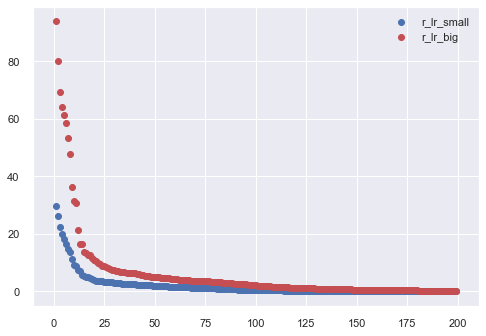

In [388]:
plt.scatter(np.arange(1,200), np.linalg.svd(rescaled_f_lr_small_ac[10])[1][1:], label='r_lr_small', c='b')
plt.scatter(np.arange(1,200), np.linalg.svd(rescaled_f_lr_big_ac[7])[1][1:], label='r_lr_big', c='r')
plt.legend()

In [319]:
reg = linear_model.LinearRegression()

y_pred_si_r_lr_small_ac = []
si_r_lr_small_score_ac = []
for i in range(20):
    reg.fit(rescaled_r_lr_small_ac[i], data['y_lr_small_train'])
    y_pred_si_r_lr_small_ac.append(reg.predict(data['X_lr_test']))
    si_r_lr_small_score_ac.append(r2_score(data['y_lr_test'], y_pred_si_r_lr_small_ac[i]))

y_pred_si_f_lr_small_ac = []
si_f_lr_small_score_ac = []
for i in range(20):
    reg.fit(rescaled_f_lr_small_ac[i], data['y_lr_small_train'])
    y_pred_si_f_lr_small_ac.append(reg.predict(data['X_lr_test']))
    si_f_lr_small_score_ac.append(r2_score(data['y_lr_test'], y_pred_si_f_lr_small_ac[i]))
        
y_pred_si_r_hr_small_ac = []
si_r_hr_small_score_ac = []
for i in range(20):
    reg.fit(rescaled_r_hr_small_ac[i], data['y_hr_small_train'])
    y_pred_si_r_hr_small_ac.append(reg.predict(data['X_hr_test']))
    si_r_hr_small_score_ac.append(r2_score(data['y_hr_test'], y_pred_si_r_hr_small_ac[i]))
        
y_pred_si_f_hr_small_ac = []
si_f_hr_small_score_ac = []
for i in range(20):
    reg.fit(rescaled_f_hr_small_ac[i], data['y_hr_small_train'])
    y_pred_si_f_hr_small_ac.append(reg.predict(data['X_hr_test']))
    si_f_hr_small_score_ac.append(r2_score(data['y_hr_test'], y_pred_si_f_hr_small_ac[i]))
        
y_pred_si_r_lr_big_ac = []
si_r_lr_big_score_ac = []
for i in range(20):
    reg.fit(rescaled_r_lr_big_ac[i], data['y_lr_big_train'])
    y_pred_si_r_lr_big_ac.append(reg.predict(data['X_lr_test']))
    si_r_lr_big_score_ac.append(r2_score(data['y_lr_test'], y_pred_si_r_lr_big_ac[i]))
        
y_pred_si_f_lr_big_ac = []
si_f_lr_big_score_ac = []
for i in range(20):
    reg.fit(rescaled_f_lr_big_ac[i], data['y_lr_big_train'])
    y_pred_si_f_lr_big_ac.append(reg.predict(data['X_lr_test']))
    si_f_lr_big_score_ac.append(r2_score(data['y_lr_test'], y_pred_si_f_lr_big_ac[i]))
     
        
y_pred_si_r_hr_big_ac = []
si_r_hr_big_score_ac = []
for i in range(20):
    reg.fit(rescaled_r_hr_big_ac[i], data['y_hr_big_train'])
    y_pred_si_r_hr_big_ac.append(reg.predict(data['X_hr_test']))
    si_r_hr_big_score_ac.append(r2_score(data['y_hr_test'], y_pred_si_r_hr_big_ac[i]))
    
        
y_pred_si_f_hr_big_ac = []
si_f_hr_big_score_ac = []
for i in range(20):
    reg.fit(rescaled_r_hr_big_ac[i], data['y_hr_big_train'])
    y_pred_si_f_hr_big_ac.append(reg.predict(data['X_hr_test']))
    si_f_hr_big_score_ac.append(r2_score(data['y_hr_test'], y_pred_si_f_hr_big_ac[i]))

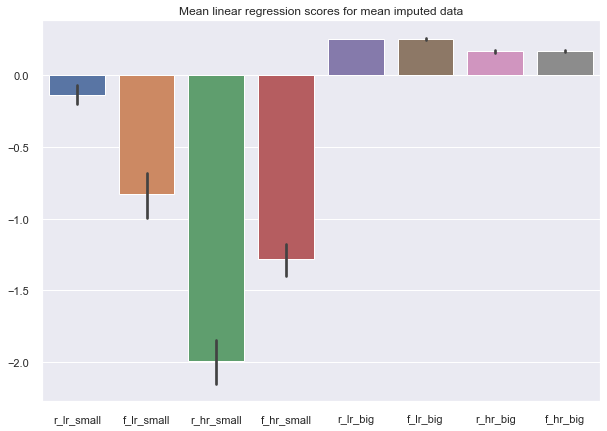

In [320]:
softImp_data = {'r_lr_small': si_r_lr_small_score_ac, 
                'f_lr_small': si_f_lr_small_score_ac, 
                'r_hr_small': si_r_hr_small_score_ac,
                'f_hr_small': si_f_hr_small_score_ac,
                'r_lr_big': si_r_lr_big_score_ac,
                'f_lr_big': si_f_lr_big_score_ac,
                'r_hr_big': si_r_hr_big_score_ac,
                'f_hr_big': si_f_hr_big_score_ac}

softimp_df = pd.DataFrame(data=softImp_data)
plt.figure(figsize=[10, 7])
sns.barplot(data=softimp_df)
plt.title("Mean linear regression scores for mean imputed data")
plt.savefig('soft impute regression')

In [321]:
reg = linear_model.LassoCV()

y_pred_si_r_lr_small_ac_lasso = []
si_r_lr_small_score_ac_lasso = []
for i in range(20):
    reg.fit(rescaled_r_lr_small_ac[i], data['y_lr_small_train'])
    y_pred_si_r_lr_small_ac_lasso.append(reg.predict(data['X_lr_test']))
    si_r_lr_small_score_ac_lasso.append(r2_score(data['y_lr_test'], y_pred_si_r_lr_small_ac_lasso[i]))

y_pred_si_f_lr_small_ac_lasso = []
si_f_lr_small_score_ac_lasso = []
for i in range(20):
    reg.fit(rescaled_f_lr_small_ac[i], data['y_lr_small_train'])
    y_pred_si_f_lr_small_ac_lasso.append(reg.predict(data['X_lr_test']))
    si_f_lr_small_score_ac_lasso.append(r2_score(data['y_lr_test'], y_pred_si_f_lr_small_ac_lasso[i]))
        
y_pred_si_r_hr_small_ac_lasso = []
si_r_hr_small_score_ac_lasso = []
for i in range(20):
    reg.fit(rescaled_r_hr_small_ac[i], data['y_hr_small_train'])
    y_pred_si_r_hr_small_ac_lasso.append(reg.predict(data['X_hr_test']))
    si_r_hr_small_score_ac_lasso.append(r2_score(data['y_hr_test'], y_pred_si_r_hr_small_ac_lasso[i]))
        
y_pred_si_f_hr_small_ac_lasso = []
si_f_hr_small_score_ac_lasso = []
for i in range(20):
    reg.fit(rescaled_f_hr_small_ac[i], data['y_hr_small_train'])
    y_pred_si_f_hr_small_ac_lasso.append(reg.predict(data['X_hr_test']))
    si_f_hr_small_score_ac_lasso.append(r2_score(data['y_hr_test'], y_pred_si_f_hr_small_ac_lasso[i]))
        
y_pred_si_r_lr_big_ac_lasso = []
si_r_lr_big_score_ac_lasso = []
for i in range(20):
    reg.fit(rescaled_r_lr_big_ac[i], data['y_lr_big_train'])
    y_pred_si_r_lr_big_ac_lasso.append(reg.predict(data['X_lr_test']))
    si_r_lr_big_score_ac_lasso.append(r2_score(data['y_lr_test'], y_pred_si_r_lr_big_ac_lasso[i]))
        
y_pred_si_f_lr_big_ac_lasso = []
si_f_lr_big_score_ac_lasso = []
for i in range(20):
    reg.fit(rescaled_f_lr_big_ac[i], data['y_lr_big_train'])
    y_pred_si_f_lr_big_ac_lasso.append(reg.predict(data['X_lr_test']))
    si_f_lr_big_score_ac_lasso.append(r2_score(data['y_lr_test'], y_pred_si_f_lr_big_ac_lasso[i]))
     
        
y_pred_si_r_hr_big_ac_lasso = []
si_r_hr_big_score_ac_lasso = []
for i in range(20):
    reg.fit(rescaled_r_hr_big_ac[i], data['y_hr_big_train'])
    y_pred_si_r_hr_big_ac_lasso.append(reg.predict(data['X_hr_test']))
    si_r_hr_big_score_ac_lasso.append(r2_score(data['y_hr_test'], y_pred_si_r_hr_big_ac_lasso[i]))
    
        
y_pred_si_f_hr_big_ac_lasso = []
si_f_hr_big_score_ac_lasso = []
for i in range(20):
    reg.fit(rescaled_r_hr_big_ac[i], data['y_hr_big_train'])
    y_pred_si_f_hr_big_ac_lasso.append(reg.predict(data['X_hr_test']))
    si_f_hr_big_score_ac_lasso.append(r2_score(data['y_hr_test'], y_pred_si_f_hr_big_ac_lasso[i]))

In [391]:
y_pred_si_r_lr_big_ac_lasso = []
si_r_lr_big_score_ac_lasso = []
for i in range(20):
    linear_model.LassoCV(alphas=np.logspace(1,4,100)).fit(rescaled_r_lr_big_ac[i], data['y_lr_big_train'])
    y_pred_si_r_lr_big_ac_lasso.append(reg.predict(data['X_lr_test']))
    si_r_lr_big_score_ac_lasso.append(r2_score(data['y_lr_test'], y_pred_si_r_lr_big_ac_lasso[i]))

In [392]:
np.mean(si_r_lr_big_score_ac_lasso)

0.20392440682214322

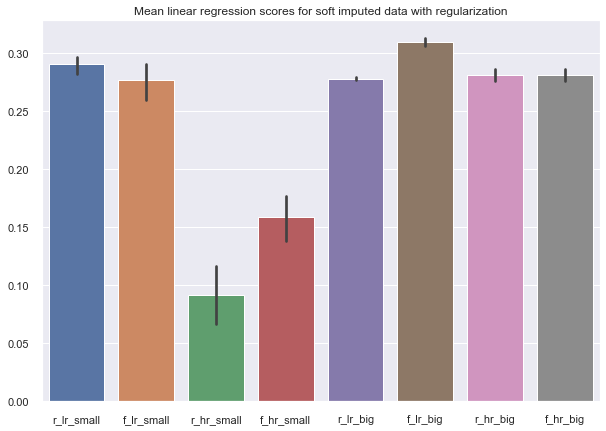

In [322]:
softImp_data_lasso = {'r_lr_small': si_r_lr_small_score_ac_lasso, 
                'f_lr_small': si_f_lr_small_score_ac_lasso, 
                'r_hr_small': si_r_hr_small_score_ac_lasso,
                'f_hr_small': si_f_hr_small_score_ac_lasso,
                'r_lr_big': si_r_lr_big_score_ac_lasso,
                'f_lr_big': si_f_lr_big_score_ac_lasso,
                'r_hr_big': si_r_hr_big_score_ac_lasso,
                'f_hr_big': si_f_hr_big_score_ac_lasso}

softimp_df_lasso = pd.DataFrame(data=softImp_data_lasso)
plt.figure(figsize=[10, 7])
sns.barplot(data=softimp_df_lasso)
plt.title("Mean linear regression scores for soft imputed data with regularization")
plt.savefig('soft impute regression lasso')

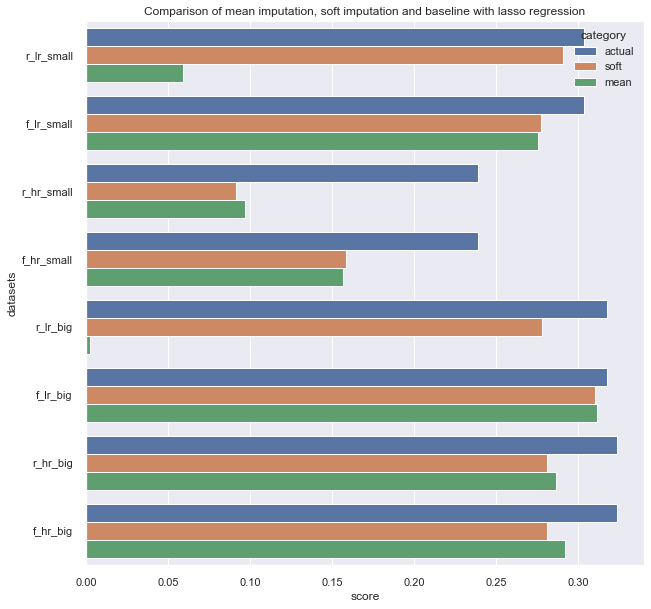

In [329]:
data_scores_mean_all = [[lasso_lr_small_score, 'actual', 'r_lr_small'], 
               [lasso_lr_small_score, 'actual', 'f_lr_small'],
               [lasso_hr_small_score, 'actual', 'r_hr_small'],
               [lasso_hr_small_score, 'actual', 'f_hr_small'],
               [lasso_lr_big_score, 'actual', 'r_lr_big'],
               [lasso_lr_big_score, 'actual', 'f_lr_big'],
               [lasso_hr_big_score, 'actual', 'r_hr_big'],
               [lasso_hr_big_score, 'actual', 'f_hr_big'],
               [np.mean(si_r_lr_small_score_ac_lasso), 'soft', 'r_lr_small'],
               [np.mean(si_f_lr_small_score_ac_lasso), 'soft', 'f_lr_small'],
               [np.mean(si_r_hr_small_score_ac_lasso), 'soft', 'r_hr_small'],
               [np.mean(si_f_hr_small_score_ac_lasso), 'soft', 'f_hr_small'],
               [np.mean(si_r_lr_big_score_ac_lasso), 'soft', 'r_lr_big'],
               [np.mean(si_f_lr_big_score_ac_lasso), 'soft', 'f_lr_big'],
               [np.mean(si_r_hr_big_score_ac_lasso), 'soft', 'r_hr_big'],
               [np.mean(si_f_hr_big_score_ac_lasso),'soft', 'f_hr_big'],
               [np.mean(mi_r_lr_small_score_lasso), 'mean', 'r_lr_small'],
               [np.mean(mi_f_lr_small_score_lasso), 'mean', 'f_lr_small'],
               [np.mean(mi_r_hr_small_score_lasso), 'mean', 'r_hr_small'],
               [np.mean(mi_f_hr_small_score_lasso), 'mean', 'f_hr_small'],
               [np.mean(mi_r_lr_big_score_lasso), 'mean', 'r_lr_big'],
               [np.mean(mi_f_lr_big_score_lasso), 'mean', 'f_lr_big'],
               [np.mean(mi_r_hr_big_score_lasso), 'mean', 'r_hr_big'],
               [np.mean(mi_f_hr_big_score_lasso),'mean', 'f_hr_big']]

columns_score_df_mean_all = ['score', 'category', 'datasets']
scores_df_mean_all = pd.DataFrame(data=data_scores_mean_all, columns=columns_score_df_mean_all)

plt.figure(figsize=[10,10])
sns.barplot(x='score', y='datasets', hue='category', data=scores_df_mean_all)
plt.title("Comparison of mean imputation, soft imputation and baseline with lasso regression")
plt.savefig('Regression scores comparison-mean-actual-soft')

In [ ]:
data_scores_mean = [[lasso_lr_small_score, 'actual', 'r_lr_small'], 
               [lasso_lr_small_score, 'actual', 'f_lr_small'],
               [lasso_hr_small_score, 'actual', 'r_hr_small'],
               [lasso_hr_small_score, 'actual', 'f_hr_small'],
               [lasso_lr_big_score, 'actual', 'r_lr_big'],
               [lasso_lr_big_score, 'actual', 'f_lr_big'],
               [lasso_hr_big_score, 'actual', 'r_hr_big'],
               [lasso_hr_big_score, 'actual', 'f_hr_big'],
               [np.mean(mi_r_lr_small_score_lasso), 'mean', 'r_lr_small'],
               [np.mean(mi_f_lr_small_score_lasso), 'mean', 'f_lr_small'],
               [np.mean(mi_r_hr_small_score_lasso), 'mean', 'r_hr_small'],
               [np.mean(mi_f_hr_small_score_lasso), 'mean', 'f_hr_small'],
               [np.mean(mi_r_lr_big_score_lasso), 'mean', 'r_lr_big'],
               [np.mean(mi_f_lr_big_score_lasso), 'mean', 'f_lr_big'],
               [np.mean(mi_r_hr_big_score_lasso), 'mean', 'r_hr_big'],
               [np.mean(mi_f_hr_big_score_lasso),'mean', 'f_hr_big']]

columns_score_df_mean = ['score', 'category', 'datasets']
scores_df_mean = pd.DataFrame(data=data_scores_mean, columns=columns_score_df_mean)

plt.figure(figsize=[10,8])
sns.barplot(x='score', y='datasets', hue='category', data=scores_df_mean)
plt.title("Comparison of mean imputation and baseline with lasso regression")
plt.savefig('Regression scores comparison-mean-actual')

In [60]:
# cv for feature selection

rescaled_r_lr_small_ac_cv = []
rescaled_f_lr_small_ac_cv = []
rescaled_r_hr_small_ac_cv = []
rescaled_f_hr_small_ac_cv = []
rescaled_r_lr_big_ac_cv = []
rescaled_f_lr_big_ac_cv = []
rescaled_r_hr_big_ac_cv = []
rescaled_f_hr_big_ac_cv = []
warnings.filterwarnings('ignore')

for r in range(20):
    rescaled_r_lr_small_ac_cv.append(ElasticNetCV(l1_ratio = 0.9, 
                                                  cv=6).fit(rescaled_r_lr_small_ac[r], 
                                                            data['y_lr_small_train']))    
    
    rescaled_f_lr_small_ac_cv.append(ElasticNetCV(l1_ratio = 0.9, 
                                                  cv=6).fit(rescaled_f_lr_small_ac[r], 
                                                            data['y_lr_small_train']))

    rescaled_r_hr_small_ac_cv.append(ElasticNetCV(l1_ratio = 0.9, 
                                                  cv=6).fit(rescaled_r_hr_small_ac[r], 
                                                            data['y_hr_small_train']))

    rescaled_f_hr_small_ac_cv.append(ElasticNetCV(l1_ratio = 0.9, 
                                                  cv=6).fit(rescaled_f_hr_small_ac[r], 
                                                            data['y_hr_small_train']))

    rescaled_r_lr_big_ac_cv.append(ElasticNetCV(l1_ratio = 0.9, 
                                                  cv=6).fit(rescaled_r_lr_big_ac[r], 
                                                            data['y_lr_big_train']))

    rescaled_f_lr_big_ac_cv.append(ElasticNetCV(l1_ratio = 0.9, 
                                                  cv=6).fit(rescaled_f_lr_big_ac[r], 
                                                            data['y_lr_big_train']))

    rescaled_r_hr_big_ac_cv.append(ElasticNetCV(l1_ratio = 0.9, 
                                                  cv=6).fit(rescaled_r_hr_big_ac[r], 
                                                            data['y_hr_big_train']))

    rescaled_f_hr_big_ac_cv.append(ElasticNetCV(l1_ratio = 0.9, 
                                                  cv=6).fit(rescaled_f_hr_big_ac[r], 
                                                            data['y_hr_big_train']))

In [61]:
datasets = [rescaled_r_lr_small_ac_cv,
rescaled_f_lr_small_ac_cv,
rescaled_r_hr_small_ac_cv,
rescaled_f_hr_small_ac_cv,
rescaled_r_lr_big_ac_cv,
rescaled_f_lr_big_ac_cv,
rescaled_r_hr_big_ac_cv,
rescaled_f_hr_big_ac_cv]

In [62]:
alphas = [np.mean([x[i].alpha_ for i in range(20)]) for x in datasets]

Text(0.5, 1.0, 'Mean alphas after hyperparameter search for different soft imputed datasets')

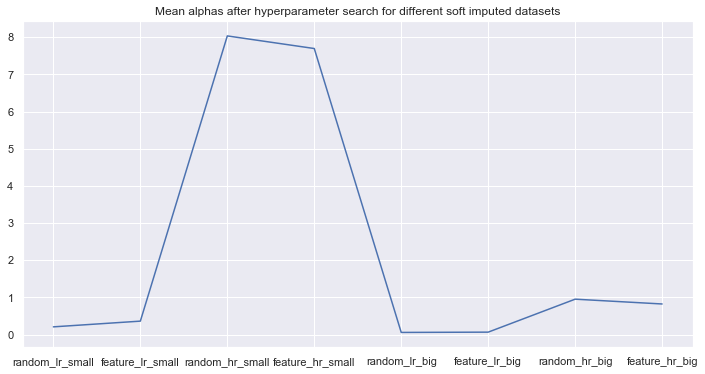

In [63]:
dataset_names = ['random_lr_small', 'feature_lr_small', 'random_hr_small', 'feature_hr_small', 
         'random_lr_big', 'feature_lr_big', 'random_hr_big', 'feature_hr_big']
plt.figure(figsize=[12, 6])
plt.plot(dataset_names, alphas)
plt.title('Mean alphas after hyperparameter search for different soft imputed datasets')

In [64]:
# Feature selection

ntimes_nonzero_r_lr_small_si = [np.zeros(200).astype(int) for _ in range(20)]
sample_enet=[[] for _ in range(20)]
for sim in range(20):
    for i in range(200):
        resampled_X , resampled_y = utils.resample(rescaled_r_lr_small_ac[sim], data['y_lr_small_train'])
        sample_enet[sim].append(ElasticNet(alpha=alphas[0] , l1_ratio=.9).fit(resampled_X, resampled_y))
        nonzero_ind = np.where(sample_enet[sim][i].coef_ != 0)[0]
        ntimes_nonzero_r_lr_small_si[sim][nonzero_ind] += 1
        

ntimes_nonzero_f_lr_small_si = [np.zeros(200).astype(int) for _ in range(20)]
sample_enet=[[] for _ in range(20)]
for sim in range(20):
    for i in range(200):
        resampled_X , resampled_y = utils.resample(rescaled_f_lr_small_ac[sim], data['y_lr_small_train'])
        sample_enet[sim].append(ElasticNet(alpha=alphas[1] , l1_ratio=.9).fit(resampled_X, resampled_y))
        nonzero_ind = np.where(sample_enet[sim][i].coef_ != 0)[0]
        ntimes_nonzero_f_lr_small_si[sim][nonzero_ind] += 1
        



ntimes_nonzero_r_hr_small_si = [np.zeros(200).astype(int) for _ in range(20)]
sample_enet=[[] for _ in range(20)]
for sim in range(20):
    for i in range(200):
        resampled_X , resampled_y = utils.resample(rescaled_r_hr_small_ac[sim], data['y_hr_small_train'])
        sample_enet[sim].append(ElasticNet(alpha=alphas[2] , l1_ratio=.9).fit(resampled_X, resampled_y))
        nonzero_ind = np.where(sample_enet[sim][i].coef_ != 0)[0]
        ntimes_nonzero_r_hr_small_si[sim][nonzero_ind] += 1
        


ntimes_nonzero_f_hr_small_si = [np.zeros(200).astype(int) for _ in range(20)]
sample_enet=[[] for _ in range(20)]
for sim in range(20):
    for i in range(200):
        resampled_X , resampled_y = utils.resample(rescaled_f_hr_small_ac[sim], data['y_hr_small_train'])
        sample_enet[sim].append(ElasticNet(alpha=alphas[3] , l1_ratio=.9).fit(resampled_X, resampled_y))
        nonzero_ind = np.where(sample_enet[sim][i].coef_ != 0)[0]
        ntimes_nonzero_f_hr_small_si[sim][nonzero_ind] += 1
        


In [65]:
chosen_predictors_r_lr_small_si = [np.where(ntimes_nonzero_r_lr_small_si[sim] >= 180) for sim in range(20)]
chosen_predictors_f_lr_small_si = [np.where(ntimes_nonzero_f_lr_small_si[sim] >= 180) for sim in range(20)]
chosen_predictors_r_hr_small_si = [np.where(ntimes_nonzero_r_hr_small_si[sim] >= 180) for sim in range(20)]
chosen_predictors_f_hr_small_si = [np.where(ntimes_nonzero_f_hr_small_si[sim] >= 180) for sim in range(20)]

In [67]:
chosen_predictors_r_lr_small_si_flat = flatten_predictors(chosen_predictors_r_lr_small_si)
chosen_predictors_f_lr_small_si_flat = flatten_predictors(chosen_predictors_f_lr_small_si)
chosen_predictors_r_hr_small_si_flat = flatten_predictors(chosen_predictors_r_hr_small_si)
chosen_predictors_f_hr_small_si_flat = flatten_predictors(chosen_predictors_f_hr_small_si)
                                                          
unique_r_lr_small_si, counts_r_lr_small_si = np.unique(chosen_predictors_r_lr_small_si_flat, return_counts=True)
x = dict(zip(unique_r_lr_small_si, counts_r_lr_small_si))
sorted_r_lr_small_si = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
                                                          
unique_f_lr_small_si, counts_f_lr_small_si = np.unique(chosen_predictors_f_lr_small_si_flat, return_counts=True)
x = dict(zip(unique_f_lr_small_si, counts_f_lr_small_si))
sorted_f_lr_small_si = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}

unique_r_hr_small_si, counts_r_hr_small_si = np.unique(chosen_predictors_r_hr_small_si_flat, return_counts=True)
x = dict(zip(unique_r_hr_small_si, counts_r_hr_small_si))
sorted_r_hr_small_si = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
                                                          
unique_f_hr_small_si, counts_f_hr_small_si = np.unique(chosen_predictors_f_hr_small_si_flat, return_counts=True)
x = dict(zip(unique_f_hr_small_si, counts_f_hr_small_si))
sorted_f_hr_small_si = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}                                                    

{18.0: 1,
 27.0: 1,
 86.0: 1,
 111.0: 1,
 112.0: 1,
 114.0: 1,
 115.0: 1,
 132.0: 1,
 133.0: 1,
 171.0: 1,
 179.0: 1,
 192.0: 1,
 26.0: 2,
 44.0: 2,
 105.0: 2,
 106.0: 2,
 108.0: 2,
 162.0: 2,
 166.0: 2,
 190.0: 2,
 37.0: 3,
 68.0: 3,
 126.0: 3,
 151.0: 3,
 198.0: 3,
 50.0: 4,
 52.0: 4,
 62.0: 4,
 94.0: 4,
 43.0: 5,
 66.0: 5,
 85.0: 5,
 148.0: 5,
 181.0: 5,
 187.0: 5,
 31.0: 6,
 100.0: 6,
 116.0: 6,
 184.0: 6,
 185.0: 6,
 189.0: 6,
 195.0: 6,
 153.0: 7,
 65.0: 8,
 77.0: 8,
 91.0: 8,
 119.0: 8,
 120.0: 8,
 160.0: 8,
 174.0: 8,
 81.0: 9,
 84.0: 9,
 113.0: 9,
 118.0: 9,
 142.0: 9,
 176.0: 9,
 178.0: 9,
 193.0: 9,
 34.0: 10,
 39.0: 10,
 53.0: 10,
 80.0: 10,
 97.0: 10,
 144.0: 10,
 12.0: 11,
 87.0: 11,
 137.0: 11,
 140.0: 11,
 159.0: 11,
 167.0: 11,
 172.0: 11,
 186.0: 11,
 199.0: 11,
 35.0: 12,
 63.0: 12,
 95.0: 12,
 110.0: 12,
 125.0: 12,
 139.0: 12,
 146.0: 12,
 149.0: 12,
 21.0: 13,
 147.0: 13,
 98.0: 15}

In [68]:
#feature selection, big datasets

ntimes_nonzero_r_lr_big_si = [np.zeros(200).astype(int) for _ in range(20)]
sample_enet=[[] for _ in range(20)]
for sim in range(20):
    for i in range(100):
        resampled_X , resampled_y = utils.resample(rescaled_r_lr_big_ac[sim], data['y_lr_big_train'])
        sample_enet[sim].append(ElasticNet(alpha=alphas[0] , l1_ratio=.9).fit(resampled_X, resampled_y))
        nonzero_ind = np.where(sample_enet[sim][i].coef_ != 0)[0]
        ntimes_nonzero_r_lr_big_si[sim][nonzero_ind] += 1
        

ntimes_nonzero_f_lr_big_si = [np.zeros(200).astype(int) for _ in range(20)]
sample_enet=[[] for _ in range(20)]
for sim in range(20):
    for i in range(100):
        resampled_X , resampled_y = utils.resample(rescaled_f_lr_big_ac[sim], data['y_lr_big_train'])
        sample_enet[sim].append(ElasticNet(alpha=alphas[1] , l1_ratio=.9).fit(resampled_X, resampled_y))
        nonzero_ind = np.where(sample_enet[sim][i].coef_ != 0)[0]
        ntimes_nonzero_f_lr_big_si[sim][nonzero_ind] += 1
        



ntimes_nonzero_r_hr_big_si = [np.zeros(200).astype(int) for _ in range(20)]
sample_enet=[[] for _ in range(20)]
for sim in range(20):
    for i in range(100):
        resampled_X , resampled_y = utils.resample(rescaled_r_hr_big_ac[sim], data['y_hr_big_train'])
        sample_enet[sim].append(ElasticNet(alpha=alphas[2] , l1_ratio=.9).fit(resampled_X, resampled_y))
        nonzero_ind = np.where(sample_enet[sim][i].coef_ != 0)[0]
        ntimes_nonzero_r_hr_big_si[sim][nonzero_ind] += 1
        


ntimes_nonzero_f_hr_big_si = [np.zeros(200).astype(int) for _ in range(20)]
sample_enet=[[] for _ in range(20)]
for sim in range(20):
    for i in range(100):
        resampled_X , resampled_y = utils.resample(rescaled_f_hr_big_ac[sim], data['y_hr_big_train'])
        sample_enet[sim].append(ElasticNet(alpha=alphas[3] , l1_ratio=.9).fit(resampled_X, resampled_y))
        nonzero_ind = np.where(sample_enet[sim][i].coef_ != 0)[0]
        ntimes_nonzero_f_hr_big_si[sim][nonzero_ind] += 1

In [69]:
chosen_predictors_r_lr_big_si = [np.where(ntimes_nonzero_r_lr_big_si[sim] >= 90) for sim in range(20)]
chosen_predictors_f_lr_big_si = [np.where(ntimes_nonzero_f_lr_big_si[sim] >= 90) for sim in range(20)]
chosen_predictors_r_hr_big_si = [np.where(ntimes_nonzero_r_hr_big_si[sim] >= 90) for sim in range(20)]
chosen_predictors_f_hr_big_si = [np.where(ntimes_nonzero_f_hr_big_si[sim] >= 90) for sim in range(20)]

In [72]:
chosen_predictors_r_lr_big_si_flat = flatten_predictors(chosen_predictors_r_lr_big_si)
chosen_predictors_f_lr_big_si_flat = flatten_predictors(chosen_predictors_f_lr_big_si)
chosen_predictors_r_hr_big_si_flat = flatten_predictors(chosen_predictors_r_hr_big_si)
chosen_predictors_f_hr_big_si_flat = flatten_predictors(chosen_predictors_f_hr_big_si)
                                                          
unique_r_lr_big_si, counts_r_lr_big_si = np.unique(chosen_predictors_r_lr_big_si_flat, return_counts=True)
x = dict(zip(unique_r_lr_big_si, counts_r_lr_big_si))
sorted_r_lr_big_si = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
                                                          
unique_f_lr_big_si, counts_f_lr_big_si = np.unique(chosen_predictors_f_lr_big_si_flat, return_counts=True)
x = dict(zip(unique_f_lr_big_si, counts_f_lr_big_si))
sorted_f_lr_big_si = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}

unique_r_hr_big_si, counts_r_hr_big_si = np.unique(chosen_predictors_r_hr_big_si_flat, return_counts=True)
x = dict(zip(unique_r_hr_big_si, counts_r_hr_big_si))
sorted_r_hr_big_si = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
                                                          
unique_f_hr_big_si, counts_f_hr_big_si = np.unique(chosen_predictors_f_hr_big_si_flat, return_counts=True)
x = dict(zip(unique_f_hr_big_si, counts_f_hr_big_si))
sorted_f_hr_big_si = {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}     


In [506]:
print(np.where(chosen_predictors_lr_small == 167),
      np.where(chosen_predictors_lr_small == 199),
      np.where(chosen_predictors_lr_small == 160),
      np.where(chosen_predictors_lr_small == 144),
      np.where(chosen_predictors_lr_small == 139),
      np.where(chosen_predictors_lr_small == 100))

print(sorted_r_lr_small_si[199], sorted_r_lr_small_si[139],  
      sorted_r_lr_small_si[65],  sorted_r_lr_small_si[97], 
      sorted_r_lr_small_si[160],  sorted_r_lr_small_si[84])

(array([12], dtype=int64),) (array([0], dtype=int64),) (array([4], dtype=int64),) (array([20], dtype=int64),) (array([1], dtype=int64),) (array([], dtype=int64),)
18 17 16 10 17 7


In [508]:
ntimes_nonzero_lr_small[[167, 199,  160,  144, 139,  100]]

array([195, 200, 199, 185, 200, 137])

In [496]:
sorted_r_lr_small_si

{8.0: 1,
 9.0: 1,
 11.0: 1,
 23.0: 1,
 26.0: 1,
 33.0: 1,
 47.0: 1,
 49.0: 1,
 57.0: 1,
 68.0: 1,
 70.0: 1,
 75.0: 1,
 81.0: 1,
 85.0: 1,
 96.0: 1,
 105.0: 1,
 114.0: 1,
 121.0: 1,
 124.0: 1,
 127.0: 1,
 150.0: 1,
 168.0: 1,
 174.0: 1,
 177.0: 1,
 188.0: 1,
 190.0: 1,
 192.0: 1,
 13.0: 2,
 24.0: 2,
 41.0: 2,
 42.0: 2,
 52.0: 2,
 54.0: 2,
 69.0: 2,
 78.0: 2,
 94.0: 2,
 98.0: 2,
 101.0: 2,
 106.0: 2,
 110.0: 2,
 151.0: 2,
 155.0: 2,
 157.0: 2,
 161.0: 2,
 176.0: 2,
 180.0: 2,
 18.0: 3,
 21.0: 3,
 27.0: 3,
 35.0: 3,
 39.0: 3,
 43.0: 3,
 44.0: 3,
 60.0: 3,
 66.0: 3,
 99.0: 3,
 108.0: 3,
 112.0: 3,
 120.0: 3,
 133.0: 3,
 135.0: 3,
 147.0: 3,
 153.0: 3,
 159.0: 3,
 181.0: 3,
 185.0: 3,
 187.0: 3,
 193.0: 3,
 3.0: 4,
 37.0: 4,
 59.0: 4,
 79.0: 4,
 86.0: 4,
 115.0: 4,
 116.0: 4,
 119.0: 4,
 179.0: 4,
 77.0: 5,
 87.0: 5,
 118.0: 5,
 122.0: 5,
 148.0: 5,
 189.0: 5,
 191.0: 5,
 50.0: 6,
 62.0: 6,
 63.0: 6,
 82.0: 6,
 95.0: 6,
 126.0: 6,
 198.0: 6,
 84.0: 7,
 111.0: 7,
 140.0: 7,
 142.0: 7,
 171.0

In [510]:
print(np.where(chosen_predictors_lr_small == 149),
      np.where(chosen_predictors_lr_small == 34),
      np.where(chosen_predictors_lr_small == 91),
      np.where(chosen_predictors_lr_small == 97),
      np.where(chosen_predictors_lr_small == 184),
      np.where(chosen_predictors_lr_small == 37))



print(sorted_f_lr_small_si[199], sorted_f_lr_small_si[139],  
      sorted_f_lr_small_si[65],  sorted_f_lr_small_si[97], 
      sorted_f_lr_small_si[160],  sorted_f_lr_small_si[84])

(array([19], dtype=int64),) (array([], dtype=int64),) (array([6], dtype=int64),) (array([3], dtype=int64),) (array([14], dtype=int64),) (array([21], dtype=int64),)
9 11 12 14 12 9


In [511]:
ntimes_nonzero_lr_small[[149, 34,  91,  97, 184,  37]]

array([185,  74, 198, 199, 193, 184])

In [497]:
sorted_f_lr_small_si 

{13.0: 1,
 27.0: 1,
 54.0: 1,
 69.0: 1,
 86.0: 1,
 99.0: 1,
 108.0: 1,
 127.0: 1,
 151.0: 1,
 161.0: 1,
 190.0: 1,
 8.0: 2,
 41.0: 2,
 59.0: 2,
 68.0: 2,
 79.0: 2,
 85.0: 2,
 101.0: 2,
 132.0: 2,
 157.0: 2,
 162.0: 2,
 176.0: 2,
 179.0: 2,
 44.0: 3,
 50.0: 3,
 57.0: 3,
 70.0: 3,
 73.0: 3,
 106.0: 3,
 120.0: 3,
 131.0: 3,
 133.0: 3,
 155.0: 3,
 3.0: 4,
 31.0: 4,
 60.0: 4,
 98.0: 4,
 122.0: 4,
 166.0: 4,
 181.0: 4,
 192.0: 4,
 23.0: 5,
 40.0: 5,
 42.0: 5,
 66.0: 5,
 135.0: 5,
 148.0: 5,
 159.0: 5,
 82.0: 6,
 112.0: 6,
 126.0: 6,
 171.0: 6,
 193.0: 6,
 52.0: 7,
 95.0: 7,
 142.0: 7,
 147.0: 7,
 153.0: 7,
 174.0: 7,
 35.0: 8,
 53.0: 8,
 62.0: 8,
 77.0: 8,
 81.0: 8,
 87.0: 8,
 94.0: 8,
 115.0: 8,
 119.0: 8,
 189.0: 8,
 43.0: 9,
 84.0: 9,
 110.0: 9,
 111.0: 9,
 113.0: 9,
 118.0: 9,
 186.0: 9,
 199.0: 9,
 21.0: 10,
 39.0: 10,
 137.0: 10,
 146.0: 10,
 172.0: 10,
 185.0: 10,
 187.0: 10,
 195.0: 10,
 198.0: 10,
 80.0: 11,
 125.0: 11,
 139.0: 11,
 12.0: 12,
 65.0: 12,
 116.0: 12,
 144.0: 12,
 160.

In [513]:
print(np.where(chosen_predictors_hr_small == 140),
      np.where(chosen_predictors_hr_small == 39),
      np.where(chosen_predictors_hr_small == 172),
      np.where(chosen_predictors_hr_small == 176),
      np.where(chosen_predictors_hr_small == 110),
      np.where(chosen_predictors_hr_small == 148)) 
    

print(sorted_r_hr_small_si[97], sorted_r_hr_small_si[185],  
      sorted_r_hr_small_si[55],  sorted_r_hr_small_si[148], 
      sorted_r_hr_small_si[40],  sorted_r_hr_small_si[39])

140.0: 11,
 39.0: 17,
 172.0: 17,
 176.0: 18,
 110.0: 19,
 148.0: 20}

(array([23], dtype=int64),) (array([5], dtype=int64),) (array([7], dtype=int64),) (array([8], dtype=int64),) (array([11], dtype=int64),) (array([3], dtype=int64),)
11 6 8 20 3 17


In [516]:
 print(np.where(chosen_predictors_hr_small == 185),
       np.where(chosen_predictors_hr_small == 137),
       np.where(chosen_predictors_hr_small == 55),
       np.where(chosen_predictors_hr_small == 49),
       np.where(chosen_predictors_hr_small == 97),
       np.where(chosen_predictors_hr_small == 114)) 

(array([1], dtype=int64),) (array([12], dtype=int64),) (array([2], dtype=int64),) (array([17], dtype=int64),) (array([0], dtype=int64),) (array([9], dtype=int64),)


In [515]:
ntimes_nonzero_hr_small[[140, 39,  172,  176, 110,  148]]

array([198, 200, 200, 200, 200, 200])

In [498]:
sorted_r_hr_small_si 

{4.0: 1,
 9.0: 1,
 11.0: 1,
 21.0: 1,
 22.0: 1,
 28.0: 1,
 30.0: 1,
 31.0: 1,
 36.0: 1,
 41.0: 1,
 56.0: 1,
 68.0: 1,
 95.0: 1,
 96.0: 1,
 99.0: 1,
 102.0: 1,
 108.0: 1,
 115.0: 1,
 125.0: 1,
 139.0: 1,
 147.0: 1,
 157.0: 1,
 160.0: 1,
 161.0: 1,
 166.0: 1,
 171.0: 1,
 174.0: 1,
 180.0: 1,
 191.0: 1,
 199.0: 1,
 3.0: 2,
 19.0: 2,
 29.0: 2,
 35.0: 2,
 57.0: 2,
 60.0: 2,
 89.0: 2,
 100.0: 2,
 111.0: 2,
 119.0: 2,
 120.0: 2,
 121.0: 2,
 130.0: 2,
 132.0: 2,
 142.0: 2,
 144.0: 2,
 145.0: 2,
 165.0: 2,
 167.0: 2,
 184.0: 2,
 189.0: 2,
 32.0: 3,
 34.0: 3,
 40.0: 3,
 42.0: 3,
 43.0: 3,
 54.0: 3,
 59.0: 3,
 92.0: 3,
 101.0: 3,
 112.0: 3,
 127.0: 3,
 131.0: 3,
 152.0: 3,
 155.0: 3,
 50.0: 4,
 79.0: 4,
 98.0: 4,
 122.0: 4,
 133.0: 4,
 136.0: 4,
 146.0: 4,
 186.0: 4,
 188.0: 4,
 23.0: 5,
 26.0: 5,
 44.0: 5,
 77.0: 5,
 91.0: 5,
 179.0: 5,
 190.0: 5,
 185.0: 6,
 137.0: 7,
 55.0: 8,
 49.0: 11,
 97.0: 11,
 114.0: 11,
 140.0: 11,
 39.0: 17,
 172.0: 17,
 176.0: 18,
 110.0: 19,
 148.0: 20}

In [517]:
 print(np.where(chosen_predictors_hr_small == 172),
       np.where(chosen_predictors_hr_small == 127),
       np.where(chosen_predictors_hr_small == 148),
       np.where(chosen_predictors_hr_small == 39),
       np.where(chosen_predictors_hr_small == 137),
       np.where(chosen_predictors_hr_small == 34)) 
    
print(sorted_f_hr_small_si[97], sorted_f_hr_small_si[185],  
      sorted_f_hr_small_si[55],  sorted_f_hr_small_si[148], 
      sorted_f_hr_small_si[40],  sorted_f_hr_small_si[39])


(array([7], dtype=int64),) (array([21], dtype=int64),) (array([3], dtype=int64),) (array([5], dtype=int64),) (array([12], dtype=int64),) (array([6], dtype=int64),)
13 9 11 17 11 17


In [518]:
ntimes_nonzero_hr_small[[172, 127, 148, 39, 137, 34]]

array([200, 198, 200, 200, 200, 200])

In [499]:
sorted_f_hr_small_si 

{9.0: 1,
 21.0: 1,
 32.0: 1,
 33.0: 1,
 47.0: 1,
 53.0: 1,
 56.0: 1,
 65.0: 1,
 82.0: 1,
 86.0: 1,
 100.0: 1,
 108.0: 1,
 135.0: 1,
 151.0: 1,
 152.0: 1,
 157.0: 1,
 167.0: 1,
 169.0: 1,
 177.0: 1,
 189.0: 1,
 199.0: 1,
 11.0: 2,
 22.0: 2,
 61.0: 2,
 84.0: 2,
 89.0: 2,
 90.0: 2,
 102.0: 2,
 109.0: 2,
 119.0: 2,
 144.0: 2,
 198.0: 2,
 60.0: 3,
 122.0: 3,
 133.0: 3,
 30.0: 4,
 35.0: 4,
 59.0: 4,
 87.0: 4,
 111.0: 4,
 132.0: 4,
 146.0: 4,
 150.0: 4,
 179.0: 4,
 23.0: 5,
 95.0: 5,
 54.0: 6,
 98.0: 6,
 136.0: 6,
 186.0: 6,
 31.0: 7,
 50.0: 8,
 120.0: 8,
 163.0: 8,
 57.0: 9,
 101.0: 9,
 125.0: 9,
 142.0: 9,
 181.0: 9,
 185.0: 9,
 188.0: 9,
 26.0: 10,
 91.0: 10,
 40.0: 11,
 55.0: 11,
 161.0: 11,
 49.0: 12,
 43.0: 13,
 44.0: 13,
 79.0: 13,
 92.0: 13,
 97.0: 13,
 114.0: 13,
 140.0: 13,
 176.0: 13,
 190.0: 13,
 110.0: 14,
 34.0: 15,
 137.0: 15,
 39.0: 17,
 148.0: 17,
 127.0: 18,
 172.0: 18}

In [522]:
 print(np.where(chosen_predictors_lr_big == 199),
       np.where(chosen_predictors_lr_big == 184),
       np.where(chosen_predictors_lr_big == 178),
       np.where(chosen_predictors_lr_big == 172),
       np.where(chosen_predictors_lr_big == 171),
       np.where(chosen_predictors_lr_big == 167)) 
    
print(sorted_r_lr_big_si[137], sorted_r_lr_big_si[98],  
      sorted_r_lr_big_si[193],  sorted_r_lr_big_si[133],  sorted_r_lr_big_si[171])


(array([7], dtype=int64),) (array([], dtype=int64),) (array([], dtype=int64),) (array([24], dtype=int64),) (array([5], dtype=int64),) (array([], dtype=int64),)
20 18 17 1 20


In [523]:
ntimes_nonzero_lr_big[[199, 184, 178, 172, 171, 167]]

array([195, 165, 105, 182, 197, 171])

In [500]:
sorted_r_lr_big_si            

{18.0: 1,
 23.0: 1,
 28.0: 1,
 33.0: 1,
 44.0: 1,
 54.0: 1,
 68.0: 1,
 106.0: 1,
 133.0: 1,
 157.0: 1,
 168.0: 1,
 190.0: 1,
 43.0: 2,
 78.0: 2,
 96.0: 2,
 108.0: 2,
 124.0: 2,
 175.0: 2,
 27.0: 3,
 70.0: 3,
 118.0: 3,
 127.0: 3,
 31.0: 4,
 105.0: 4,
 192.0: 4,
 176.0: 5,
 35.0: 6,
 159.0: 6,
 122.0: 7,
 191.0: 7,
 86.0: 8,
 111.0: 8,
 188.0: 8,
 166.0: 9,
 181.0: 9,
 66.0: 10,
 179.0: 10,
 52.0: 11,
 81.0: 11,
 112.0: 11,
 148.0: 11,
 50.0: 13,
 119.0: 13,
 126.0: 13,
 153.0: 13,
 189.0: 13,
 40.0: 14,
 62.0: 14,
 116.0: 14,
 146.0: 14,
 185.0: 14,
 187.0: 14,
 73.0: 15,
 142.0: 15,
 195.0: 15,
 198.0: 15,
 115.0: 16,
 174.0: 16,
 94.0: 17,
 147.0: 17,
 193.0: 17,
 13.0: 18,
 97.0: 18,
 98.0: 18,
 110.0: 18,
 120.0: 18,
 21.0: 19,
 77.0: 19,
 95.0: 19,
 140.0: 19,
 162.0: 19,
 186.0: 19,
 3.0: 20,
 12.0: 20,
 34.0: 20,
 37.0: 20,
 39.0: 20,
 53.0: 20,
 63.0: 20,
 65.0: 20,
 80.0: 20,
 82.0: 20,
 84.0: 20,
 87.0: 20,
 91.0: 20,
 100.0: 20,
 113.0: 20,
 125.0: 20,
 137.0: 20,
 139.0: 20

In [525]:
 print(np.where(chosen_predictors_lr_big == 167),
       np.where(chosen_predictors_lr_big == 144),
       np.where(chosen_predictors_lr_big == 100),
       np.where(chosen_predictors_lr_big == 91),
       np.where(chosen_predictors_lr_big == 139),
       np.where(chosen_predictors_lr_big == 125)) 
    
    
print(sorted_f_lr_big_si[137], sorted_f_lr_big_si[98],  
      sorted_f_lr_big_si[193],  sorted_f_lr_big_si[133],  
       sorted_f_lr_big_si[171], sorted_f_lr_big_si[171])


(array([], dtype=int64),) (array([19], dtype=int64),) (array([], dtype=int64),) (array([], dtype=int64),) (array([], dtype=int64),) (array([], dtype=int64),)
18 12 17 1 11 11


In [526]:
ntimes_nonzero_lr_big[[167, 144, 100, 91, 139, 125]]

array([171, 189, 143, 154, 145, 150])

In [502]:
sorted_f_lr_big_si 

{9.0: 1,
 16.0: 1,
 23.0: 1,
 42.0: 1,
 54.0: 1,
 60.0: 1,
 72.0: 1,
 78.0: 1,
 133.0: 1,
 135.0: 1,
 150.0: 1,
 155.0: 1,
 190.0: 1,
 15.0: 2,
 27.0: 2,
 89.0: 2,
 127.0: 2,
 132.0: 2,
 136.0: 2,
 18.0: 3,
 24.0: 3,
 36.0: 3,
 47.0: 3,
 59.0: 3,
 69.0: 3,
 70.0: 3,
 124.0: 3,
 151.0: 3,
 175.0: 3,
 96.0: 4,
 122.0: 4,
 11.0: 5,
 26.0: 5,
 40.0: 5,
 44.0: 5,
 105.0: 5,
 111.0: 5,
 118.0: 5,
 157.0: 5,
 159.0: 5,
 198.0: 5,
 31.0: 6,
 41.0: 6,
 85.0: 6,
 192.0: 6,
 34.0: 7,
 43.0: 7,
 66.0: 7,
 108.0: 7,
 116.0: 7,
 148.0: 7,
 174.0: 7,
 187.0: 7,
 191.0: 7,
 63.0: 8,
 73.0: 8,
 86.0: 8,
 112.0: 8,
 114.0: 8,
 179.0: 8,
 188.0: 8,
 94.0: 9,
 97.0: 9,
 106.0: 9,
 126.0: 9,
 153.0: 9,
 176.0: 9,
 189.0: 9,
 37.0: 10,
 50.0: 10,
 52.0: 10,
 82.0: 10,
 119.0: 10,
 181.0: 10,
 35.0: 11,
 84.0: 11,
 110.0: 11,
 115.0: 11,
 162.0: 11,
 166.0: 11,
 171.0: 11,
 13.0: 12,
 62.0: 12,
 65.0: 12,
 80.0: 12,
 98.0: 12,
 113.0: 12,
 142.0: 12,
 172.0: 12,
 178.0: 12,
 3.0: 13,
 81.0: 13,
 160.0: 13,
 

In [530]:
 print(np.where(chosen_predictors_hr_big == 176),
       np.where(chosen_predictors_hr_big == 172),
       np.where(chosen_predictors_hr_big == 148),
       np.where(chosen_predictors_hr_big == 137),
       np.where(chosen_predictors_hr_big == 110),
       np.where(chosen_predictors_hr_big == 97)) 
    


print(sorted_r_hr_big_si[176], sorted_r_hr_big_si[137],  
      sorted_r_hr_big_si[148],  sorted_r_hr_big_si[49])


(array([0], dtype=int64),) (array([8], dtype=int64),) (array([2], dtype=int64),) (array([1], dtype=int64),) (array([19], dtype=int64),) (array([10], dtype=int64),)
20 20 20 18


In [532]:
ntimes_nonzero_hr_big[[176, 172, 148, 137, 110, 97]]

array([200, 200, 200, 200, 200, 200])

In [504]:
sorted_r_hr_big_si

{32.0: 1,
 47.0: 1,
 50.0: 1,
 52.0: 1,
 100.0: 1,
 108.0: 1,
 112.0: 1,
 119.0: 1,
 125.0: 1,
 127.0: 1,
 140.0: 1,
 142.0: 1,
 144.0: 1,
 150.0: 1,
 155.0: 1,
 188.0: 1,
 22.0: 2,
 23.0: 2,
 53.0: 2,
 82.0: 2,
 86.0: 2,
 139.0: 2,
 162.0: 2,
 199.0: 2,
 44.0: 3,
 163.0: 3,
 187.0: 3,
 186.0: 4,
 191.0: 4,
 135.0: 6,
 43.0: 10,
 33.0: 17,
 49.0: 18,
 39.0: 20,
 97.0: 20,
 110.0: 20,
 137.0: 20,
 148.0: 20,
 172.0: 20,
 176.0: 20}

In [535]:
 print(np.where(chosen_predictors_hr_big == 176),
       np.where(chosen_predictors_hr_big == 172),
       np.where(chosen_predictors_hr_big == 148),
       np.where(chosen_predictors_hr_big == 137),
       np.where(chosen_predictors_hr_big == 110),
       np.where(chosen_predictors_hr_big == 97)) 
    


print(sorted_f_hr_big_si[176], sorted_f_hr_big_si[137],
      sorted_f_hr_big_si[54], 
      sorted_f_hr_big_si[148],  sorted_f_hr_big_si[49])

(array([0], dtype=int64),) (array([8], dtype=int64),) (array([2], dtype=int64),) (array([1], dtype=int64),) (array([19], dtype=int64),) (array([10], dtype=int64),)
20 20 2 20 16


In [505]:
sorted_f_hr_big_si 

{92.0: 1,
 111.0: 1,
 112.0: 1,
 119.0: 1,
 142.0: 1,
 157.0: 1,
 181.0: 1,
 23.0: 2,
 54.0: 2,
 89.0: 2,
 124.0: 2,
 133.0: 2,
 143.0: 2,
 146.0: 2,
 168.0: 2,
 185.0: 2,
 188.0: 2,
 190.0: 2,
 178.0: 3,
 189.0: 3,
 35.0: 4,
 47.0: 4,
 61.0: 4,
 101.0: 4,
 118.0: 4,
 125.0: 4,
 127.0: 4,
 151.0: 4,
 155.0: 4,
 42.0: 5,
 52.0: 5,
 82.0: 5,
 140.0: 5,
 161.0: 5,
 9.0: 6,
 86.0: 6,
 108.0: 6,
 187.0: 6,
 31.0: 7,
 32.0: 7,
 50.0: 7,
 162.0: 7,
 19.0: 8,
 21.0: 8,
 22.0: 8,
 113.0: 8,
 33.0: 9,
 43.0: 9,
 135.0: 9,
 186.0: 10,
 163.0: 11,
 174.0: 11,
 53.0: 12,
 139.0: 13,
 191.0: 13,
 44.0: 14,
 49.0: 16,
 39.0: 20,
 97.0: 20,
 110.0: 20,
 137.0: 20,
 148.0: 20,
 172.0: 20,
 176.0: 20}